# **====== STAGE 2 ======**
`Stage 2 (Data PreProcessing)`

# **🏝 Data Cleansing/Preprocessing 🏝**

## **📌 Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyoff

from datetime import datetime

from scipy.stats import skew
from scipy.stats import kurtosis

# Ignores any warning
# import warnings 
# warnings.filterwarnings("ignore")

sns.set(rc={'figure.figsize':(15, 8)})
sns.set_style("whitegrid")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# pd.set_option('float_format', '{:f}'.format)

# from matplotlib import rcParams
# rcParams['figure.figsize'] = 12, 4
# rcParams['lines.linewidth'] = 3
# rcParams['xtick.labelsize'] = 'x-large'
# rcParams['ytick.labelsize'] = 'x-large'

import matplotlib as mp
%matplotlib inline
import textwrap
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

## **📌 Import  Raw Datasets**

In [2]:
# missing_values = ['n/a', 'na', 'nan', '-', '--', 'null', 'Null', ' ', '-1', -1]
# source = 'https://raw.githubusercontent.com/nurimammasri/Marketing-Campaign-Model-Prediction-by-Datalicious/main/data/marketing_campaign.csv'
source = 'data/marketing_campaign.csv'
# df = pd.read_csv(source, na_values = missing_values)
df = pd.read_csv(source, sep=";")
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [3]:
cat_cols = ['ID', 'Education', 'Marital_Status', 'AcceptedCmp1', 
            'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
            'AcceptedCmp5', 'Complain', 'Response']
            
num_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 
            'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
            'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue']

timestamp = ["Dt_Customer"]

## **📌 Handling Missing Value**

In [4]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc["Data Type"] = [df[col].dtype for col in df.columns]
nvc.sort_values(by=["Total Null Values", "Percentage"], ascending=False, inplace=True)
print(nvc)

Missing values status: True
                     Total Null Values  Percentage Data Type
Income                              24    1.071429     int64
ID                                   0    0.000000     int64
Z_CostContact                        0    0.000000     int64
Complain                             0    0.000000    object
AcceptedCmp2                         0    0.000000    object
AcceptedCmp1                         0    0.000000   float64
AcceptedCmp5                         0    0.000000     int64
AcceptedCmp4                         0    0.000000     int64
AcceptedCmp3                         0    0.000000    object
NumWebVisitsMonth                    0    0.000000     int64
NumStorePurchases                    0    0.000000     int64
NumCatalogPurchases                  0    0.000000     int64
NumWebPurchases                      0    0.000000     int64
NumDealsPurchases                    0    0.000000     int64
Z_Revenue                            0    0.000000     in

### **Drop**

In [5]:
# print("Jumlah rows sebelum drop missing values =", df.shape[0])
# df = df.dropna(subset=['Income'])
# print("Jumlah rows setelah drop missing values =", df.shape[0])
# df.isna().sum()

### **Imputation**

Imputation (Median), karena Highly Positively Skewed

In [6]:
# print("Jumlah missing values Income sebelum Imputation =", df["Income"].isna().sum())

Imputation using `fillna`

In [7]:
# df['Income'].fillna(df['Income'].median(), inplace=True)
# df.isna().sum()

Imputation using `SimpleImputer`

In [8]:
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(missing_values=np.nan, strategy='median')
# df["Income"] = imputer.fit_transform(df[["Income"]])
# df["Income"].isna().sum()

In [9]:
# print("Jumlah missing values Income setelah Imputation =", df["Income"].isna().sum())

### **Multivariate Approach**

Multivariate Approach (MICE Imputation, KNN Imputer, dll)

#### **Transform Temp**

Transform beberapa kolom object/string, karena penggunaan multivariate approch memerlukan semua kolom numeric

In [10]:
df_ma = df.copy()

**Label Encoding**

1. Menggunakan `LabelEncoder`

In [11]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# le.fit(df_ma['Education'])
# df_ma['Education'] = le.transform(df_ma['Education'])
# print(le.classes_)

2. Menggunakan Metode `Mapping`

In [12]:
map_edu = {
    'Basic' : 0,
    'Graduation' : 1,
    'Master' : 2,
    '2n Cycle' : 2,
    'PhD' : 3
}

df_ma['Education'] = df_ma['Education'].map(map_edu)
df_ma['Education'].unique()

array([1, 3, 2, 0], dtype=int64)

**One Hot Encoding**

1. Menggunakan `get_dummies`

In [13]:
# # Not Auto Drop Columns
# ohe = pd.get_dummies(df_ma["Marital_Status"])
# df_ma.drop("Marital_Status", axis=1, inplace=True)
# df_ma = df_ma.join(ohe)

# # cara 2 : Auto drop Column
# # df_ma = pd.get_dummies(data=df_ma, columns=["Marital_Status"])

# df_ma.head()

2. Menggunakan `OneHotEncoder`

In [14]:
from sklearn.preprocessing import OneHotEncoder

oh = OneHotEncoder()
df_ohe = pd.DataFrame(
    oh.fit_transform(df_ma[["Marital_Status"]]).toarray(),
    columns=list(oh.categories_[0])
)
df_ma.drop("Marital_Status", axis=1, inplace=True)

print(oh.categories_[0])
df_ma = pd.concat([df_ma, df_ohe], axis=1)
df_ma.head()

['Absurd' 'Alone' 'Divorced' 'Married' 'Single' 'Together' 'Widow' 'YOLO']


ID  Year_Birth  Education   Income  Kidhome  Teenhome Dt_Customer  \
0  5524        1957          1  58138.0        0         0  2012-09-04   
1  2174        1954          1  46344.0        1         1  2014-03-08   
2  4141        1965          1  71613.0        0         0  2013-08-21   
3  6182        1984          1  26646.0        1         0  2014-02-10   
4  5324        1981          3  58293.0        1         0  2014-01-19   

   Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0       58       635         88              546              172   
1       38        11          1                6                2   
2       26       426         49              127              111   
3       26        11          4               20               10   
4       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  Absurd  Alone  Divorced  Married  \
0              3         11         1     0.0    0.0       0.0      0.0   
1              3         11         0     0.0    0.0       0.0      0.0   
2              3         11         0     0.0    0.0       0.0      0.0   
3              3         11         0     0.0    0.0       0.0      0.0   
4              3         11         0     0.0    0.0       0.0      1.0   

   Single  Together  Widow  YOLO  
0     1.0       0.0    0.0   0.0  
1     1.0       0.0    0.0   0.0  
2     0.0       1.0    0.0   0.0  
3     0.0       1.0    0.0   0.0  
4     0.0       0.0    0.0   0.0

**Drop Date Columns**

In [15]:
df_ma = df_ma.drop("Dt_Customer", axis=1)

**Two main methods we use here to impute missing values**

- KNN or K-Nearest Neighbor
- MICE or Multiple Imputation by Chained Equation

Here, Multiple imputations are performed using `sklearn` and `fancyimpute`.

*To install fancyimpute*

`pip install fancyimpute`

#### **Imputation using `KNNImputer`**

In [16]:
# print("Jumlah missing values Income sebelum Imputation =", df["Income"].isna().sum())

In [17]:
# from sklearn.impute import KNNImputer

# knn_imputer = KNNImputer(n_neighbors=5)
# df_imputed = pd.DataFrame(
#     knn_imputer.fit_transform(df_ma),
#     columns=df_ma.columns
# )
# df["Income"] = df_imputed["Income"].copy()
# df.head()

In [18]:
# from fancyimpute import KNN

# knn_imputer = KNN()
# df_imputed = pd.DataFrame(
#     knn_imputer.fit_transform(df_ma),
#     columns=df_ma.columns
# )
# df["Income"] = df_imputed["Income"].copy()
# df.head()

In [19]:
# print("Jumlah missing values Income setelah Imputation =", df["Income"].isna().sum())

#### **Imputation using `MICE` with `IterativeImputer`**

MICE Imputation, short for ‘Multiple Imputation by Chained Equation’ is an advanced missing data imputation technique that uses multiple iterations of Machine Learning model training to predict the missing values using known values from other features in the data as predictors.

In [20]:
# print("Jumlah missing values Income sebelum Imputation =", df["Income"].isna().sum())

In [21]:
# # Note: make sure to import the enable_iterative_imputer function before 
# # you import the IterativeImputer, as the feature is classified as 
# # experimental, and failing to do so will result in an ImportError.
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# imputer = IterativeImputer(max_iter=10, random_state=0)
# df_imputed = pd.DataFrame(
#     imputer.fit_transform(df_ma),
#     columns=df_ma.columns
# )

# df["Income"] = df_imputed["Income"].copy()
# df.head()

In [22]:
# from fancyimpute import IterativeImputer
# mice_imputer = IterativeImputer()
# # filling the missing value with mice imputer
# df_imputed = pd.DataFrame(
#     mice_imputer.fit_transform(df_ma),
#     columns=df_ma.columns
# )

# df["Income"] = df_imputed["Income"].copy()
# df.head()

In [23]:
# print("Jumlah missing values Income setelah Imputation =", df["Income"].isna().sum())

#### **Imputation using `MICE` with `LightGBM`**

MICE imputation can be made more efficient using the `miceforest` package. It is expected to perform significantly better because it implements `lightgbm` algorithm in the backend to do the imputation.

This package can be installed using either pip or conda, through conda-forge:

- Using pip 

    `pip install miceforest --no-cache-dir`

- Using conda

    `conda install -c conda-forge miceforest`

In [24]:
print("Jumlah missing values Income sebelum Imputation =", df["Income"].isna().sum())

Jumlah missing values Income sebelum Imputation = 24


In [25]:
import miceforest as mf

# Create kernel. 
kds = mf.ImputationKernel(
  df_ma,
  save_all_iterations=True,
  random_state=100
)

# Run the MICE algorithm
kds.mice(iterations=5, n_estimators=50)

# Return the completed dataset.
df_imputed = kds.complete_data()
df["Income"] = df_imputed["Income"].copy()
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [26]:
print("Jumlah missing values Income setelah Imputation =", df["Income"].isna().sum())

Jumlah missing values Income setelah Imputation = 0


### **Kesimpulan**

Berdasarkan hasil analisa awal, dapat diketahui bahwa terdapat data kosong pada kolom income sebanyak 24 baris dengan persentase sebesar 1,07% dari keseluruhan data, yang berarti tergolong jauh di bawah batas aman penghapusan data (10%). Sehingga keputusan yang kami lakukan terhadap missing value tersebut, yaitu dengan menghapus keseluruhan baris pada kolom Income yang memiliki nilai null (kosong)  

## **📌 Handling Duplicated Data**

In [27]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns.values))

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

In [28]:
df.duplicated().sum()

0

In [29]:
print(f"Data Frame Dimension Before Duplicate Removal: {df.shape}")
df = df.drop_duplicates().reset_index(drop=True)
print(f"Data Frame Dimension After Duplicate Removal: {df.shape}")

Data Frame Dimension Before Duplicate Removal: (2240, 29)
Data Frame Dimension After Duplicate Removal: (2240, 29)


### **Kesimpulan**
Berdasarkan hasil pengecekan, tidak ditemui baris data yang memiliki duplikat. Sehingga kami tidak perlu melakukan handling duplicated data

## **📌 Handling Invalid Values**

In [30]:
#cek unique value
for x in df.columns : 
    unq = list(df[x].unique())
    sorted(unq)
    
    print (f'===== {x} =====')
    if len(unq) >= 10:
        unq = list(unq[:10])+['.....']
        print (f'{unq}')
    else:
        print (f'{unq}')
    print()

===== ID =====
[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, '.....']

===== Year_Birth =====
[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, '.....']

===== Education =====
['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle']

===== Marital_Status =====
['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO']

===== Income =====
[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, '.....']

===== Kidhome =====
[0, 1, 2]

===== Teenhome =====
[0, 1, 2]

===== Dt_Customer =====
['2012-09-04', '2014-03-08', '2013-08-21', '2014-02-10', '2014-01-19', '2013-09-09', '2012-11-13', '2013-05-08', '2013-06-06', '2014-03-13', '.....']

===== Recency =====
[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, '.....']

===== MntWines =====
[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, '.....']

===== MntFruits =====
[88, 1, 49, 4, 43, 42, 65, 10, 0, 5, '.....']

===== MntMeatProducts =====
[546, 6, 127, 20, 118, 98, 164, 56

**Melakukan konversi data `Date`**

In [31]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

**Melakukan penyederhanaan `Marital_Status`**

- Mengganti kategori 'Absurd' dan 'YOLO' menjadi 'Others'
- Mengganti kategori 'Alone' menjadi 'Single'
- Mengganti kategori 'Together' menjadi 'Married'

In [32]:
# Mengganti kategori 'Absurd' dan 'YOLO' menjadi 'Others'
df['Marital_Status'] = df['Marital_Status'].replace(['Absurd', 'YOLO'],'Others')
# Mengganti kategori 'Alone' menjadi 'Single'
df['Marital_Status'] = df['Marital_Status'].replace(['Alone'],'Single')
# Mengganti kategori 'Together' menjadi 'Married'
df['Marital_Status'] = df['Marital_Status'].replace(['Together'],'Married')

In [33]:
df['Marital_Status'].unique()

array(['Single', 'Married', 'Divorced', 'Widow', 'Others'], dtype=object)

**Melakukan penyederhanaan `Education_Simple`**

Untuk kategori '2n Cycle' dan 'Master' juga kurang lebih sama. Maka dari itu, baris yang memiliki kategori "2n Cycle" akan dihapus dan digantikan dengan kategori "Master".

In [34]:
# Levels : Basic - Graduation - 2n Cycle - Master - PhD
df['Education'] = df['Education'].replace(['2n Cycle'],'Master')

In [35]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation        Married  71613.0        0         0   
3  6182        1984  Graduation        Married  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

### **Kesimpulan**
Berdasarkan hasil pengecekan, Untuk kolom `Dt_Customer` sebelumnya masih berbentuk string/object, untuk tipe datanya kurang sesuai sehingga di ubah menjadi Datetime untuk diolah pada tahap Feature Engineering. Kemudian pada `Marital_Status` dan `Education` replace data / menyatukan yang memiliki arti yang sama agar mengurangi jumlah dimensi maupun redudansi pada data.

## **📌 Handling Outliers**

In [36]:
print(f'Jumlah baris: {len(df)}')

outlier = []
no_outlier = []
is_outlier = []
low_lim = []
high_lim = []

filtered_entries = np.array([True] * len(df))
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filter_outlier = ((df[col] >= low_limit) & (df[col] <= high_limit))
    outlier.append(len(df[~filter_outlier]))
    no_outlier.append(len(df[filter_outlier]))
    is_outlier.append(df[col][~filter_outlier].any())
    low_lim.append(low_limit)
    high_lim.append(high_limit)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries

print("Outlier All Data :", len(df[~filtered_entries]))
print("Not Outlier All Data :", len(df[filtered_entries]))
print()

pd.DataFrame({
    "Column Name":num_cols,
    "is Outlier": is_outlier,
    "Lower Limit": low_lim,
    "Upper Limit": high_lim,
    "Outlier":outlier,
    "No Outlier":no_outlier
})

Jumlah baris: 2240
Outlier All Data : 706
Not Outlier All Data : 1534



Column Name  is Outlier  Lower Limit  Upper Limit  Outlier  \
0            Year_Birth        True       1932.0       2004.0        3   
1                Income        True     -14290.5     118153.5        8   
2               Kidhome       False         -1.5          2.5        0   
3              Teenhome       False         -1.5          2.5        0   
4               Recency       False        -51.0        149.0        0   
5              MntWines        True       -697.0       1225.0       35   
6             MntFruits        True        -47.0         81.0      227   
7       MntMeatProducts        True       -308.0        556.0      175   
8       MntFishProducts        True        -67.5        120.5      223   
9      MntSweetProducts        True        -47.0         81.0      248   
10         MntGoldProds        True        -61.5        126.5      207   
11    NumDealsPurchases        True         -2.0          6.0       86   
12      NumWebPurchases        True         -4.0         12.0        4   
13  NumCatalogPurchases        True         -6.0         10.0       23   
14    NumStorePurchases       False         -4.5         15.5        0   
15    NumWebVisitsMonth        True         -3.0         13.0        8   
16        Z_CostContact       False          3.0          3.0        0   
17            Z_Revenue       False         11.0         11.0        0   

    No Outlier  
0         2237  
1         2232  
2         2240  
3         2240  
4         2240  
5         2205  
6         2013  
7         2065  
8         2017  
9         1992  
10        2033  
11        2154  
12        2236  
13        2217  
14        2240  
15        2232  
16        2240  
17        2240

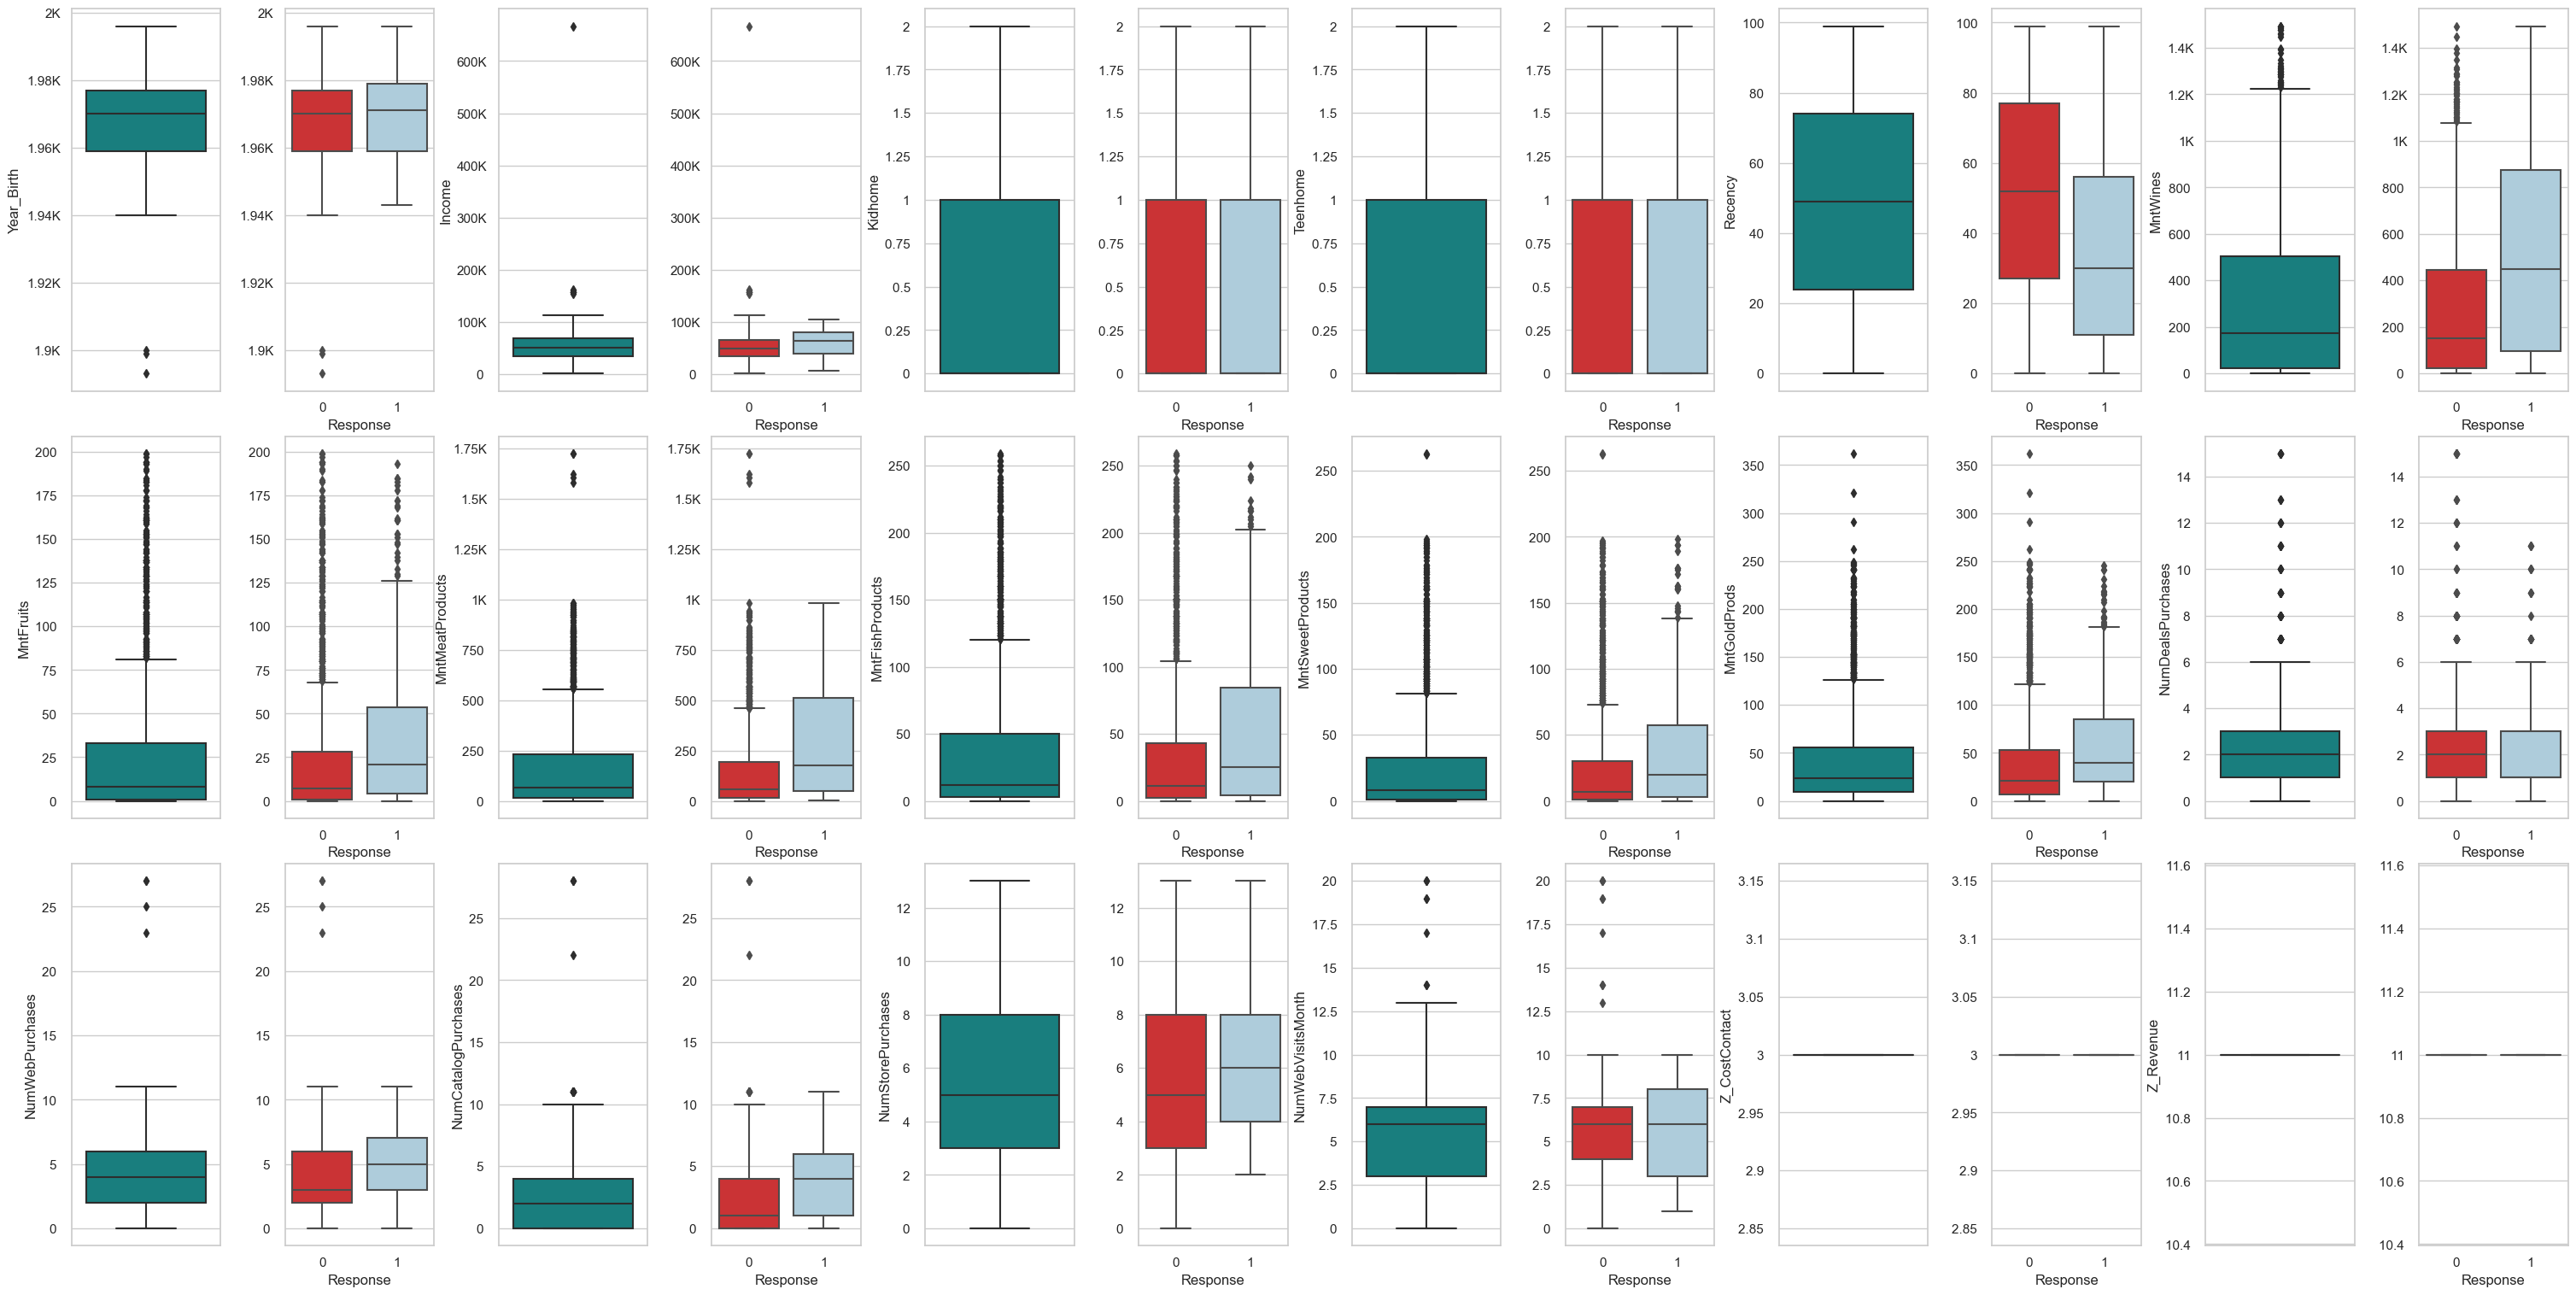

In [37]:
from math import log10, floor
def format_func(value, tick_number=None):
    num_thousands = 0 if abs(value) < 1000 else floor (log10(abs(value))/3)
    value = round(value / 1000**num_thousands, 2)
    return f'{value:g}'+' KMGTPEZY'[num_thousands]

plt.figure(figsize=(30, 15))
n = 3
j = 0

colors=["#e31a1c", "#a6cee3"]

for i in range(0, len(num_cols)*2, 2):
    ax1 = plt.subplot(n, math.ceil(len(num_cols)*2/n), i+1)
    sns.boxplot(y=df[num_cols[j]], color='#088F8F', orient='v')
    
    ax2 = plt.subplot(n, math.ceil(len(num_cols)*2/n), i+2, sharey=ax1)
    sns.boxplot(x=df["Response"], y=df[num_cols[j]], orient='v', palette=colors)
    
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
    
    ax2.set_ylabel(None)
    
    plt.tight_layout(pad=0.1)
    
    j+=1

**IQR (Interquartile Range)**

IQR to be more robust since outliers are not included in the calculation of percentiles.

In [38]:
# def handling_outliers_iqr(data, cols):
#     q1 = data[cols].quantile(q=0.25)
#     q3 = data[cols].quantile(q=0.75)
#     iqr = q3-q1
#     fence_low  = q1 - 1.5*iqr
#     fence_high = q3 + 1.5*iqr
    
#     lower_outlier = data[data[cols] < fence_low]
#     upper_outlier = data[data[cols] > fence_high]
    
#     filter_outliers = (data[cols] >= fence_low) & (data[cols] <= fence_high)
#     filtered = data[filter_outliers]
#     return filtered

# cols = ["Year_Birth","Income"]
# print("Jumlah data sebelum handling outliers :", df.shape[0])

# for i in cols:
#     df = handling_outliers_iqr(df, i)
#     print("Jumlah data setelah handling outliers ({}) : {}".format(i, df.shape[0]))

**Z-Score**

Z-score is highly dependent on normality. If your data is non-normal (bimodal, extreme outlier, etc) then z-score will give poor results since the outliers are included in the mean and standard deviation calculations.

In [39]:
from scipy import stats
def handling_outliers_zscore(data, cols):
    thres = 3
    mean = np.mean(df[cols])
    std = np.std(df[cols])
    zscore = abs((df[cols]-mean)/std)
    # zscore = abs(stats.zscore(data[cols]))
    
    outlier = data[zscore >= thres]
    
    filter_outliers = zscore < thres # negative value none, bcs absolute
    filtered = data[filter_outliers]
    return filtered

cols = ["Year_Birth","Income"]
print("Jumlah data sebelum handling outliers :", df.shape[0])

for i in cols:
    df = handling_outliers_zscore(df, i) 
    print("Jumlah data setelah handling outliers ({}) : {}".format(i, df.shape[0]))

Jumlah data sebelum handling outliers : 2240
Jumlah data setelah handling outliers (Year_Birth) : 2237
Jumlah data setelah handling outliers (Income) : 2229


Mengecek hasil drop outliers

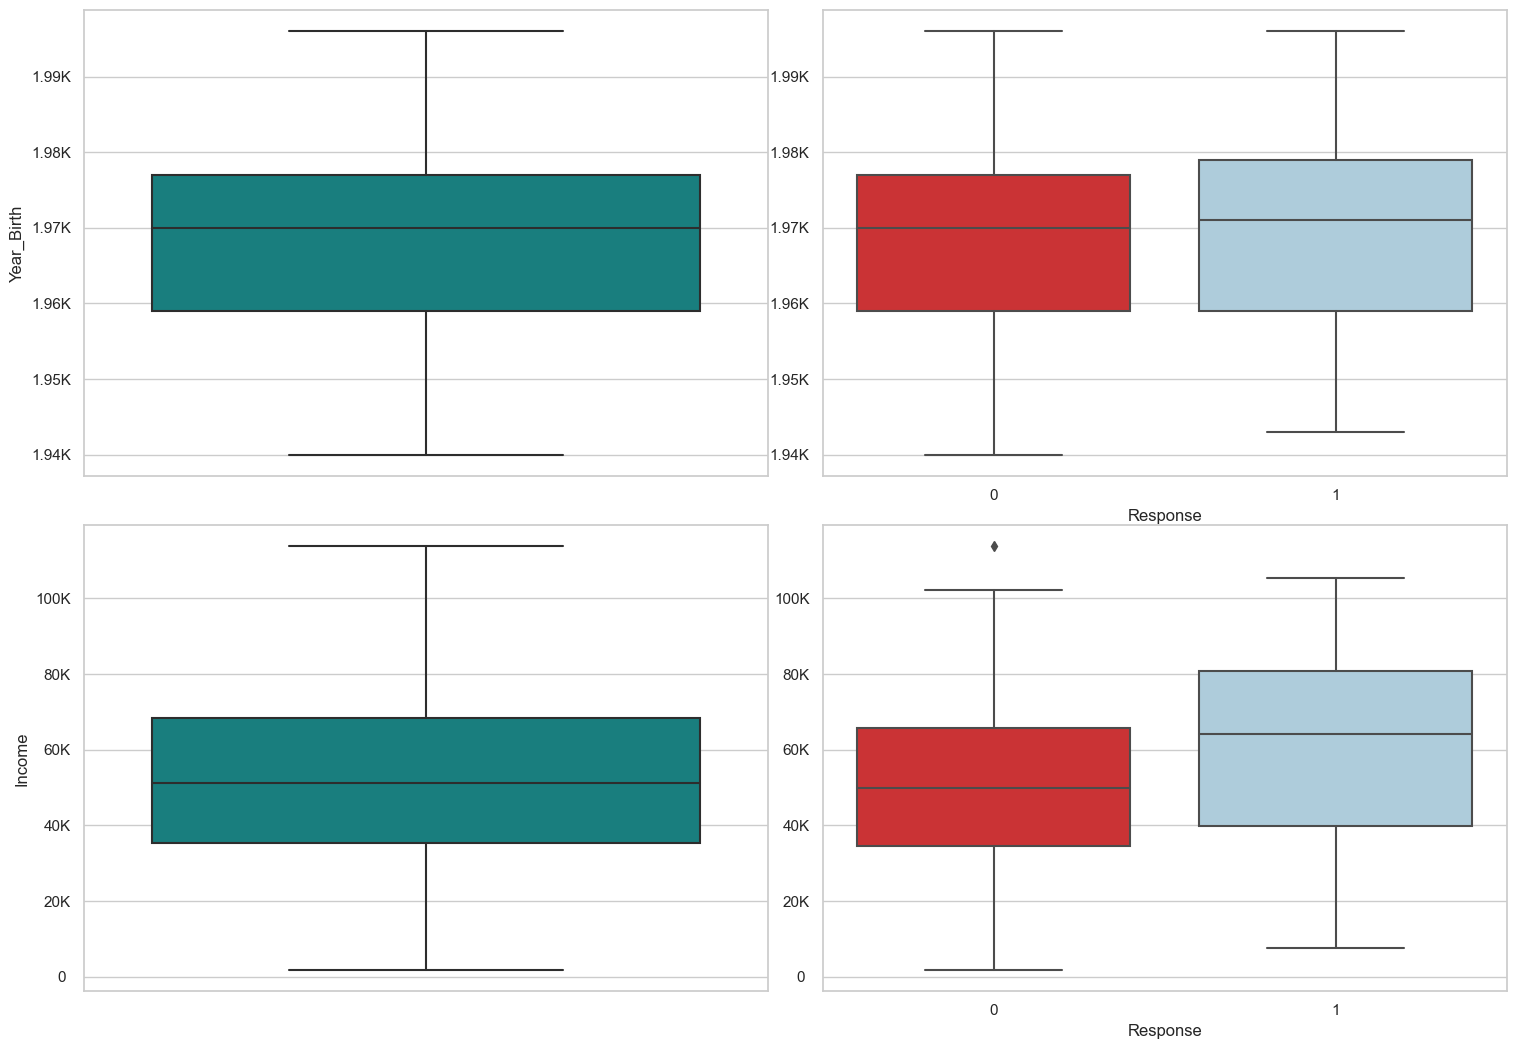

In [40]:
from math import log10, floor
def format_func(value, tick_number=None):
    num_thousands = 0 if abs(value) < 1000 else floor (log10(abs(value))/3)
    value = round(value / 1000**num_thousands, 2)
    return f'{value:g}'+' KMGTPEZY'[num_thousands]

plt.figure(figsize=(15, 15))
n = 3
j = 0

colors=["#e31a1c", "#a6cee3"]

for i in range(0, len(cols)*2, 2):
    ax1 = plt.subplot(n, math.ceil(len(cols)*2/n), i+1)
    sns.boxplot(y=df[cols[j]], color='#088F8F', orient='v')
    
    ax2 = plt.subplot(n, math.ceil(len(cols)*2/n), i+2, sharey=ax1)
    sns.boxplot(x=df["Response"], y=df[cols[j]], orient='v', palette=colors)
    
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
    
    ax2.set_ylabel(None)
    
    plt.tight_layout(pad=0.1)
    
    j+=1

In [41]:
df.reset_index(drop=True, inplace=True)

## **📌 Feature Engineering / Extraction**

New Calculation, Extraction, and Binning features for business insight :
- Age Customer
- Age Group
- Has Child
- Dependents
- Month Customer
- Spending
- Total Accepted/Responses
- Income Segment
- Convertion Rate
- Total of days/years joined

**Membuat Kolom `Umur / Age`**

In [42]:
# SAS Institute, 2014
# currentYear = datetime.now().year
currentYear = 2014 # based on data
df['Age'] = currentYear - df['Year_Birth']

**Membuat Kolom `Age Group`** 

[source age group](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.semanticscholar.org%2Fpaper%2FHuman-Age-Group-Classification-Using-Facial-Bhat-V.K.Patil%2F19ddb412336ce633c1fe21544605c7bd65ff8d66&psig=AOvVaw3Sm17zYYJRrkisQVRyg4rf&ust=1684919686463000&source=images&cd=vfe&ved=0CBMQjhxqFwoTCJDXlY2Ni_8CFQAAAAAdAAAAABAI)

<div>
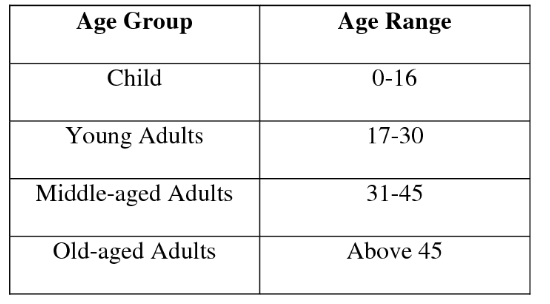
</div>

Akan disederhanakan lagi :
- Young Adult < 30
- Adult 30-45 Tahun
- Senior Adult > 45 tahun

In [43]:
def age_group(x):
    if x > 45:
        grup = 'Senior Adult'
    elif x > 30:
        grup = 'Adult'
    else:
        grup = 'Young Adult'
    
    return grup

df['Age_group'] = df["Age"].apply(lambda x: age_group(x))

**Membuat Kolom `Has_child`**

Menggabungkan Kidhome dan Teenhome menjadi feature Has_child

In [44]:
df['Has_child'] = np.where(df["Kidhome"]+df["Teenhome"] > 0, 1, 0)

**Membuat Kolom `Dependents`**

Jumlah tanggungan dari customer

In [45]:
df['Dependents'] = df['Kidhome'] + df['Teenhome']

**Membuat Kolom `Lifetime`**

Sudah berapa bulan customer sejak pembelian pertama di supermarket

In [46]:
df['Lifetime'] = (2014 - df.Dt_Customer.dt.year)*12 + df.Dt_Customer.dt.month

**Membuat Kolom `Spending`**

Jumlah pembelian tiap customer pada keseluruhan product

In [47]:
df['Spending']=df['MntWines']+ \
    df['MntFruits']+ \
    df['MntMeatProducts']+ \
    df['MntFishProducts']+ \
    df['MntSweetProducts']+ \
    df['MntGoldProds']

**Membuat Kolom `Primer and Tersier product`**

Jumlah pembelian tiap customer pada keseluruhan product

In [48]:
# primer and tersier product
df['Primer_purchase'] = df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']
df['Tersier_purchase'] = df['MntWines']+df['MntSweetProducts']+df["MntGoldProds"]

**Membuat Kolom `Total of Purchases`**

In [49]:
df['Total_Purchases'] = df['NumDealsPurchases'] + \
    df['NumWebPurchases'] + \
    df['NumCatalogPurchases'] + \
    df['NumStorePurchases']

**Membuat Kolom `Total_Cmp`**

Berapa kali tiap customer merespon ke 5 campign yang dilaksanakan (AcceptedCmp 1 - 5)

In [50]:
df['Total_Cmp']=df['AcceptedCmp1'].astype("int64")+ \
    df['AcceptedCmp2'].astype("int64")+ \
    df['AcceptedCmp3'].astype("int64")+ \
    df['AcceptedCmp4'].astype("int64")+ \
    df['AcceptedCmp5'].astype("int64")

**Membuat Kolom `Ever_Accept`**

Apakah Customer pernah minimal sekali menerima campign atau tidak pernah sama sekali

In [51]:
df['Ever_Accept']=df['Total_Cmp'].apply(lambda x : 1 if x >= 1 else 0)

**Membuat Kolom `Total Revenue`**

In [52]:
# total revenue
df['Total_revenue'] = (df['Total_Cmp']) * df['Z_Revenue']
df[['Z_Revenue', 'Total_revenue']].sample(5)

Z_Revenue  Total_revenue
238          11              0
1595         11              0
315          11              0
442          11              0
2140         11              0

**Membuat Kolom `Income Segmentation`**

- None -> Missing values
- High -> >= q3(68522)
- Medium -> q1(35303) - q3(68522)
- Low -> < q1(35303)

In [53]:
Q1 = df["Income"].quantile(.25)
print(Q1)
Q3 = df["Income"].quantile(.75)
print(Q3)

def income_sgmt(x):
    if (x is None) or (type(x) not in [int, float]) :
        segment = "None"
    else:
        if x >= Q3:
            segment = "High"
        elif x < Q3 and x >= Q1:
            segment = "Medium"
        else:
            segment = "Low"
    return segment

df["Income_sgmt"] = df["Income"].fillna("None")
df["Income_sgmt"] = df["Income_sgmt"].apply(lambda x: income_sgmt(x))

35246.0
68274.0


In [54]:
df["Income_sgmt"].unique()

array(['Medium', 'High', 'Low'], dtype=object)

**Membuat Kolom `Convertion Rate Web`**

In [55]:
df['Conversion_rate_web'] = np.round(df['Total_Purchases'] / df['NumWebVisitsMonth'], 2)
df['Conversion_rate_web'].fillna(0, inplace=True)
df['Conversion_rate_web'].replace([np.inf, -np.inf], 0, inplace=True)

**Membuat Kolom `Month and Year Joined`**

In [56]:
df['Year_joined'] = df['Dt_Customer'].dt.year
df['Month_joined'] = df['Dt_Customer'].dt.month

**Membuat Kolom `Recency_sgmt`**

In [57]:
Recency_sgmt=[]
for i in df['Recency']:
    if i <= 7 :
        Recency_sgmt.append("<= seminggu")
    elif i <= 14 :
        Recency_sgmt.append("<= 14 hari")
    elif i <= 30 :
        Recency_sgmt.append("<= sebulan")
    elif i <= 60 :
        Recency_sgmt.append("<= 2 bulan")
    else :
        Recency_sgmt.append("> 2 bulan")
df['Recency_sgmt'] = Recency_sgmt

**Mengecek nilai Extraction**

In [58]:
df.sample(5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
1430    574        1964  Graduation        Married  42523.0        0   
1253   5107        1973         PhD       Divorced  35860.0        1   
1876  10702        1984  Graduation         Single  52413.0        1   
1474   3102        1981      Master        Married  19414.0        1   
621   10156        1975  Graduation         Single  84196.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
1430         0  2014-04-23       96        14         36               11   
1253         1  2014-05-19       37        15          0                8   
1876         0  2012-11-03       67       185          8              133   
1474         0  2013-10-16       32         2          3               12   
621          1  2013-06-03       56       215         63              507   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1430                3                26            35                  1   
1253                4                 2            20                  2   
1876               56                56            12                  2   
1474                3                 5             7                  1   
621               231                31           190                  1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1430                1                    1                  4   
1253                1                    1                  2   
1876                7                    1                  7   
1474                1                    0                  3   
621                 8                    4                  7   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
1430                  2             0             0             0   
1253                  5             1             0             0   
1876                  7             0             0             0   
1474                  8             0             0             0   
621                   3             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  \
1430             0             0         0              3         11   
1253             0             0         0              3         11   
1876             0             0         0              3         11   
1474             0             0         0              3         11   
621              0             0         0              3         11   

      Response  Age     Age_group  Has_child  Dependents  Lifetime  Spending  \
1430         0   50  Senior Adult          0           0         4       125   
1253         0   41         Adult          1           2         5        49   
1876         0   30   Young Adult          1           1        35       450   
1474         0   33         Adult          1           1        22        32   
621          0   39         Adult          1           1        18      1237   

      Primer_purchase  Tersier_purchase  Total_Purchases  Total_Cmp  \
1430               50                75                7          0   
1253               12                37                6          1   
1876              197               253               17          0   
1474               18                14                5          0   
621               801               436               20          0   

      Ever_Accept  Total_revenue Income_sgmt  Conversion_rate_web  \
1430            0              0      Medium                 3.50   
1253            1             11      Medium                 1.20   
1876            0              0      Medium                 2.43   
1474            0              0         Low                 0.62   
621             0              0        High                 6.67   

      Year_joined  Month_joined Recency_sgmt  
1430         2014             4    > 2 bulan  


**Categorical (String)**

- Education - Basic, Graduation, Master, PhD
- Marital_Status - Single, Married, Divorced, Widow, Others
- Age_group - Young Adult, Adult, Senior Adult
- Income_sgmt - High, Medium, Low, None
- Recency_sgmt - <= seminggu , <= 14 hari , <= sebulan , <= 2 bulan, > 2 bulan

**Categorical (Int)**

- ID
- Kidhome - 0, 1, 2
- Teenhome - 0, 1, 2
- AcceptedCmp1 - 0, 1
- AcceptedCmp2 - 0, 1
- AcceptedCmp3 - 0, 1
- AcceptedCmp4 - 0, 1
- AcceptedCmp5 - 0, 1
- Ever_Accept - 0, 1
- Complain - 0, 1
- Response - 0, 1
- Has_child - 0, 1

**Numericals**

- Year_Birth = 1893 - 1996
- Income = 1730.0 - 666666.0
- Kidhome = 0 - 2
- Teenhome = 0 - 2
- Recency = 0 - 99
- Age = 18 - 121
- Dependents = 0 - 3
- Lifetime = 1 - 36
- Spending = 5 - 2525
- Primer_purchase = 1 - 1727
- Tersier_purchase = 3 - 1689
- Total_Purchases = 0 - 44
- NumWebVisitsMonth = 0 - 20
- Conversion_rate_web = 0.0 - 43.0
- Total_Cmp = 0 - 4
- Total_revenue = 0 - 44
- Year_joined = 2012 - 2014
- Month_joined = 1 - 12

**Numericals (one)**

- Z_CostContact = 3
- Z_Revenue = 11

**Numericals (Product)**

- MntWines = 0 - 1493
- MntFruits = 0 - 199
- MntMeatProducts = 0 - 1725
- MntFishProducts = 0 - 259
- MntSweetProducts = 0 - 263
- MntGoldProds = 0 - 362

**Numericals (Purchases)**

- NumDealsPurchases = 0 - 15
- NumWebPurchases = 0 - 27
- NumCatalogPurchases = 0 - 28
- NumStorePurchases = 0 - 13

**Timestamp**
- Dt_Customer = 2012-07-30 - 2014-06-29

In [59]:
cat_str = ['Education', 'Marital_Status', 'Age_group', 'Income_sgmt', 'Recency_sgmt']
cat_int = ['ID', 'Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
           'Ever_Accept', 'Complain', 'Response', 'Has_child']

num = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Age', 'Dependents', 'Lifetime', 'Spending', 
       'Primer_purchase', 'Tersier_purchase', 'Total_Purchases', 'NumWebVisitsMonth', 'Conversion_rate_web', 
       'Total_Cmp', 'Total_revenue', 'Year_joined', 'Month_joined']

num_one = ['Z_CostContact', 'Z_Revenue']

num_product = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
num_purchases = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

timestamp = ["Dt_Customer"]

Mengecek Kolom di pembagian type

In [60]:
allcol = cat_str + cat_int + num + num_one + num_product + num_purchases + timestamp
for i in df:
    if i not in allcol:
        print(i)

In [61]:
#cek unique value
cat_cols = cat_str+cat_int
for x in cat_cols: 
    unq = list(df[x].unique())
    sorted(unq)
    
    print (f'===== {x} =====')
    if len(unq) >= 10:
        unq = list(unq[:10])+['.....']
        print (f'{unq}')
    else:
        print (f'{unq}')
    print()

num_cols = num + num_one + num_product + num_purchases
for x in num_cols + timestamp: 
    print("{} = {} - {}".format(x, min(df[x]), max(df[x])))

===== Education =====
['Graduation', 'PhD', 'Master', 'Basic']

===== Marital_Status =====
['Single', 'Married', 'Divorced', 'Widow', 'Others']

===== Age_group =====
['Senior Adult', 'Young Adult', 'Adult']

===== Income_sgmt =====
['Medium', 'High', 'Low']

===== Recency_sgmt =====
['<= 2 bulan', '<= sebulan', '> 2 bulan', '<= 14 hari', '<= seminggu']

===== ID =====
[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, '.....']

===== Kidhome =====
[0, 1, 2]

===== Teenhome =====
[0, 1, 2]

===== AcceptedCmp1 =====
[0, 1]

===== AcceptedCmp2 =====
[0, 1]

===== AcceptedCmp3 =====
[0, 1]

===== AcceptedCmp4 =====
[0, 1]

===== AcceptedCmp5 =====
[0, 1]

===== Ever_Accept =====
[0, 1]

===== Complain =====
[0, 1]

===== Response =====
[1, 0]

===== Has_child =====
[0, 1]

Year_Birth = 1940 - 1996
Income = 1730.0 - 113734.0
Kidhome = 0 - 2
Teenhome = 0 - 2
Recency = 0 - 99
Age = 18 - 74
Dependents = 0 - 3
Lifetime = 1 - 36
Spending = 5 - 2525
Primer_purchase = 1 - 1727
Tersier_pu

In [62]:
new_cols = list(df.columns.values)
new_cols.remove("Response")
new_cols.append("Response")
df = df[new_cols].copy()

In [63]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Age',
       'Age_group', 'Has_child', 'Dependents', 'Lifetime', 'Spending',
       'Primer_purchase', 'Tersier_purchase', 'Total_Purchases', 'Total_Cmp',
       'Ever_Accept', 'Total_revenue', 'Income_sgmt', 'Conversion_rate_web',
       'Year_joined', 'Month_joined', 'Recency_sgmt', 'Response'],
      dtype='object')

## **📌 Feature Transformation**

In [64]:
skew_type_list = []
skew_val_list = []
kurtosis_val_list = []

for column in num_cols:
    data = df[column].dropna(axis=0)
    q1 = data.quantile(q=0.25)
    mean = round(data.mean(), 3)
    median = data.median()
    mode = data.mode()[0]
    q3 = data.quantile(q=0.75)
    # skew_val = round(data.skew(),3)
    skew_val = round(skew(data, nan_policy="omit"),3)
    kurtosis_val = round(kurtosis(data, nan_policy="omit"),3)

    if (mean == median == mode) or (-0.2 < skew_val < 0.2):
        skew_type = "Normal Distribution (Symmetric)"
    elif mean < median < mode:
        skew_type = "Negatively Skewed"
        if skew_val <= -1:
            skew_type = "Highly Negatively Skewed"
        elif -0.5 >= skew_val > -1:
            skew_type = "Moderately Negatively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"
    else:
        skew_type = "Positively Skewed"
        if skew_val >= 1:
            skew_type = "Highly Positively Skewed"
        elif 0.5 <= skew_val < 1:
            skew_type = "Moderately Positively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"
    skew_type_list.append(skew_type)
    skew_val_list.append(skew_val)
    kurtosis_val_list.append(kurtosis_val)
            
dist = pd.DataFrame({
    "Column Name":num_cols,
    "Skewness": skew_val_list,
    "Kurtosis": kurtosis_val_list,
    "Type of Distribution": skew_type_list
})

# for bimodial and Uniform

dist.loc[dist["Column Name"].isin(["Z_CostContact", "Z_Revenue"]), "Type of Distribution"] = "Uniform Distribution"
dist.loc[dist["Column Name"].isin(["Kidhome", "Teenhome"]), "Type of Distribution"] = "Bimodal Distribution"
dist = dist.sort_values(["Type of Distribution","Column Name"]).reset_index(drop=True)
dist

C:\Users\nurim\AppData\Local\Temp\ipykernel_25024\1677991082.py:13: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.

C:\Users\nurim\AppData\Local\Temp\ipykernel_25024\1677991082.py:14: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.

C:\Users\nurim\AppData\Local\Temp\ipykernel_25024\1677991082.py:13: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.

C:\Users\nurim\AppData\Local\Temp\ipykernel_25024\1677991082.py:14: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.



Column Name  Skewness  Kurtosis  \
0               Kidhome     0.635    -0.779   
1              Teenhome     0.404    -0.987   
2   Conversion_rate_web     2.322     6.399   
3       MntFishProducts     1.914     3.067   
4             MntFruits     2.098     4.036   
5          MntGoldProds     1.881     3.533   
6       MntMeatProducts     1.889     3.842   
7      MntSweetProducts     2.130     4.337   
8              MntWines     1.171     0.587   
9   NumCatalogPurchases     1.370     3.199   
10    NumDealsPurchases     2.318     8.158   
11      NumWebPurchases     1.387     5.727   
12      Primer_purchase     1.513     1.713   
13            Total_Cmp     2.715     7.935   
14        Total_revenue     2.715     7.935   
15           Dependents     0.415    -0.249   
16    NumWebVisitsMonth     0.219     1.865   
17      Total_Purchases     0.231    -0.979   
18    NumStorePurchases     0.707    -0.632   
19             Spending     0.862    -0.333   
20     Tersier_purchase     0.968     0.038   
21                  Age     0.089    -0.798   
22               Income     0.022    -0.833   
23             Lifetime     0.061    -1.004   
24         Month_joined    -0.000    -1.279   
25              Recency    -0.005    -1.201   
26           Year_Birth    -0.089    -0.798   
27          Year_joined    -0.035    -0.868   
28        Z_CostContact       NaN       NaN   
29            Z_Revenue       NaN       NaN   

                          Type of Distribution  
0                         Bimodal Distribution  
1                         Bimodal Distribution  
2                     Highly Positively Skewed  
3                     Highly Positively Skewed  
4                     Highly Positively Skewed  
5                     Highly Positively Skewed  
6                     Highly Positively Skewed  
7                     Highly Positively Skewed  
8                     Highly Positively Skewed  
9                     Highly Positively Skewed  
10                    Highly Positively Skewed  
11                    Highly Positively Skewed  
12                    Highly Positively Skewed  
13                    Highly Positively Skewed  
14                    Highly Positively Skewed  
15  Moderately Normal Distribution (Symmetric)  
16  Moderately Normal Distribution (Symmetric)  
17  Moderately Normal Distribution (Symmetric)  
18                Moderately Positively Skewed  
19                Moderately Positively Skewed  
20                Moderately Positively Skewed  
21             Normal Distribution (Symmetric)  
22             Normal Distribution (Symmetric)  
23             Normal Distribution (Symmetric)  
24             Normal Distribution (Symmetric)  
25             Normal Distribution (Symmetric)  
26             Normal Distribution (Symmetric)  
27             Normal Distribution (Symmetric)  
28                        Uniform Distribution  
29                        Uniform Distribution

In [65]:
exclude = ["Kidhome", "Teenhome", "Dependents", "Total_Cmp"]

log_cols = sorted(list(dist[
    dist["Type of Distribution"].str.contains("Positively Skewed") & 
    ~dist["Column Name"].isin(exclude)
]["Column Name"].values))

norm_cols = sorted(list(dist[
    dist["Type of Distribution"].str.contains("Normal Distribution") & 
    ~dist["Column Name"].isin(exclude)
]["Column Name"].values))

print("Log Transformation =", log_cols)
print("Normalisasi/Standardization =", norm_cols)

Log Transformation = ['Conversion_rate_web', 'MntFishProducts', 'MntFruits', 'MntGoldProds', 'MntMeatProducts', 'MntSweetProducts', 'MntWines', 'NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases', 'NumWebPurchases', 'Primer_purchase', 'Spending', 'Tersier_purchase', 'Total_revenue']
Normalisasi/Standardization = ['Age', 'Income', 'Lifetime', 'Month_joined', 'NumWebVisitsMonth', 'Recency', 'Total_Purchases', 'Year_Birth', 'Year_joined']


**Log Transformation**

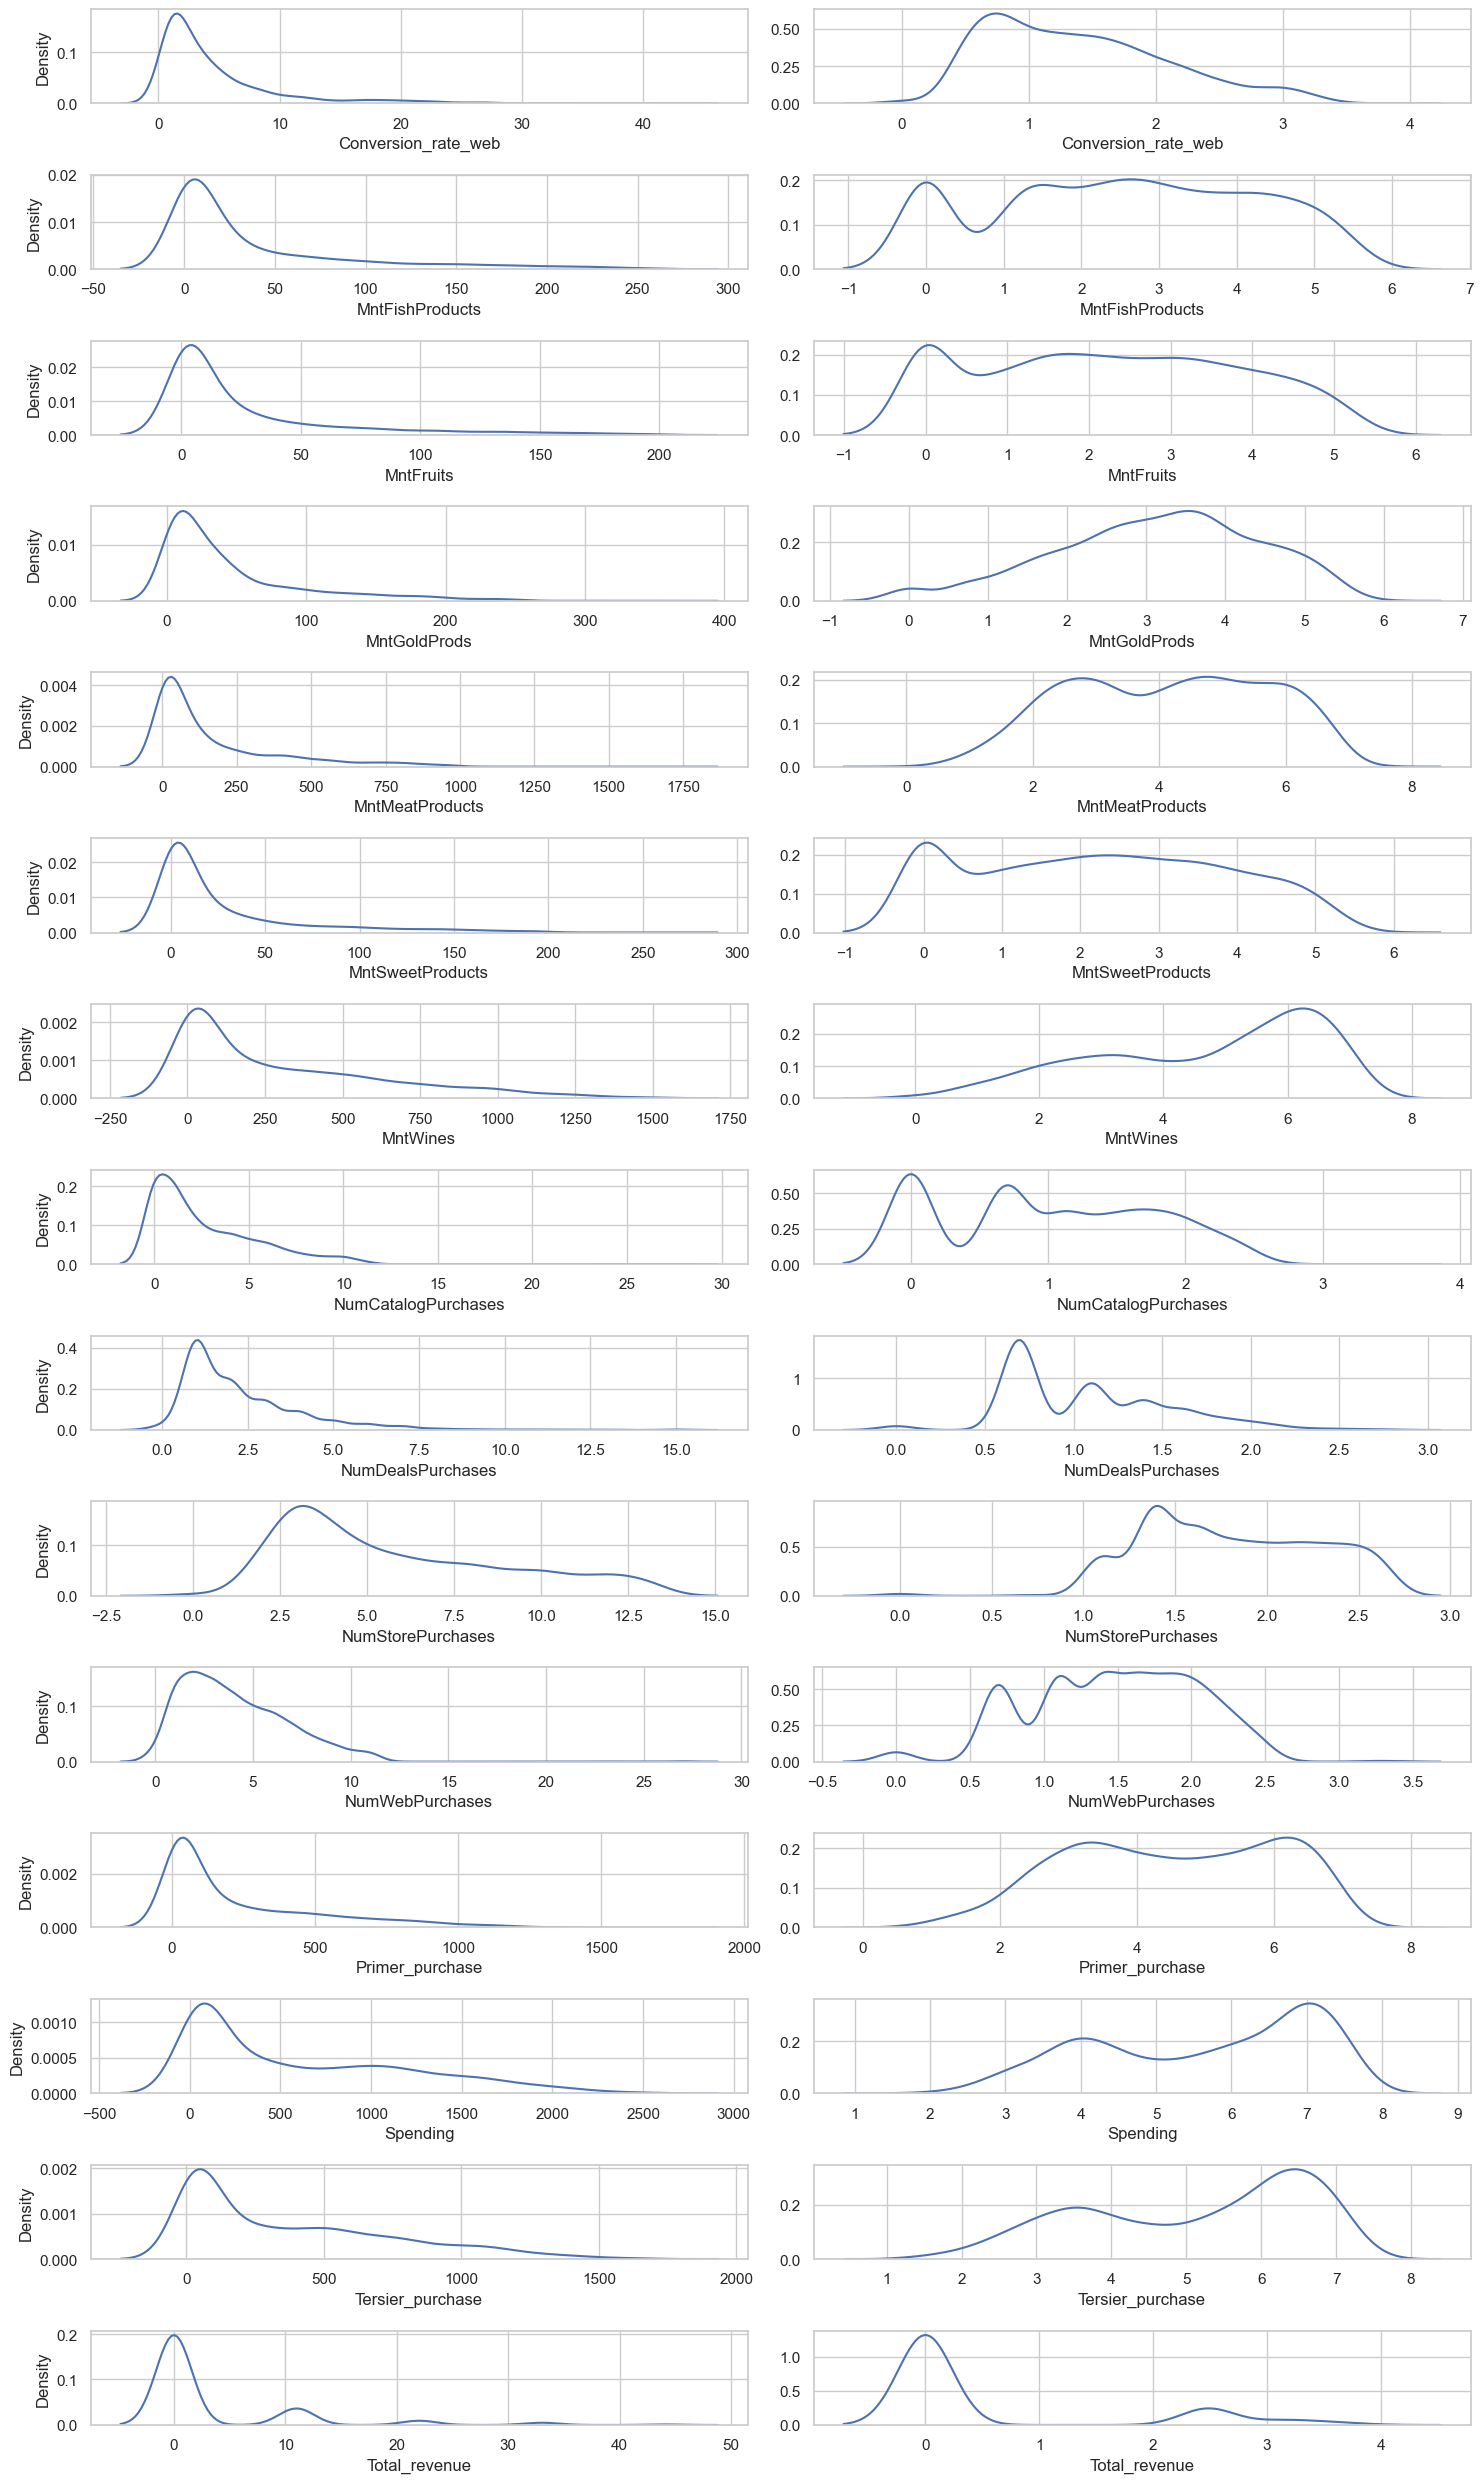

In [66]:
fig, ax = plt.subplots(len(log_cols),2,figsize=(15,25))
for i in range(0,len(log_cols)):
    kde1 = sns.kdeplot(df[log_cols[i]], ax=ax[i][0])
    kde2 = sns.kdeplot(np.log(df[log_cols[i]]+1), ax=ax[i][1])
    kde2.set_ylabel(None)
    plt.tight_layout()

In [67]:
# add 1 bcs err : divide by zero encountered in log
# df[log_cols] = np.log(df[log_cols]+1)
# df[log_cols] = np.log1p(df[log_cols])

In [68]:
# df[log_cols].describe()

**Box-Cox Transformation with Scipy**

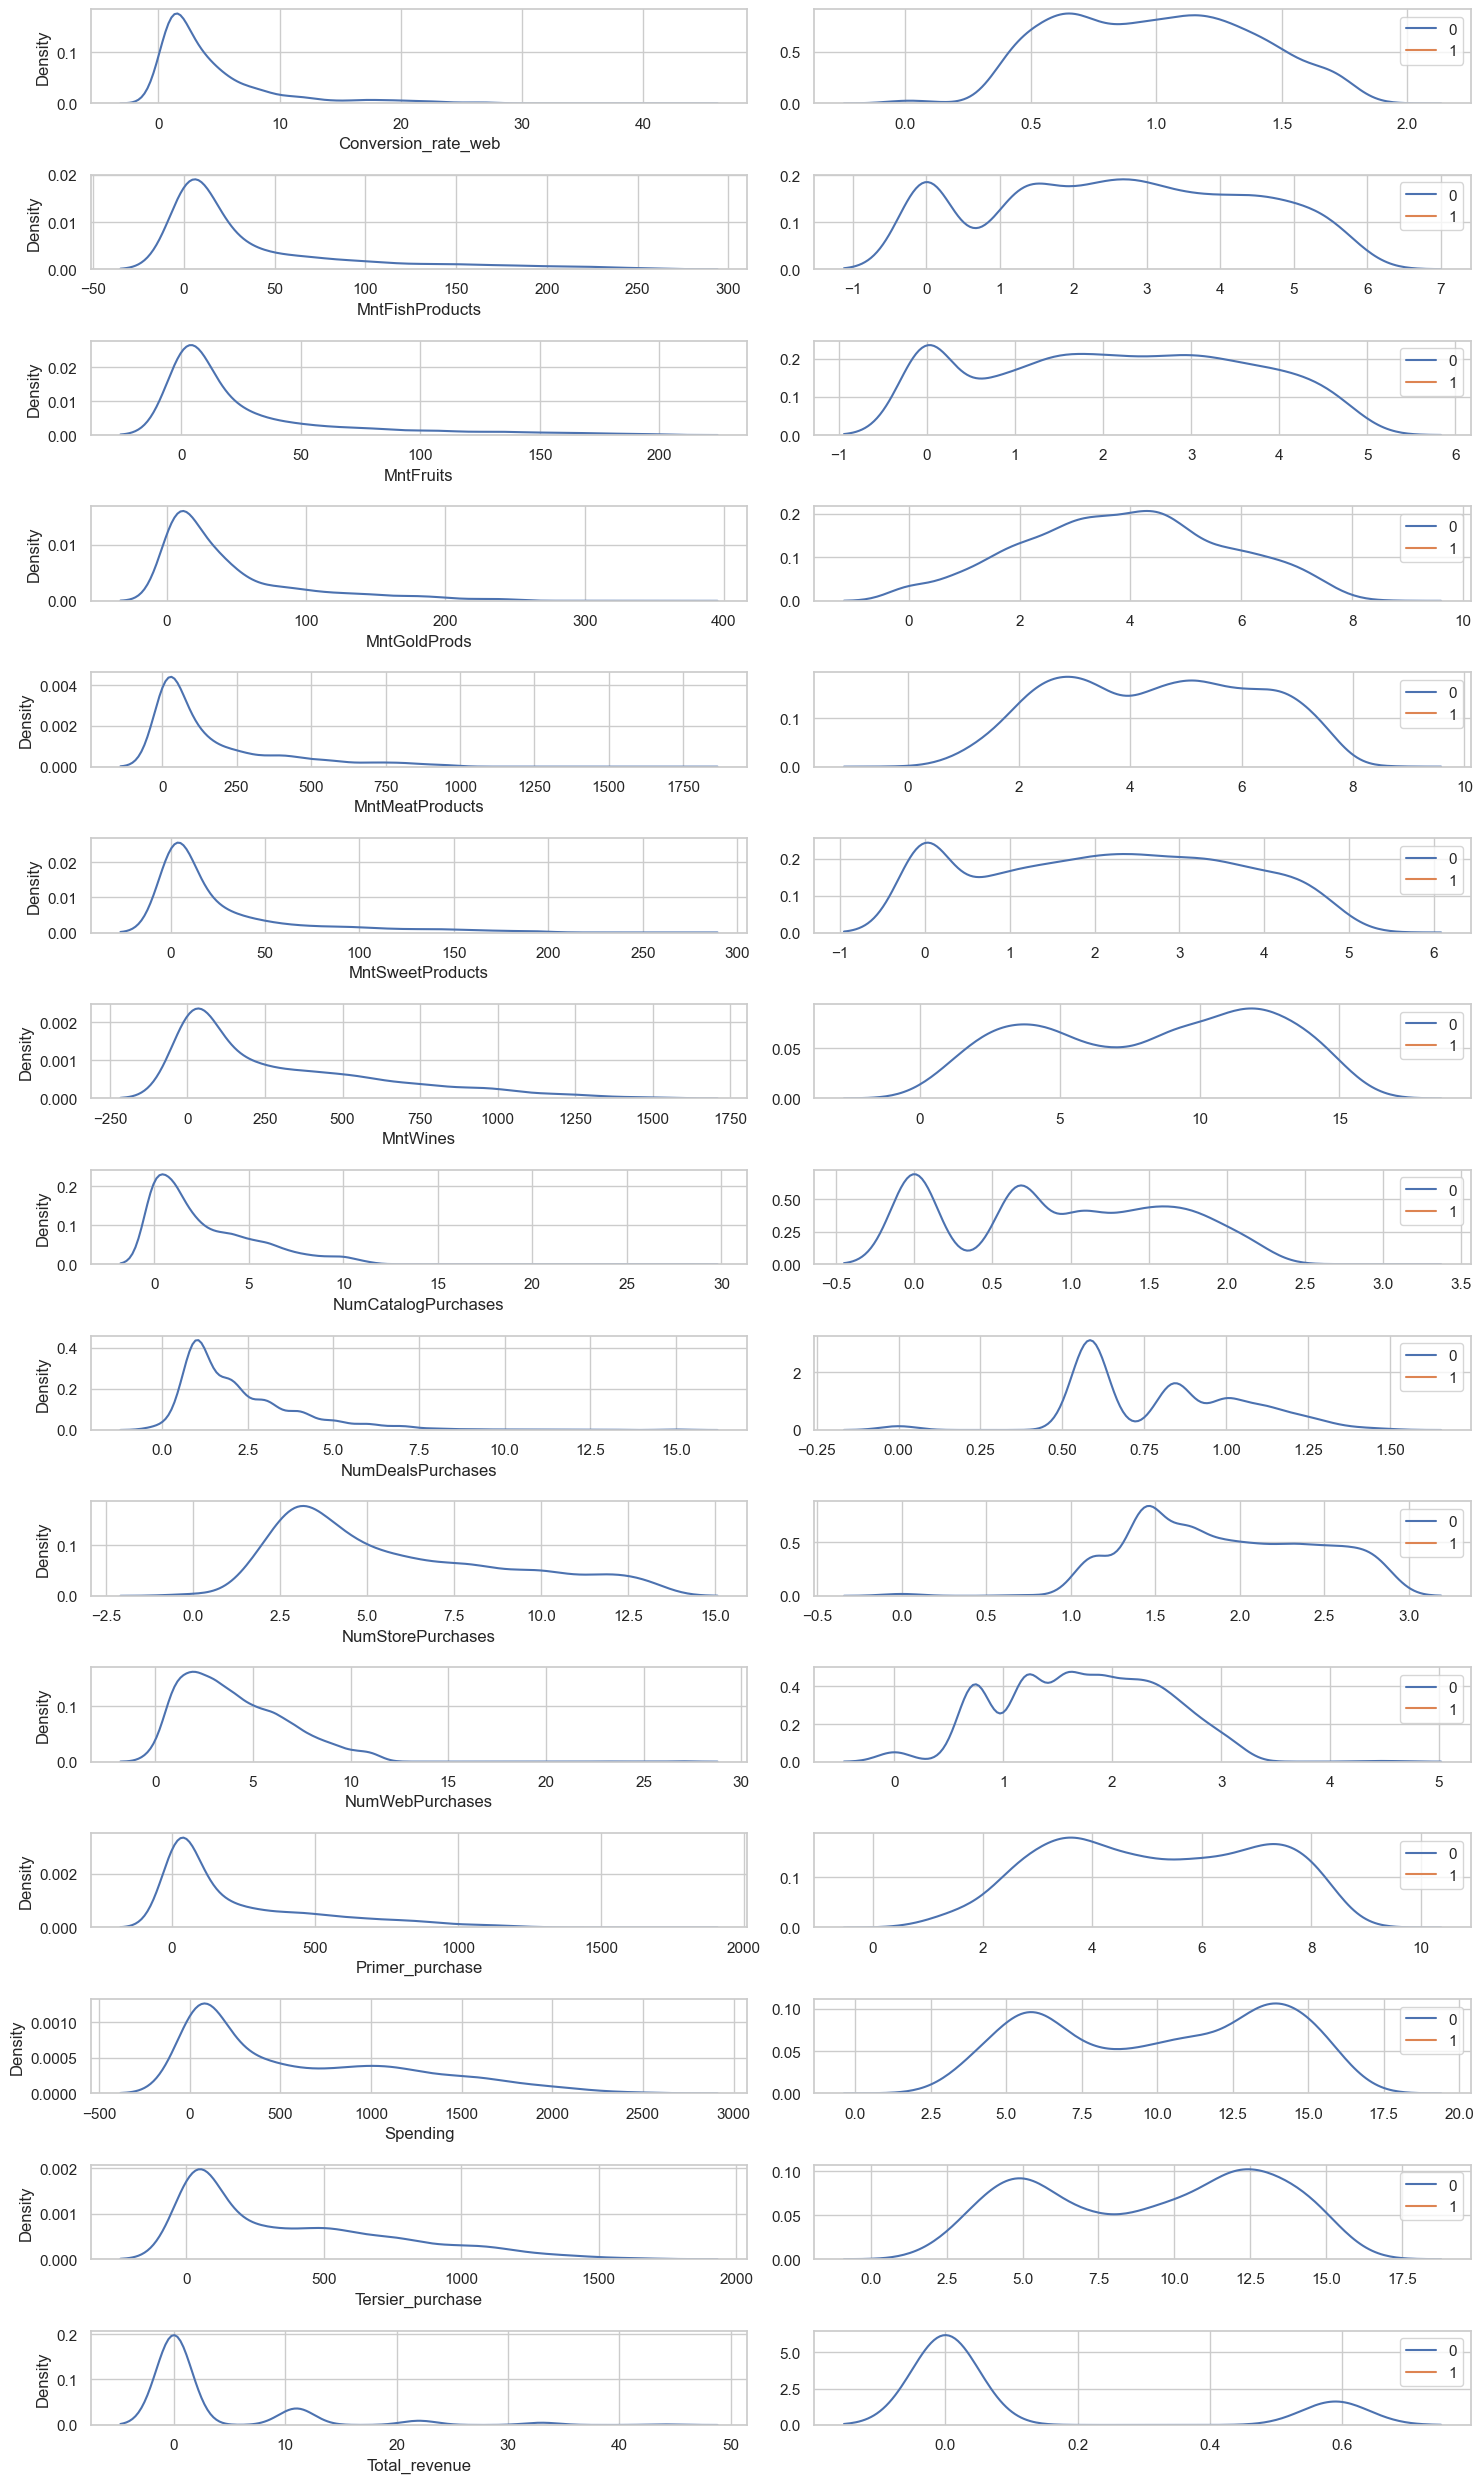

In [69]:
fig, ax = plt.subplots(len(log_cols),2,figsize=(15,25))
for i in range(0,len(log_cols)):
    kde1 = sns.kdeplot(df[log_cols[i]], ax=ax[i][0])
    kde2 = sns.kdeplot(stats.boxcox(df[log_cols[i]]+1), warn_singular=False, ax=ax[i][1])
    kde2.set_ylabel(None)
    plt.tight_layout()

In [70]:
# for i in log_cols:
#     df[i], parameters = stats.boxcox(df[i]+1)

In [71]:
# df[log_cols].describe()

**Box-Cox Transformation with Sklearn**

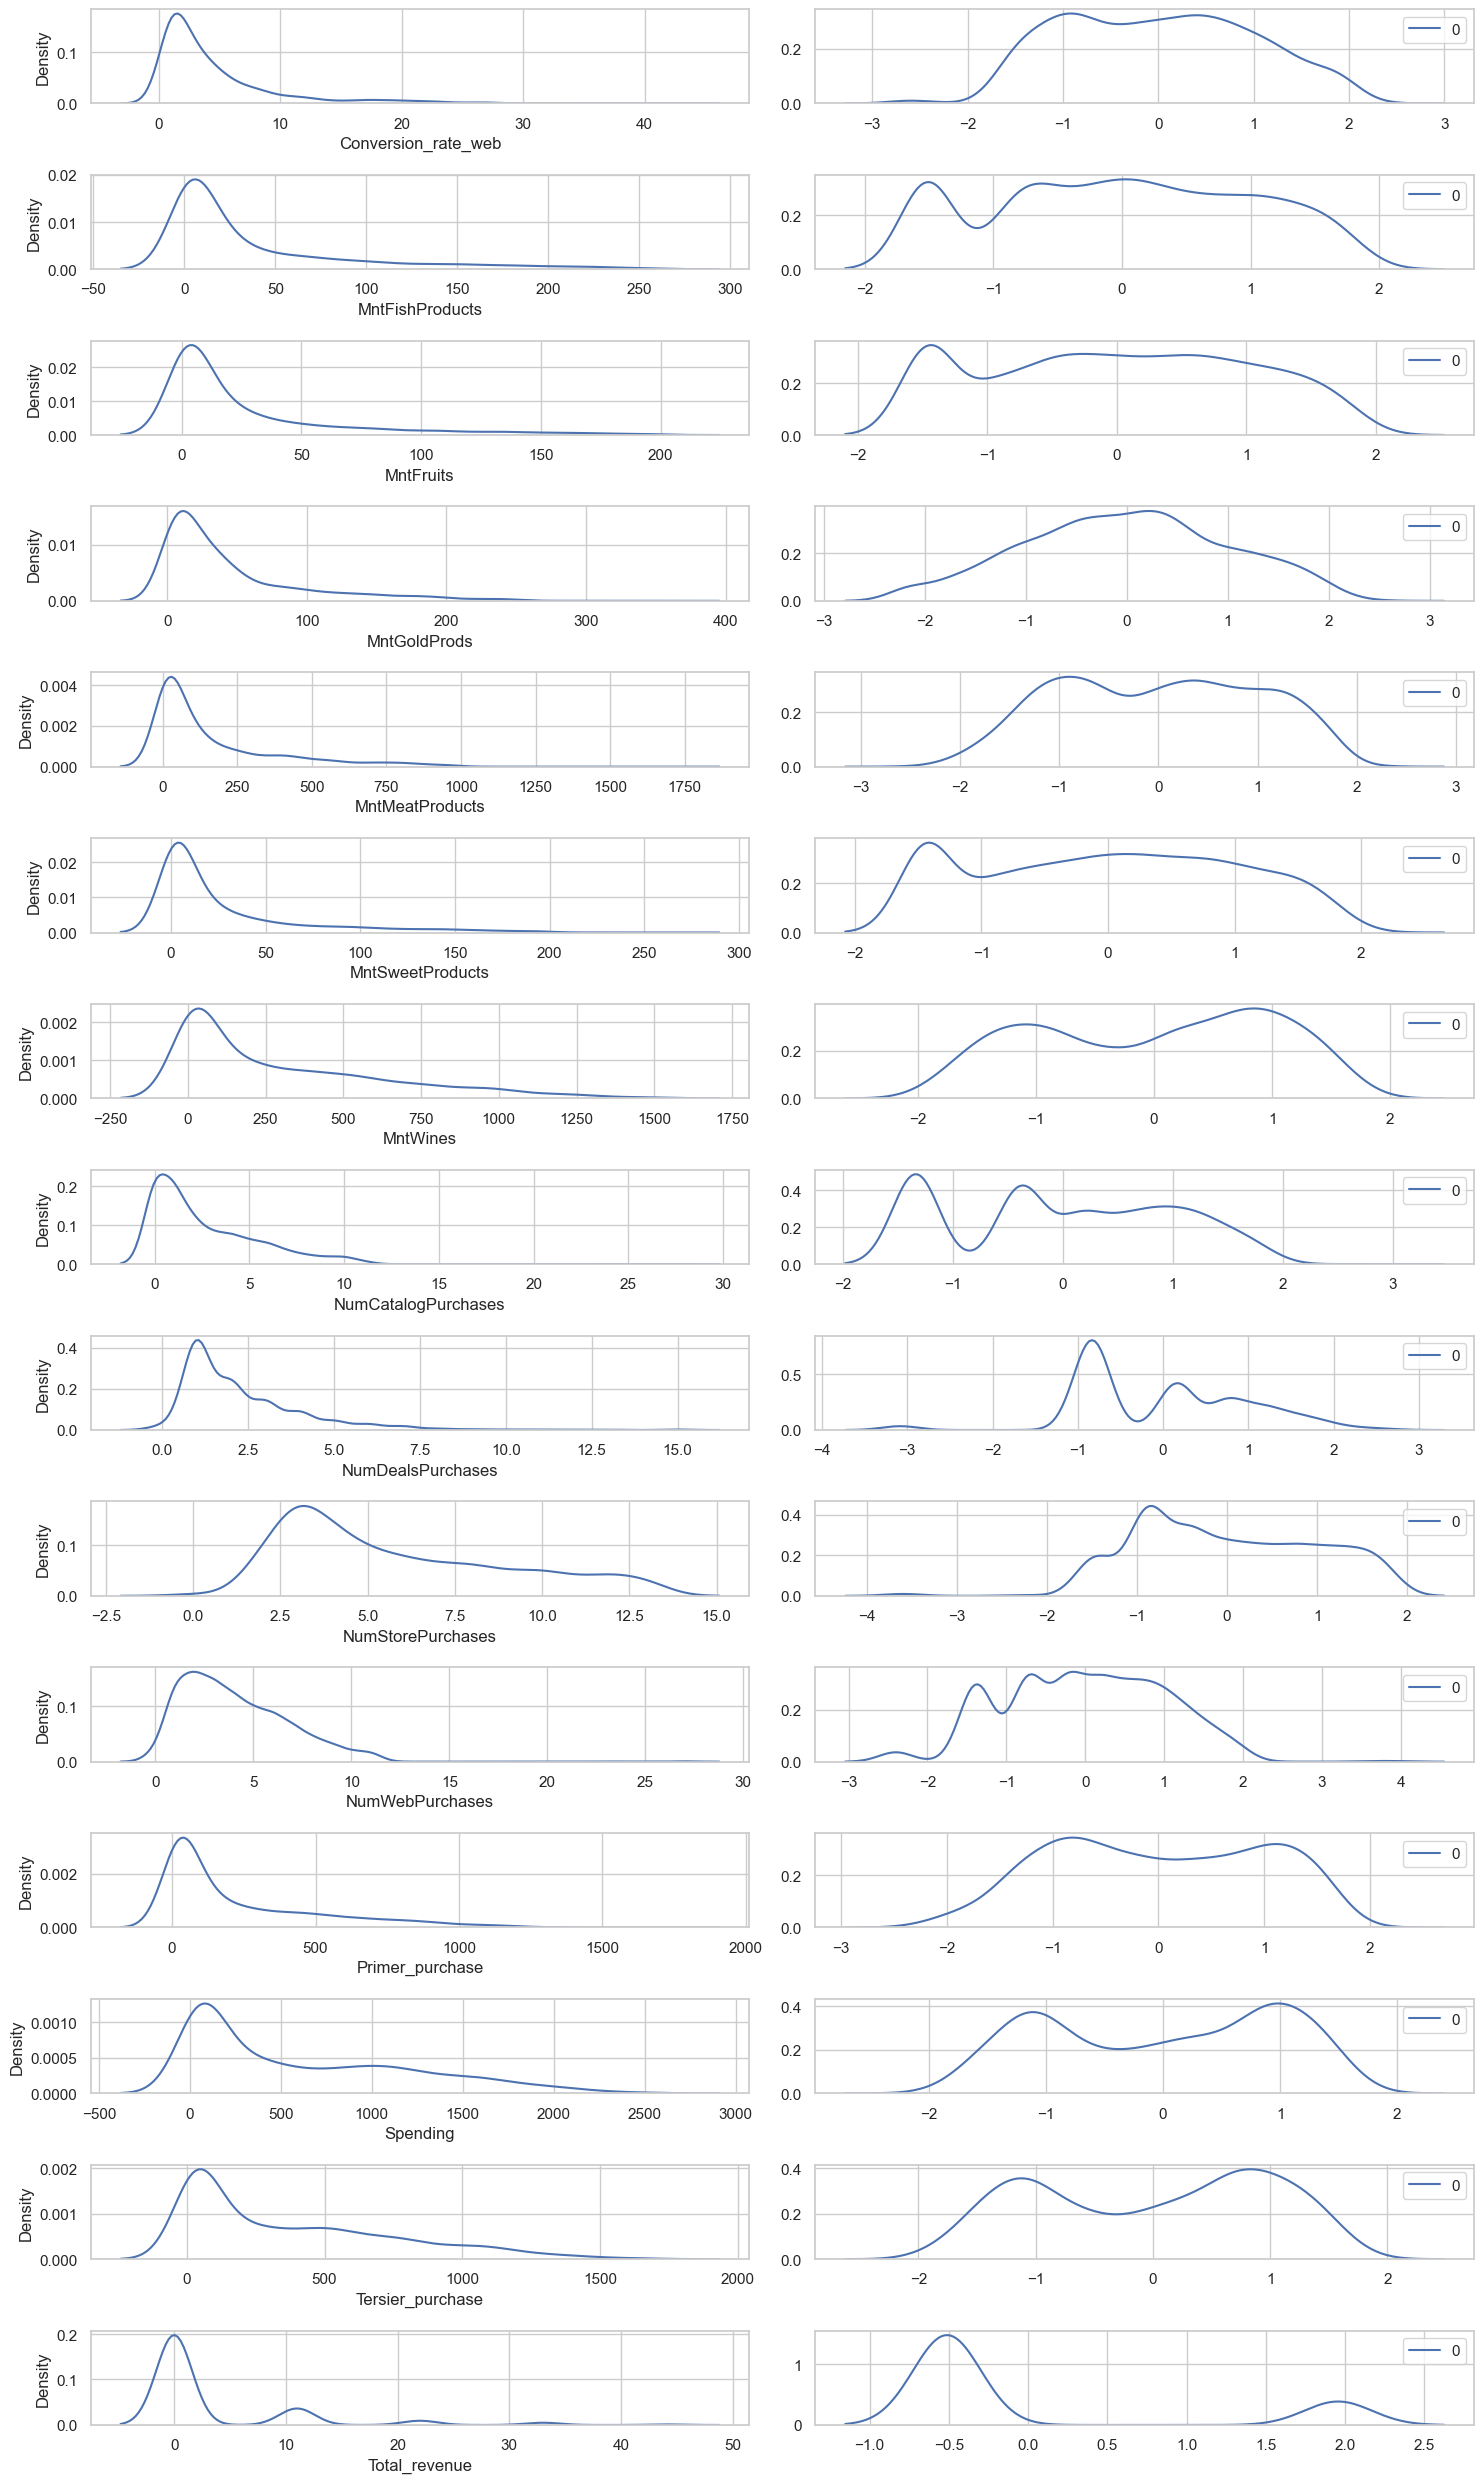

In [72]:
from sklearn.preprocessing import PowerTransformer

fig, ax = plt.subplots(len(log_cols),2,figsize=(15,25))
for i in range(0,len(log_cols)):
    pt = PowerTransformer(method='box-cox')
    data = pt.fit_transform(df[[log_cols[i]]]+1)
    kde1 = sns.kdeplot(df[log_cols[i]], ax=ax[i][0])
    kde2 = sns.kdeplot(data, ax=ax[i][1])
    kde2.set_ylabel(None)
    plt.tight_layout()

In [73]:
# pt = PowerTransformer(method='box-cox')
# df[log_cols] = pt.fit_transform(df[log_cols]+1)

In [74]:
# df[log_cols].describe()

**Yeo-Johnson Transformation**

Unlike the Box-Cox transform, it does not require the values for each input variable to be strictly positive.

It supports zero values and negative values. This means we can apply it to our dataset without scaling it first.

**with scipy**

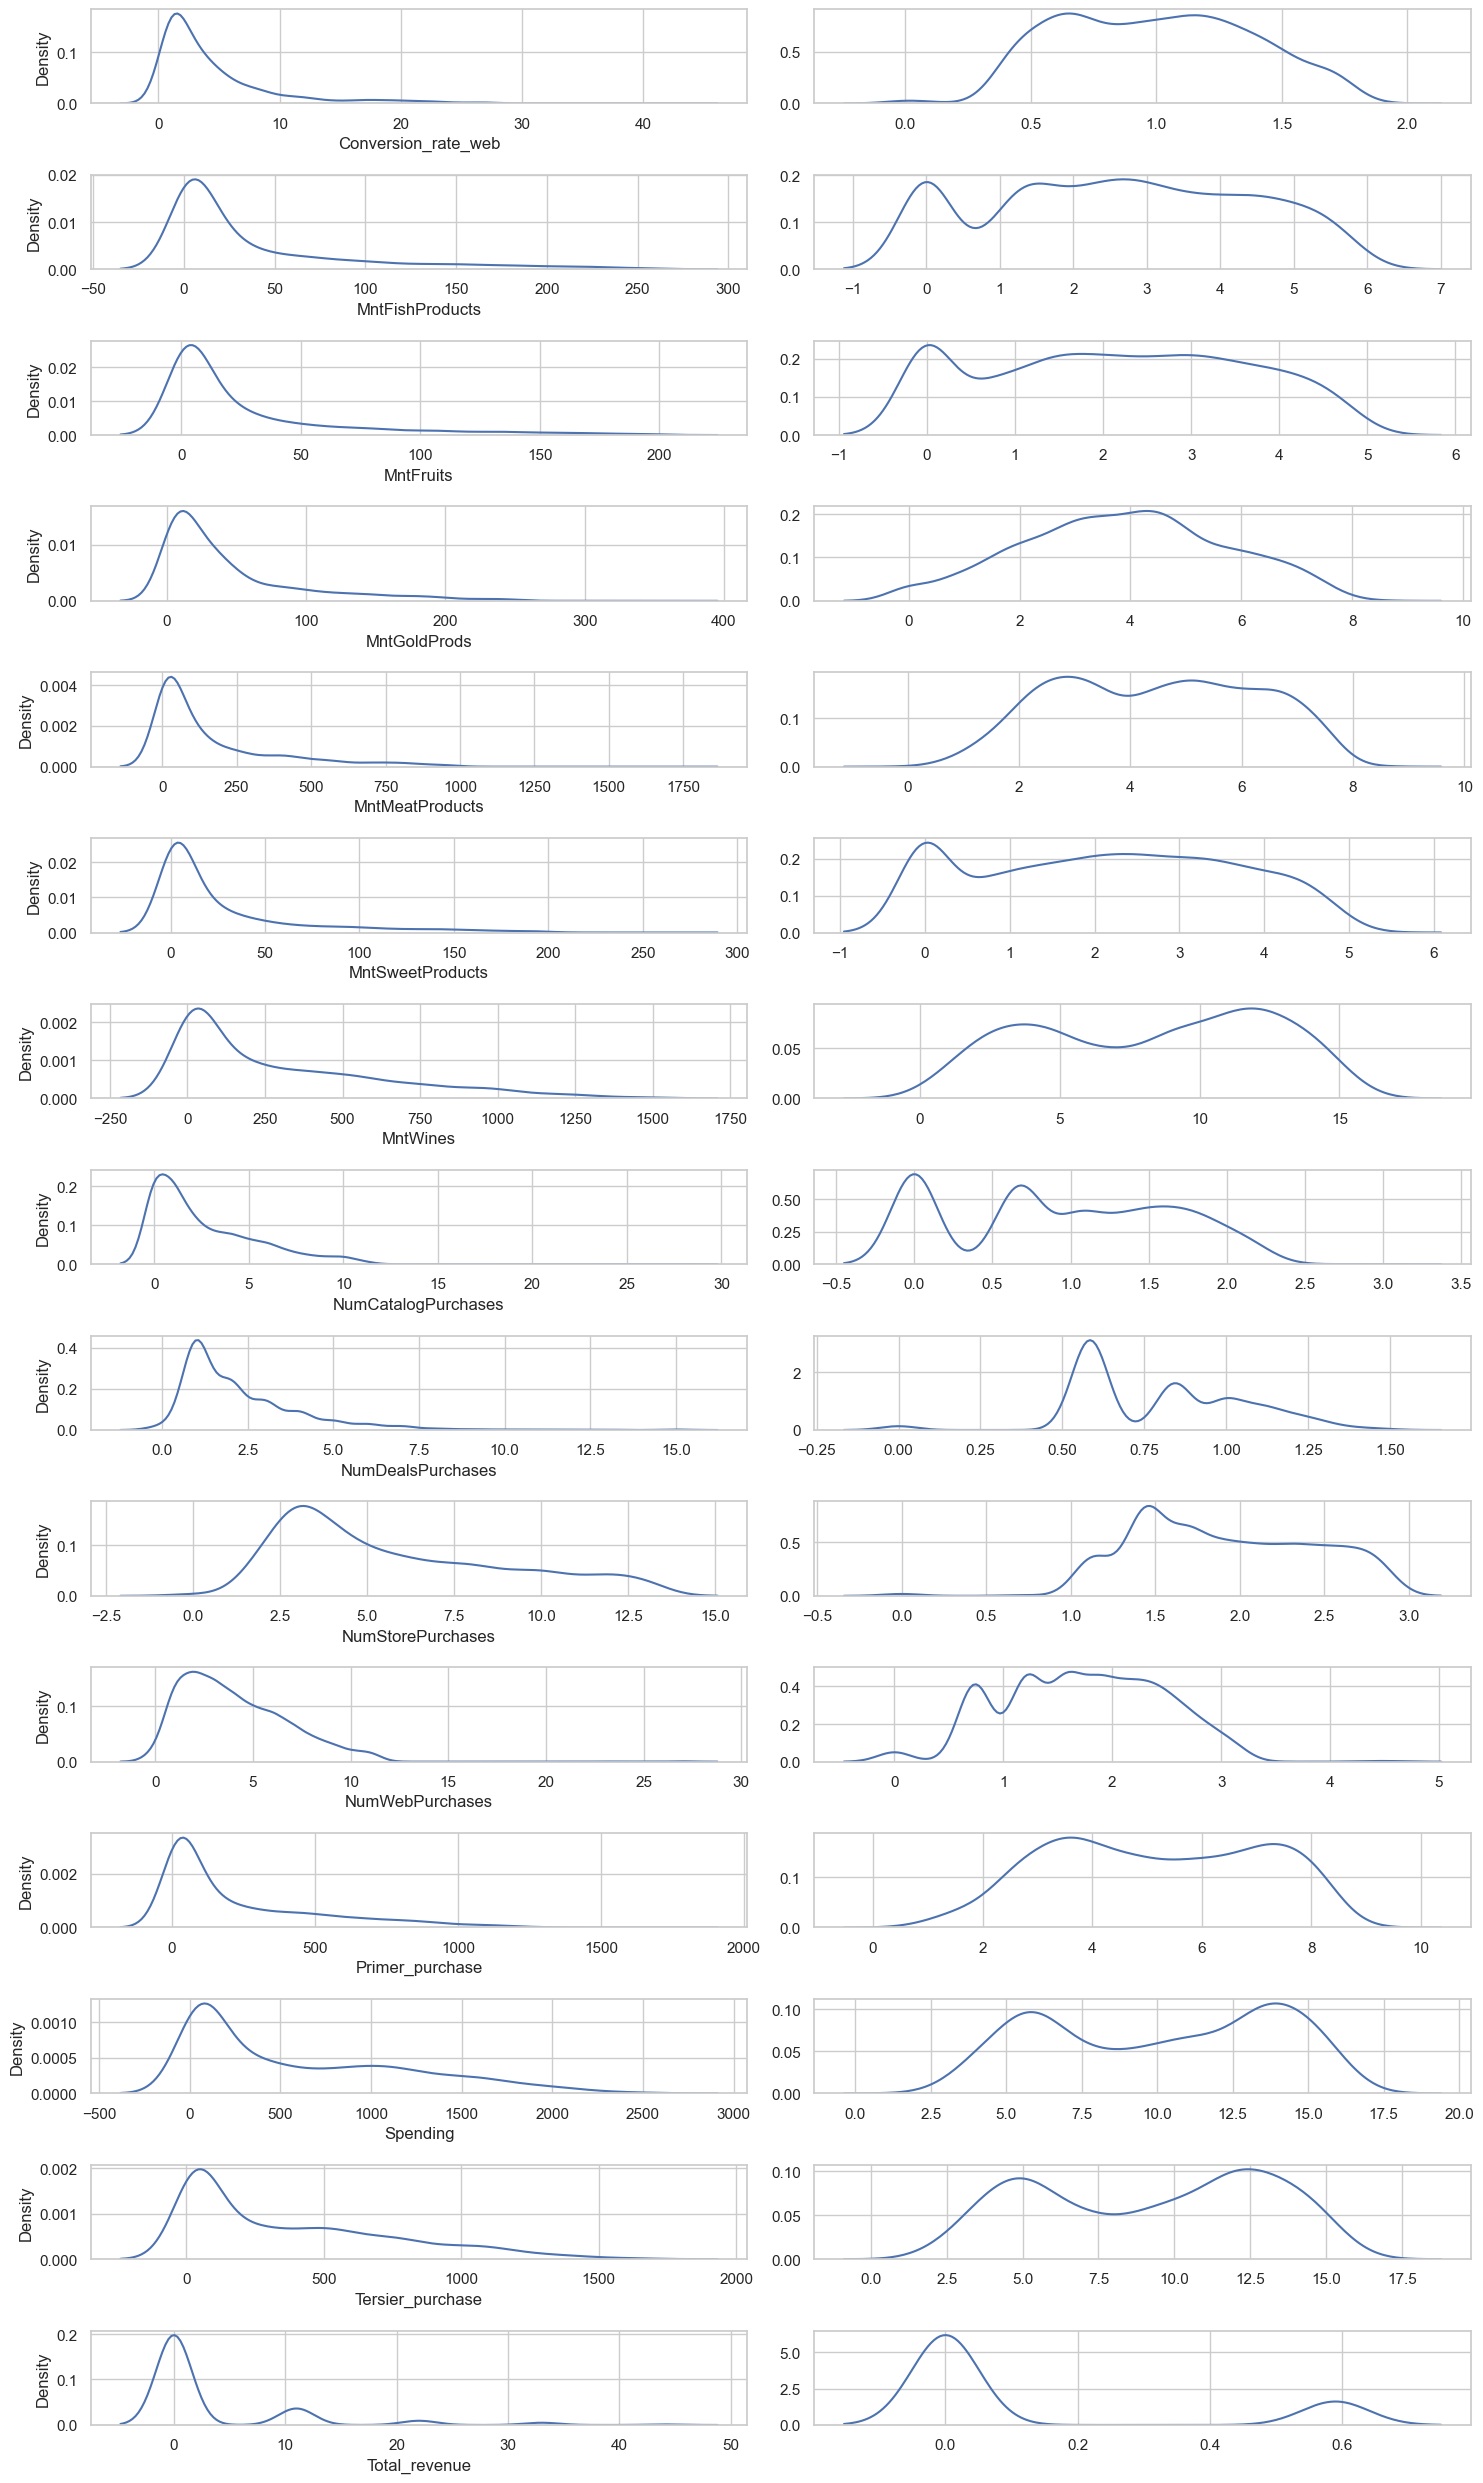

In [75]:
from scipy.stats import yeojohnson

fig, ax = plt.subplots(len(log_cols),2,figsize=(15,25))
for i in range(0,len(log_cols)):
    data, fitted_lambda = yeojohnson(df[log_cols[i]],lmbda=None)
    kde1 = sns.kdeplot(df[log_cols[i]], ax=ax[i][0])
    kde2 = sns.kdeplot(data, ax=ax[i][1])
    kde2.set_ylabel(None)
    plt.tight_layout()

In [76]:
# for i in log_cols:
#     df[i], fitted_lambda = yeojohnson(df[i], lmbda=None)

In [77]:
# df[log_cols].describe()

**with sklearn**

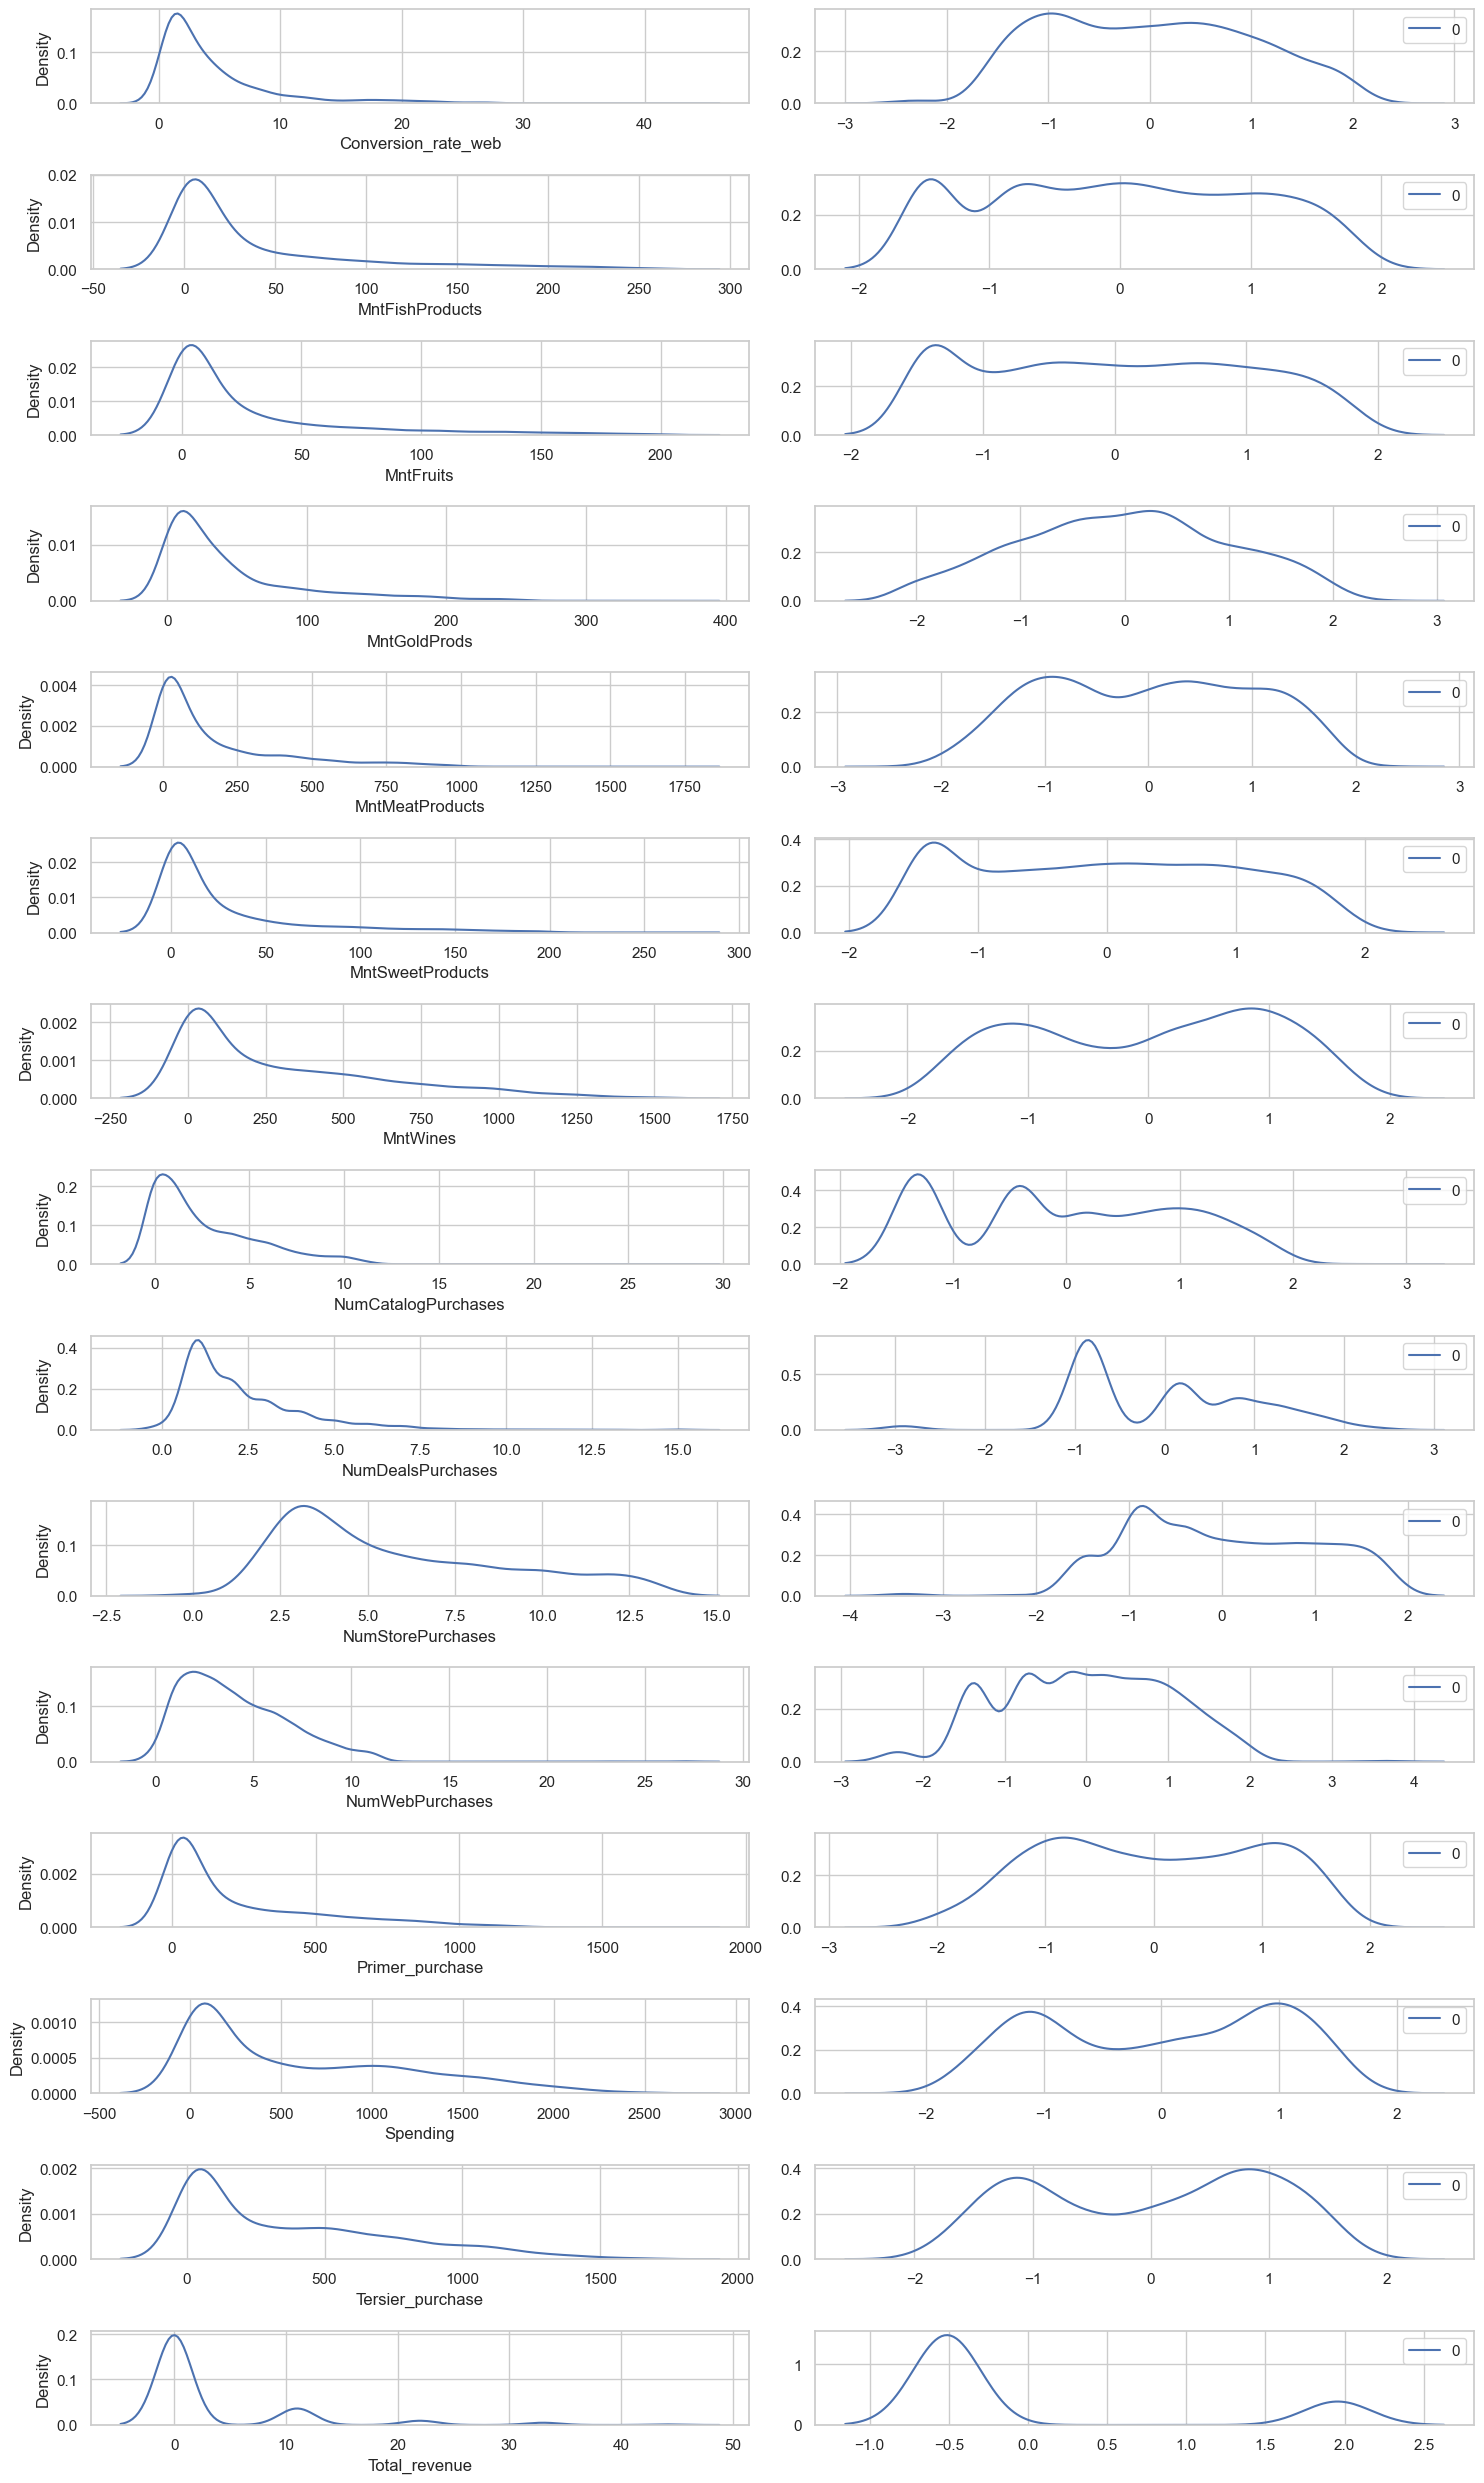

In [78]:
from sklearn.preprocessing import PowerTransformer

fig, ax = plt.subplots(len(log_cols),2,figsize=(15,25))
for i in range(0,len(log_cols)):
    pt = PowerTransformer(method='yeo-johnson')
    data = pt.fit_transform(df[[log_cols[i]]]+1)
    kde1 = sns.kdeplot(df[log_cols[i]], ax=ax[i][0])
    kde2 = sns.kdeplot(data, ax=ax[i][1])
    kde2.set_ylabel(None)
    plt.tight_layout()

In [79]:
pt = PowerTransformer(method='yeo-johnson')
df[log_cols] = pt.fit_transform(df[log_cols])

In [80]:
df[log_cols].describe()

Conversion_rate_web  MntFishProducts     MntFruits  MntGoldProds  \
count         2.229000e+03     2.229000e+03  2.229000e+03  2.229000e+03   
mean          4.462808e-17     1.275088e-17  1.729338e-16  1.498228e-16   
std           1.000224e+00     1.000224e+00  1.000224e+00  1.000224e+00   
min          -2.640210e+00    -1.510070e+00 -1.455815e+00 -2.145415e+00   
25%          -8.261194e-01    -7.039815e-01 -7.185309e-01 -6.946962e-01   
50%          -1.759116e-02    -7.764169e-04 -5.305066e-03 -1.543317e-03   
75%           7.601808e-01     8.358186e-01  8.265393e-01  6.875895e-01   
max           2.353711e+00     1.863179e+00  1.884852e+00  2.496186e+00   

       MntMeatProducts  MntSweetProducts      MntWines  NumCatalogPurchases  \
count     2.229000e+03      2.229000e+03  2.229000e+03         2.229000e+03   
mean     -8.606843e-17     -6.534826e-17 -2.625884e-16         1.227272e-16   
std       1.000224e+00      1.000224e+00  1.000224e+00         1.000224e+00   
min      -2.512932e+00     -1.434995e+00 -1.972704e+00        -1.338574e+00   
25%      -8.421369e-01     -9.740438e-01 -9.152741e-01        -1.338574e+00   
50%       3.357351e-02     -6.298891e-03  1.290282e-01         1.551484e-01   
75%       8.426543e-01      8.306637e-01  8.730903e-01         8.028447e-01   
max       2.237744e+00      2.014221e+00  1.813626e+00         2.825380e+00   

       NumDealsPurchases  NumStorePurchases  NumWebPurchases  Primer_purchase  \
count       2.229000e+03       2.229000e+03     2.229000e+03     2.229000e+03   
mean       -3.347106e-17       6.510918e-16     1.243211e-16     1.020070e-16   
std         1.000224e+00       1.000224e+00     1.000224e+00     1.000224e+00   
min        -3.085464e+00      -3.594915e+00    -2.400662e+00    -2.317152e+00   
25%        -8.336909e-01      -8.795966e-01    -7.191901e-01    -8.380875e-01   
50%         1.602484e-01      -4.391345e-02     1.824874e-01    -3.969495e-02   
75%         7.514105e-01       8.113525e-01     8.230114e-01     8.937132e-01   
max         2.652675e+00       1.766165e+00     3.908805e+00     2.057547e+00   

           Spending  Tersier_purchase  Total_revenue  
count  2.229000e+03      2.229000e+03   2.229000e+03  
mean  -2.542207e-16      2.550176e-16  -4.144036e-17  
std    1.000224e+00      1.000224e+00   1.000224e+00  
min   -2.074651e+00     -1.981849e+00  -5.113224e-01  
25%   -9.825284e-01     -9.816201e-01  -5.113224e-01  
50%    1.319909e-01      1.347370e-01  -5.113224e-01  
75%    9.157665e-01      8.680102e-01  -5.113224e-01  
max    1.759221e+00      1.841420e+00   1.981945e+00

**Normalization**

In [81]:
from sklearn.preprocessing import MinMaxScaler
# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
df[norm_cols] = pd.DataFrame(scaler.fit_transform(df[norm_cols]), columns=df[norm_cols].columns)

In [82]:
df[norm_cols].describe()

Age       Income     Lifetime  Month_joined  NumWebVisitsMonth  \
count  2229.000000  2229.000000  2229.000000   2229.000000        2229.000000   
mean      0.484130     0.445680     0.489752      0.497247           0.266712   
std       0.209061     0.184933     0.306875      0.317413           0.120749   
min       0.000000     0.000000     0.000000      0.000000           0.000000   
25%       0.339286     0.299239     0.342857      0.181818           0.150000   
50%       0.464286     0.442457     0.485714      0.454545           0.300000   
75%       0.660714     0.594122     0.657143      0.818182           0.350000   
max       1.000000     1.000000     1.000000      1.000000           1.000000   

           Recency  Total_Purchases   Year_Birth  Year_joined  
count  2229.000000      2229.000000  2229.000000  2229.000000  
mean      0.496023         0.345791     0.515870     0.513683  
std       0.292389         0.177260     0.209061     0.342483  
min       0.000000         0.000000     0.000000     0.000000  
25%       0.242424         0.186047     0.339286     0.500000  
50%       0.494949         0.348837     0.535714     0.500000  
75%       0.747475         0.488372     0.660714     0.500000  
max       1.000000         1.000000     1.000000     1.000000

**Standard Scaler**

In [83]:
# from sklearn.preprocessing import StandardScaler

# # create a scaler object
# std_scaler = StandardScaler()
# std_scaler
# # fit and transform the data
# df[norm_cols] = pd.DataFrame(std_scaler.fit_transform(df[norm_cols]), columns=df[norm_cols].columns)

In [84]:
# df[norm_cols].describe()

## **📌 Feature Encoding (Categoric)**


In [85]:
#cek unique value
for x in cat_str: 
    unq = list(df[x].unique())
    sorted(unq)
    
    print (f'===== {x} =====')
    if len(unq) >= 10:
        unq = list(unq[:10])+['.....']
        print (f'{unq}')
    else:
        print (f'{unq}')
    print()

===== Education =====
['Graduation', 'PhD', 'Master', 'Basic']

===== Marital_Status =====
['Single', 'Married', 'Divorced', 'Widow', 'Others']

===== Age_group =====
['Senior Adult', 'Young Adult', 'Adult']

===== Income_sgmt =====
['Medium', 'High', 'Low']

===== Recency_sgmt =====
['<= 2 bulan', '<= sebulan', '> 2 bulan', '<= 14 hari', '<= seminggu']



In [86]:
cat_str

['Education', 'Marital_Status', 'Age_group', 'Income_sgmt', 'Recency_sgmt']

**Label Encoding**

1. Menggunakan `LabelEncoder`

In [87]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# le.fit(df['Education'])
# df['Education'] = le.transform(df['Education'])
# print(le.classes_)

2. Menggunakan Metode `Mapping`

In [88]:
map_edu = {
    'Basic' : 0,
    'Graduation' : 1,
    'Master' : 2,
    'PhD' : 3
}

df['Education'] = df['Education'].map(map_edu)
df['Education'].unique()

array([1, 3, 2, 0], dtype=int64)

In [89]:
map_age = {
    'Young Adult' : 0,
    'Adult' : 1,
    'Senior Adult' : 2
}

df['Age_group'] = df['Age_group'].map(map_age)
df['Age_group'].unique()

array([2, 0, 1], dtype=int64)

In [90]:
map_income = {
    'Low' : 0,
    'Medium' : 1,
    'High' : 2
}

df['Income_sgmt'] = df['Income_sgmt'].map(map_income)
df['Income_sgmt'].unique()

array([1, 2, 0], dtype=int64)

In [91]:
map_recency = {
    '<= seminggu' : 0,
    '<= 14 hari' : 1,
    '<= sebulan' : 2,
    '<= 2 bulan' : 3,
    '> 2 bulan' : 4
}

df['Recency_sgmt'] = df['Recency_sgmt'].map(map_recency)
df['Recency_sgmt'].unique()

array([3, 2, 4, 1, 0], dtype=int64)

In [92]:
df.head()

ID  Year_Birth  Education Marital_Status    Income  Kidhome  Teenhome  \
0  5524    0.303571          1         Single  0.503625        0         0   
1  2174    0.250000          1         Single  0.398325        1         1   
2  4141    0.446429          1        Married  0.623933        0         0   
3  6182    0.785714          1        Married  0.222456        1         0   
4  5324    0.732143          3        Married  0.505009        1         0   

  Dt_Customer   Recency  MntWines  MntFruits  MntMeatProducts  \
0  2012-09-04  0.585859  1.055845   1.408285         1.427722   
1  2014-03-08  0.383838 -1.216525  -0.987797        -1.382146   
2  2013-08-21  0.262626  0.742494   1.061724         0.446521   
3  2014-02-10  0.262626 -1.216525  -0.383956        -0.711207   
4  2014-01-19  0.949495  0.118112   0.984072         0.398487   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0         1.603071          1.386289      1.088321           0.751411   
1        -0.873108         -0.974044     -0.945343           0.160248   
2         1.327803          0.548371      0.444525          -0.833691   
3        -0.101458         -0.522614     -1.050524           0.160248   
4         0.785181          0.695488     -0.348288           1.451079   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0         1.327200             1.748094          -0.422083               0.35   
1        -1.378523            -0.379702          -1.460893               0.25   
2         1.327200             0.155148           1.242021               0.20   
3        -0.719190            -1.338574          -0.422083               0.30   
4         0.524777             0.523425           0.278912               0.25   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Complain  Z_CostContact  Z_Revenue       Age  Age_group  Has_child  \
0         0              3         11  0.696429          2          0   
1         0              3         11  0.750000          2          1   
2         0              3         11  0.553571          2          0   
3         0              3         11  0.214286          0          1   
4         0              3         11  0.267857          1          1   

   Dependents  Lifetime  Spending  Primer_purchase  Tersier_purchase  \
0           0  0.914286  1.317124         1.483547          1.114089   
1           2  0.057143 -1.446065        -1.412572         -1.369934   
2           0  0.542857  0.660806         0.742559          0.668615   
3           1  0.028571 -1.121509        -0.653390         -1.346552   
4           1  0.000000  0.177603         0.516769          0.031062   

   Total_Purchases  Total_Cmp  Ever_Accept  Total_revenue  Income_sgmt  \
0         0.581395          0            0      -0.511322            1   
1         0.139535          0            0      -0.511322            1   
2         0.488372          0            0      -0.511322            2   
3         0.186047          0            0      -0.511322            0   
4         0.441860          0            0      -0.511322            1   

   Conversion_rate_web  Year_joined  Month_joined  Recency_sgmt  Response  
0             0.323214          0.0      0.727273             3         1  
1            -0.868487          1.0      0.181818             3         0  
2             0.731399          0.5      0.636364             2         0  
3            -0.761043          1.0      0.090909             2         0  
4             0.390851          1.0      0.000000             4        

**One Hot Encoding**

1. Menggunakan `get_dummies`

In [93]:
# # Not Auto Drop Columns
# ohe = pd.get_dummies(df["Marital_Status"])
# df.drop("Marital_Status", axis=1, inplace=True)
# df = df.join(ohe)

# # cara 2 : Auto drop Column
# # df = pd.get_dummies(data=df, columns=["Marital_Status"])

# df.head()

2. Menggunakan `OneHotEncoder`

In [94]:
oh.fit_transform(df[["Marital_Status"]])

<2229x5 sparse matrix of type '<class 'numpy.float64'>'
	with 2229 stored elements in Compressed Sparse Row format>

In [95]:
from sklearn.preprocessing import OneHotEncoder

oh = OneHotEncoder()
df_ohe = pd.DataFrame(
    oh.fit_transform(df[["Marital_Status"]]).toarray(),
    columns=list(oh.categories_[0])
)
print(oh.categories_[0])

df.drop("Marital_Status", axis=1, inplace=True)

df = pd.concat([df, df_ohe], axis=1)

['Divorced' 'Married' 'Others' 'Single' 'Widow']


## **📌 Feature Selection**

### **1. Drop Unnecessary Feature**

- Drop kolom `ID` karena memiliki banyak kategori dan tidak berguna untuk pemodelan
- Drop kolom `Year_Birth` sudah dilakukan Feature extraction untuk mengambil data Umur/Age pada range tahun saat ini 2014 (sesuai pada data)
- Drop kolom `Dt_Customer` karena tidak terlalu mempengaruhi model prediksi
- Drop kolom `Z_CostContact` (3) dan `Z_Revenue` (11) karena  hanya memiliki satu nilai, tidak memberikan informasi yang signifikan terhadap model prediksi

In [96]:
df.drop(['ID', 'Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], inplace=True, axis=1)

### **2. Univariate Selection**

In [97]:
# define X and y
X = df.drop(['Response'], axis=1) #features
y = df['Response'] #target

- #### **ANOVA F-value**

`ANOVA F-value` estimates the degree of linearity between the input feature (i.e., independent features) and the output feature (i.e., dependent feature). A high F-value indicates a high degree of linearity and a low F-value indicates a low degree of linearity.

Scikit-learn provides two functions to calculate F-value:

1. `sklearn.feature_selection.f_regression` for regression problems
2. `sklearn.feature_selection.f_classif` for classification problems

Disadvantage:

ANOVA F-value only captures the linear relationships between input and output feature.

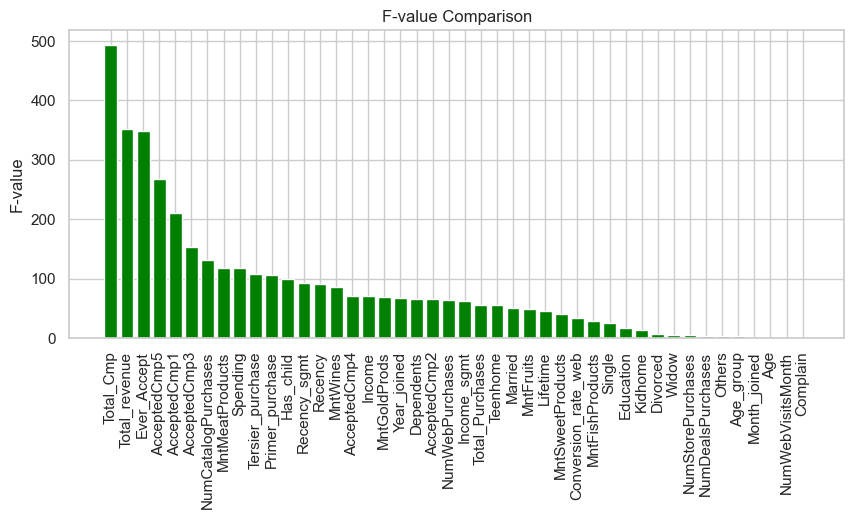

In [98]:
from sklearn.feature_selection import f_classif
feature_names = X.columns

# create f_classif object
f_value = f_classif(X, y)

# print the name and F-value of each feature
# for feature in zip(feature_names, f_value[0]):
#     print(feature)

fs = pd.DataFrame({
    "feature_names":feature_names,
    "f_value":f_value[0]
}).sort_values("f_value", ascending=False)
    
# Create a bar chart
plt.figure(figsize=(10,4))
plt.bar(data=fs, x="feature_names", height="f_value", color="green")
plt.xticks(rotation="vertical")
plt.ylabel("F-value")
plt.title("F-value Comparison")
plt.show()

In [99]:
feature_importance = []
for i in fs["feature_names"].values[:6]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance  

['Total_Cmp',
 'Total_revenue',
 'Ever_Accept',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp3']

- #### **Variance Threshold**

Variance Threshold removes the features whose variance is below the pre-defined `threshold` value. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

Advantage:

This can be used for unsupervised learning.

Disadvantage:

Variance Threshold only considers the relationship among the features but not the relationship between input features with the output feature.

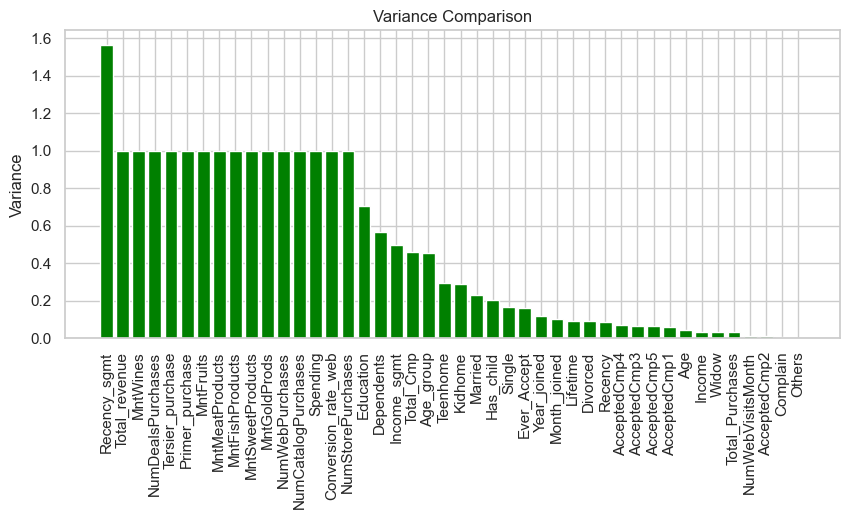

In [100]:
# import VarianceThreshold
from sklearn.feature_selection import VarianceThreshold
# create VarianceThreshold object
selector = VarianceThreshold(threshold=0.0)
# train and transform
selector.fit_transform(X)
# print the name and variance of each feature
# for feature in zip(feature_names, selector.variances_):
#     print(feature)

fs = pd.DataFrame({
    "feature_names":feature_names,
    "variances":selector.variances_
}).sort_values("variances", ascending=False)
    
# Create a bar chart
plt.figure(figsize=(10,4))
plt.bar(data=fs, x="feature_names", height="variances", color="green")
plt.xticks(rotation="vertical")
plt.ylabel("Variance")
plt.title("Variance Comparison")
plt.show()

In [101]:
for i in fs["feature_names"].values[:6]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance  

['Total_Cmp',
 'Total_revenue',
 'Ever_Accept',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp3',
 'Recency_sgmt',
 'MntWines',
 'NumDealsPurchases',
 'Tersier_purchase',
 'Primer_purchase']

- #### **Mutual information**

Mutual information (MI) measures the dependence of one variable to another by quantifying the amount of information obtained about one feature, through the other feature. MI is symmetric and non-negative and is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

Scikit-learn provides two functions to calculate F-value:

- `sklearn.feature_selection.mutual_info_regression` for regression problems
- `sklearn.feature_selection.mutual_info_classif` for classification problems

Advantage:

MI can capture non-linear relationships between input and output feature.

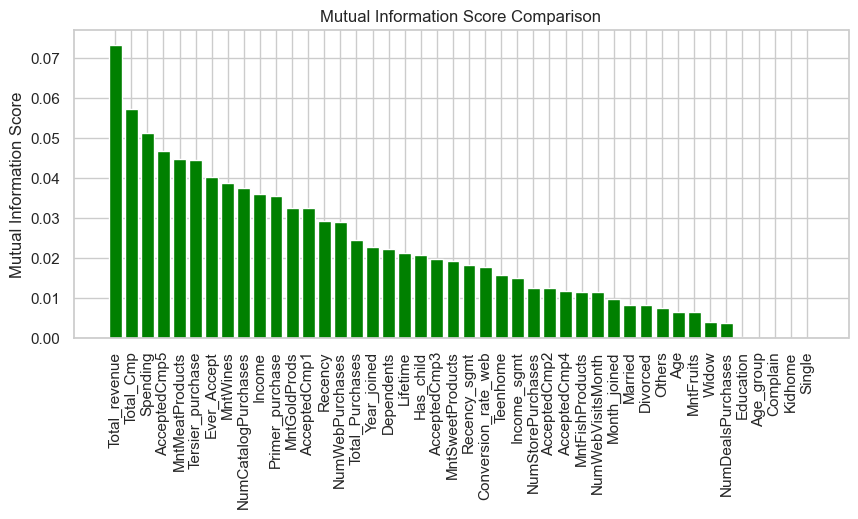

In [102]:
# import mutual_info_classif
from sklearn.feature_selection import mutual_info_classif
# create mutual_info_classif object
MI_score = mutual_info_classif(X, y, random_state=0)
# Print the name and mutual information score of each feature
# for feature in zip(feature_names, MI_score):
#     print(feature)

fs = pd.DataFrame({
    "feature_names":feature_names,
    "MI_score":MI_score
}).sort_values("MI_score", ascending=False)
    
# Create a bar chart
plt.figure(figsize=(10,4))
plt.bar(data=fs, x="feature_names", height="MI_score", color="green")
plt.xticks(rotation="vertical")
plt.ylabel("Mutual Information Score")
plt.title("Mutual Information Score Comparison")
plt.show()

In [103]:
for i in fs["feature_names"].values[:6]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance  

['Total_Cmp',
 'Total_revenue',
 'Ever_Accept',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp3',
 'Recency_sgmt',
 'MntWines',
 'NumDealsPurchases',
 'Tersier_purchase',
 'Primer_purchase',
 'Spending',
 'MntMeatProducts']

- #### **Scikit-learn’s SelectKBest**

SelectKBest selects the features using a function (in this case ANOVA F-value) and then "removes all but the k highest scoring features".

Statistical tests can be used to select those features that have the strongest relationship with the output variable. `Mutual information, ANOVA F-test and chi square` are some of the most popular methods of univariate feature selection.

---

ERROR :

`Input X must be non-negative`

The error message you got that:

Tells that: Pearson's chi-square test (goodness of fit) does not apply to negative values. It occurred because the chi-square test assumes frequencies distribution and a frequency can't be a negative number. But, `sklearn.feature_selection.chi2` asserts the input as non-negative.

If data transformation is for some reason not possible (e.g. a negative value is an important factor), then you should pick another statistic to score your features:

```
sklearn.feature_selection.f_classif computes ANOVA f-value
sklearn.feature_selection.mutual_info_classif
```

In [104]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, f_classif, mutual_info_classif

# apply SelectKBest class to extract top 10 best features

# computes chi2
# semuanya harus positif
# bestfeatures = SelectKBest(score_func=chi2, k=10)

# computes ANOVA f-value
bestfeatures = SelectKBest(score_func=f_classif, k=10)

fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.sort_values('Score', ascending=False, inplace=True)
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                  Specs       Score
31            Total_Cmp  493.396805
33        Total_revenue  352.138906
32          Ever_Accept  349.500943
18         AcceptedCmp5  268.310173
19         AcceptedCmp1  210.104804
16         AcceptedCmp3  153.377160
13  NumCatalogPurchases  131.361056
7       MntMeatProducts  118.989166
27             Spending  118.126753
29     Tersier_purchase  107.467404


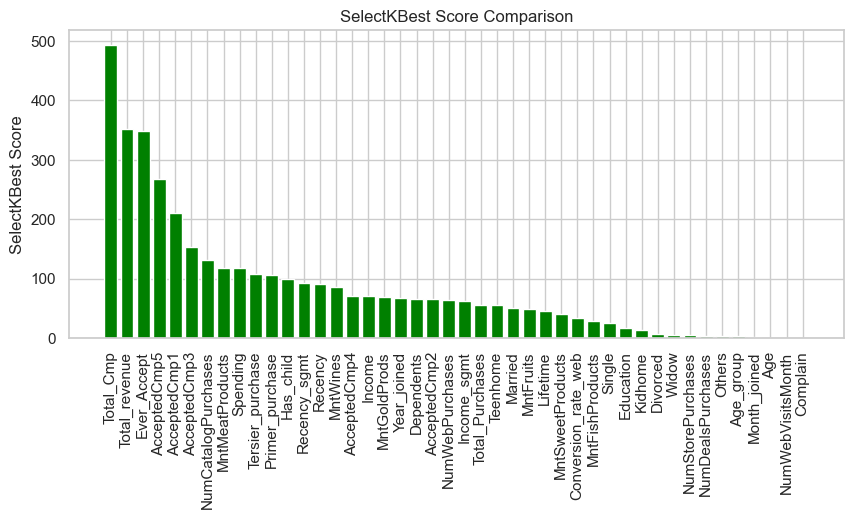

In [105]:
# Create a bar chart
plt.figure(figsize=(10,4))
plt.bar(data=featureScores, x="Specs", height="Score", color="green")
plt.xticks(rotation="vertical")
plt.ylabel("SelectKBest Score")
plt.title("SelectKBest Score Comparison")
plt.show()

In [106]:
for i in featureScores["Specs"].values[:6]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance  

['Total_Cmp',
 'Total_revenue',
 'Ever_Accept',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp3',
 'Recency_sgmt',
 'MntWines',
 'NumDealsPurchases',
 'Tersier_purchase',
 'Primer_purchase',
 'Spending',
 'MntMeatProducts']

### **3. Feature Importance**

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

[0.02432455 0.02696157 0.00946846 0.01409897 0.0474253  0.02681845
 0.02438993 0.02815341 0.02302457 0.02490554 0.02433845 0.02052797
 0.02247693 0.02918571 0.02851901 0.02601173 0.02217015 0.00950625
 0.0286434  0.01548291 0.00584104 0.00133159 0.02483946 0.01726453
 0.01299805 0.01514792 0.03225563 0.02832422 0.02496887 0.02490743
 0.02256167 0.03246132 0.03766944 0.04972411 0.0130915  0.0240609
 0.03102934 0.02312593 0.04203277 0.01038079 0.02838499 0.00051823
 0.01480586 0.00584115]


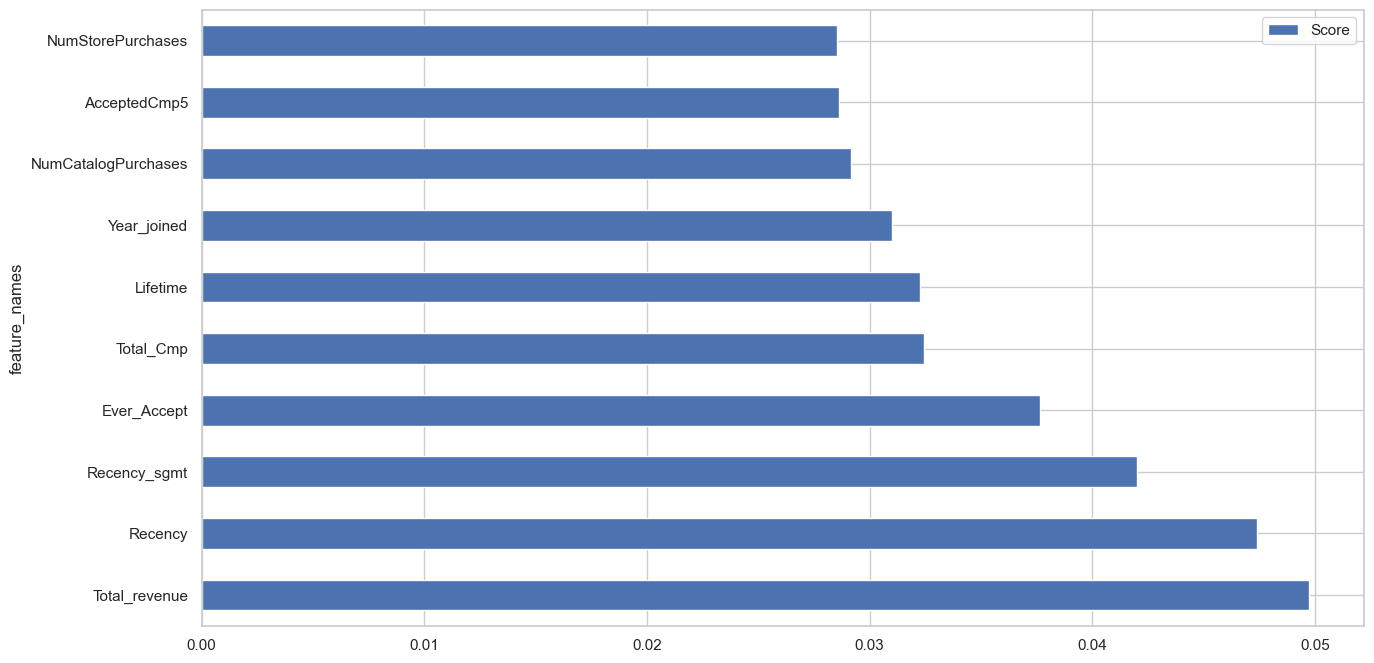

In [107]:
from sklearn.ensemble import ExtraTreesClassifier

# define X and y
X = df.drop(['Response'], axis=1) #features
y = df['Response'] #target

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances = pd.DataFrame(feat_importances).reset_index(names="feature_names") \
    .rename(columns={0:"Score"}) \
    .sort_values("Score", ascending=False).reset_index(drop=True)
feat_importances.nlargest(10, "Score").plot(x="feature_names", y="Score", kind='barh')
plt.show()

In [108]:
for i in feat_importances["feature_names"].values[:6]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance  

['Total_Cmp',
 'Total_revenue',
 'Ever_Accept',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp3',
 'Recency_sgmt',
 'MntWines',
 'NumDealsPurchases',
 'Tersier_purchase',
 'Primer_purchase',
 'Spending',
 'MntMeatProducts',
 'Recency',
 'Lifetime']

### **4. Correlation Matrix with Heatmap**

- Correlation states how the features are related to each other or the target variable.

- Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

- Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

- Cek Feature Redundan pada korelasi Antar Feature, Drop salah satunya, yang rendah korelsinya dengan Response (target)

<Axes: >

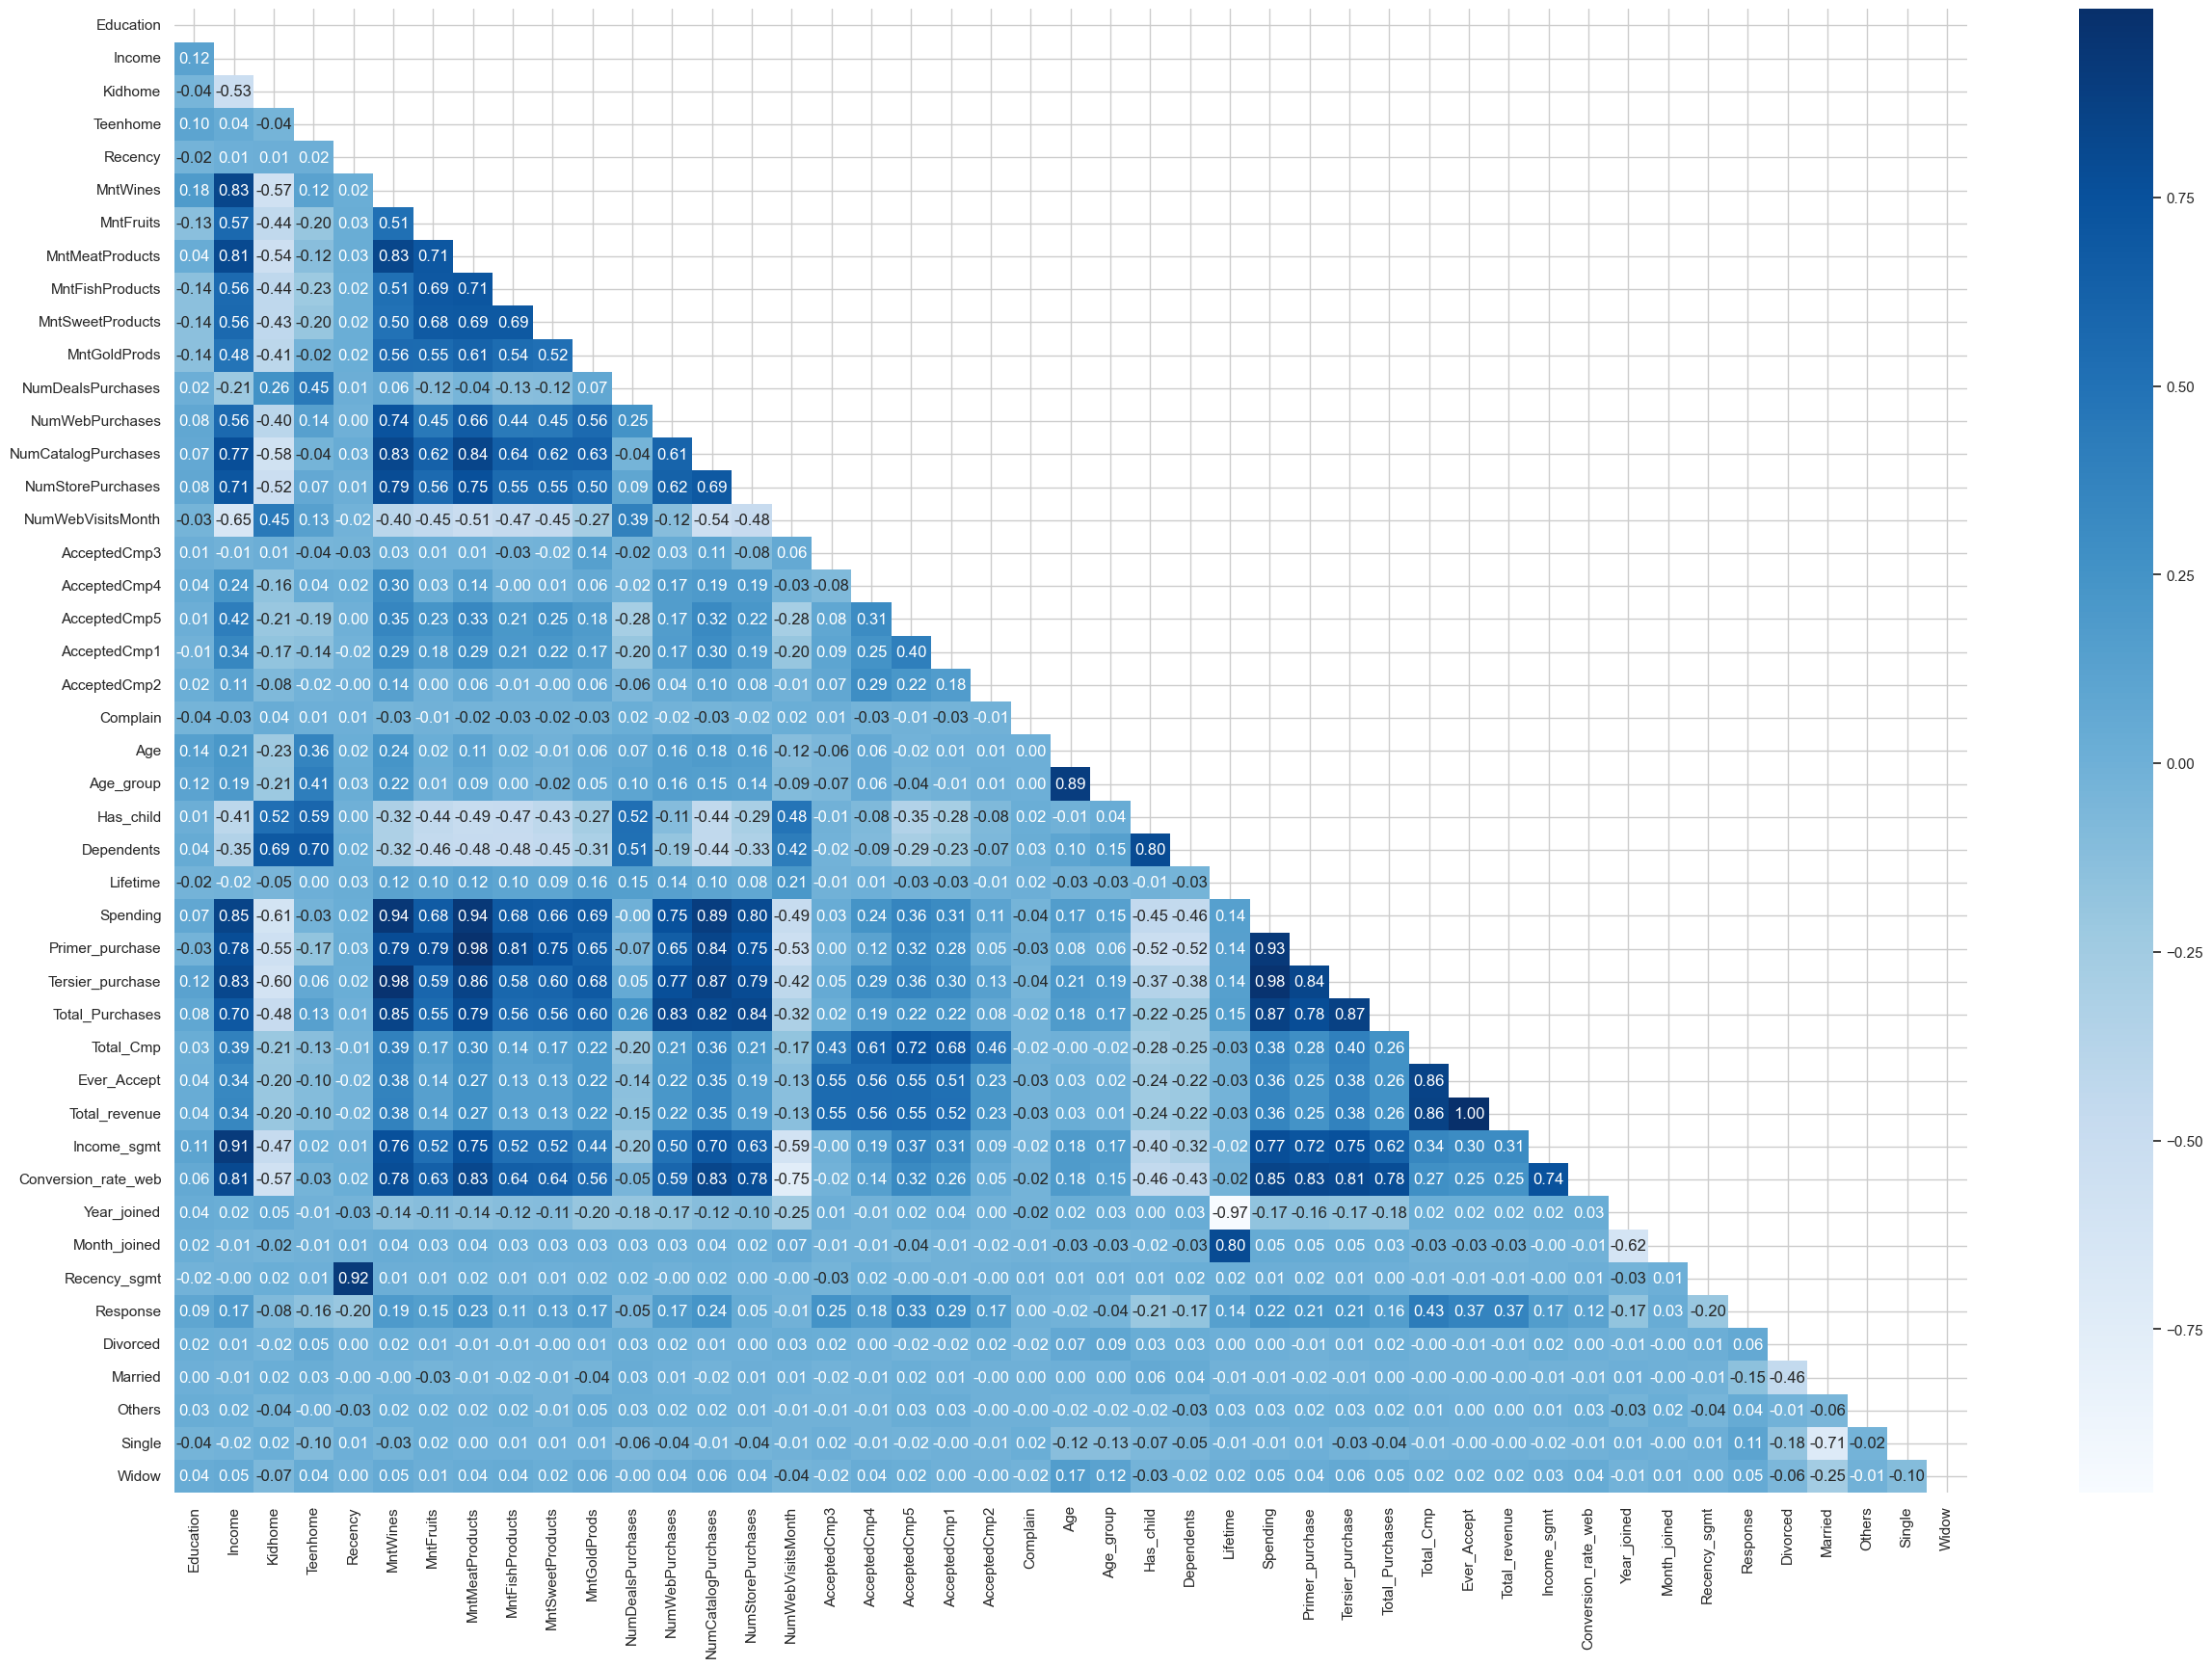

In [109]:
plt.figure(figsize=(30,20))
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=np.bool_)) 
sns.heatmap(corr, cmap='Blues', annot=True, fmt='.2f', mask=mask)

**Checking Correlation with Target (Response)**

In [110]:
corr = df.corrwith(df["Response"], numeric_only=True)
corr = corr.reset_index(name='corr value')
corr["Corr Type"] = corr["corr value"].apply(lambda x : "Positif" if x >= 0 else "Negatif")
corr["corr value"] = corr["corr value"].apply(lambda x : abs(x))
corr = corr.sort_values('corr value', ascending=False, ignore_index=True)
corr

index  corr value Corr Type
0              Response    1.000000   Positif
1             Total_Cmp    0.425875   Positif
2         Total_revenue    0.369504   Positif
3           Ever_Accept    0.368306   Positif
4          AcceptedCmp5    0.327911   Positif
5          AcceptedCmp1    0.293617   Positif
6          AcceptedCmp3    0.253838   Positif
7   NumCatalogPurchases    0.236009   Positif
8       MntMeatProducts    0.225212   Positif
9              Spending    0.224435   Positif
10     Tersier_purchase    0.214558   Positif
11      Primer_purchase    0.214164   Positif
12            Has_child    0.206691   Negatif
13         Recency_sgmt    0.201021   Negatif
14              Recency    0.199078   Negatif
15             MntWines    0.193044   Positif
16         AcceptedCmp4    0.176544   Positif
17               Income    0.174989   Positif
18         MntGoldProds    0.173829   Positif
19          Year_joined    0.170958   Negatif
20           Dependents    0.170480   Negatif
21         AcceptedCmp2    0.169131   Positif
22      NumWebPurchases    0.166732   Positif
23          Income_sgmt    0.165015   Positif
24      Total_Purchases    0.156328   Positif
25             Teenhome    0.155726   Negatif
26              Married    0.150114   Negatif
27            MntFruits    0.147539   Positif
28             Lifetime    0.141379   Positif
29     MntSweetProducts    0.133577   Positif
30  Conversion_rate_web    0.123598   Positif
31      MntFishProducts    0.112784   Positif
32               Single    0.106179   Positif
33            Education    0.086222   Positif
34              Kidhome    0.080514   Negatif
35             Divorced    0.055931   Positif
36                Widow    0.051360   Positif
37    NumStorePurchases    0.046782   Positif
38    NumDealsPurchases    0.045038   Negatif
39               Others    0.041597   Positif
40            Age_group    0.037633   Negatif
41         Month_joined    0.032449   Positif
42                  Age    0.018918   Negatif
43    NumWebVisitsMonth    0.007097   Negatif
44             Complain    0.000042   Positif

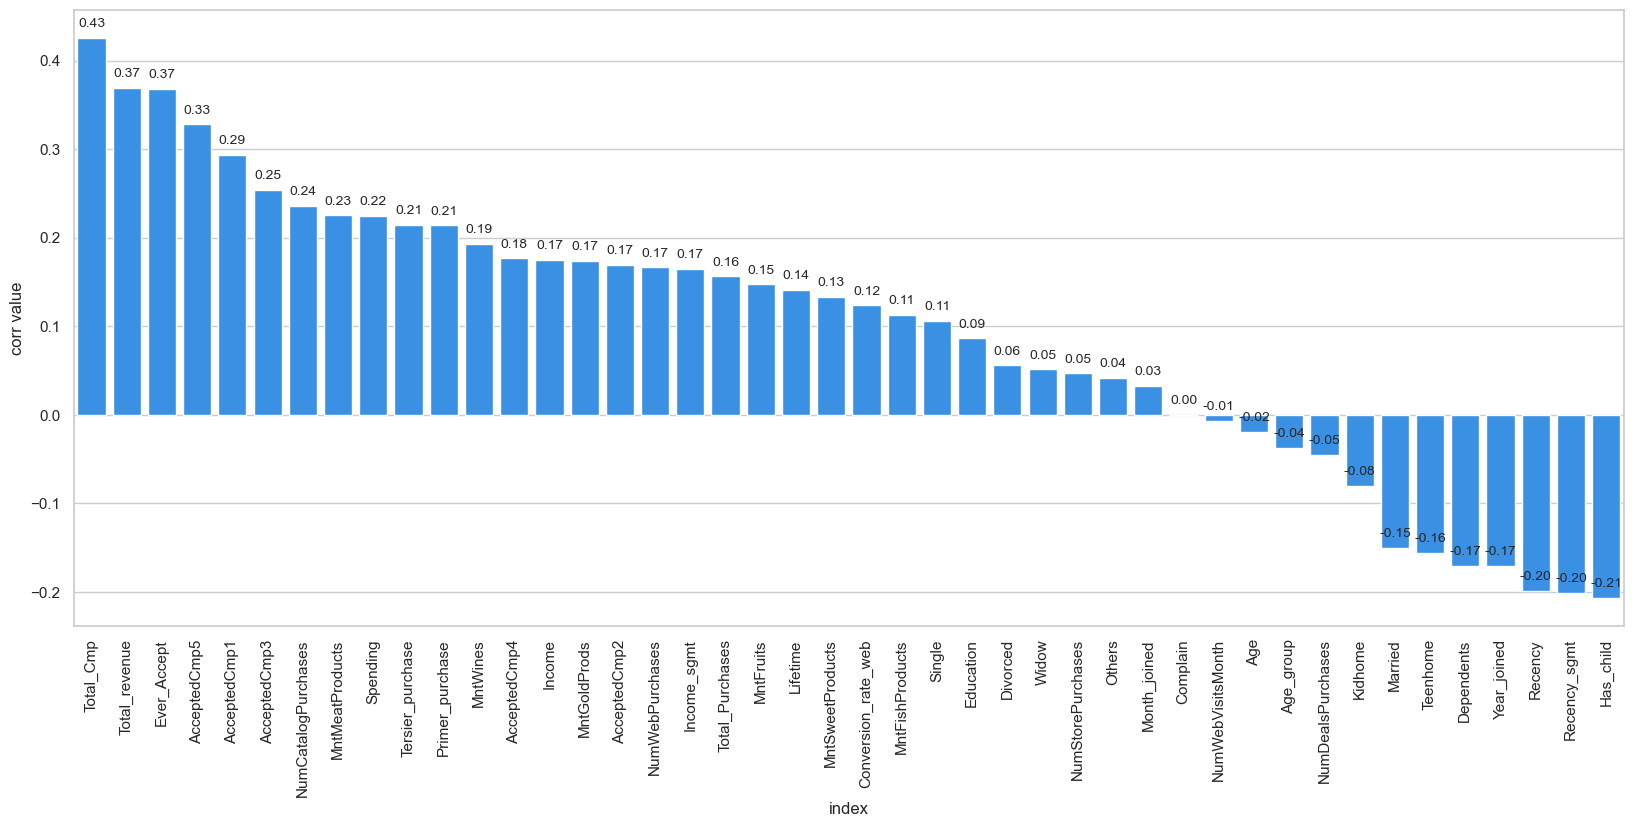

In [111]:
corr = df.corrwith(df["Response"], numeric_only=True)
corr = corr.reset_index(name='corr value')
corr = corr.sort_values('corr value', ascending=False)[1:]

plt.figure(figsize=(20, 8))
ax = sns.barplot(x='index', y="corr value", data=corr, order=corr["index"], color='dodgerblue')
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():0.2f}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', 
        va = 'center', 
        xytext = (0, 10), 
        fontsize=10,
        textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()

In [112]:
target = "Response"
high_corr_cols = [i for i in list(corr[corr["corr value"] > 0.15]["index"].values) if i != target]
print(high_corr_cols)

['Total_Cmp', 'Total_revenue', 'Ever_Accept', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp3', 'NumCatalogPurchases', 'MntMeatProducts', 'Spending', 'Tersier_purchase', 'Primer_purchase', 'MntWines', 'AcceptedCmp4', 'Income', 'MntGoldProds', 'AcceptedCmp2', 'NumWebPurchases', 'Income_sgmt', 'Total_Purchases']


In [113]:
for i in corr["index"].values[:6]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance  

['Total_Cmp',
 'Total_revenue',
 'Ever_Accept',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp3',
 'Recency_sgmt',
 'MntWines',
 'NumDealsPurchases',
 'Tersier_purchase',
 'Primer_purchase',
 'Spending',
 'MntMeatProducts',
 'Recency',
 'Lifetime']

- **Korelasi ke Target (Response)**
    - `Top 10 Yang berkolerasi tinggi ke target` sebagai berikut, Kemungkinan besar top ini bisa menjadi feature yang paling relevan dan harus dipertahankan:
        - `AcceptedCmp5` - 0.32 - Positif
        - `AcceptedCmp1` - 0.29 - Positif
        - `AcceptedCmp3` - 0.25 - Positif
        - `MntWines` - 0.24 - Positif
        - `MntMeatProducts` - 0.23 - Positif
        - `NumCatalogPurchases` - 0.22 - Positif
        - `Recency` - 0.19 - Negatif
        - `AcceptedCmp4` - 0.17 - Positif
        - `AcceptedCmp2` - 0.16 - Positif
        - `Teenhome` - 0.15 - Negatif

    - Korelasi Kolom **Response** dengan kolom lainnya cenderung rendah. Dari seluruh korelasi antara feature-target berada di `range 0.00 sampai 0.33`. Oleh karena itu, kami memutuskan untuk membuat nilai `threshold di angka 0.15`. Feature-feature di atas yang kemungkinan kami pertahankan adalah feature yang memiliki nilai korelasi `>0.15`.

In [114]:
df.head()

Education    Income  Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0          1  0.503625        0         0  0.585859  1.055845   1.408285   
1          1  0.398325        1         1  0.383838 -1.216525  -0.987797   
2          1  0.623933        0         0  0.262626  0.742494   1.061724   
3          1  0.222456        1         0  0.262626 -1.216525  -0.383956   
4          3  0.505009        1         0  0.949495  0.118112   0.984072   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0         1.427722         1.603071          1.386289      1.088321   
1        -1.382146        -0.873108         -0.974044     -0.945343   
2         0.446521         1.327803          0.548371      0.444525   
3        -0.711207        -0.101458         -0.522614     -1.050524   
4         0.398487         0.785181          0.695488     -0.348288   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0           0.751411         1.327200             1.748094          -0.422083   
1           0.160248        -1.378523            -0.379702          -1.460893   
2          -0.833691         1.327200             0.155148           1.242021   
3           0.160248        -0.719190            -1.338574          -0.422083   
4           1.451079         0.524777             0.523425           0.278912   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0               0.35             0             0             0             0   
1               0.25             0             0             0             0   
2               0.20             0             0             0             0   
3               0.30             0             0             0             0   
4               0.25             0             0             0             0   

   AcceptedCmp2  Complain       Age  Age_group  Has_child  Dependents  \
0             0         0  0.696429          2          0           0   
1             0         0  0.750000          2          1           2   
2             0         0  0.553571          2          0           0   
3             0         0  0.214286          0          1           1   
4             0         0  0.267857          1          1           1   

   Lifetime  Spending  Primer_purchase  Tersier_purchase  Total_Purchases  \
0  0.914286  1.317124         1.483547          1.114089         0.581395   
1  0.057143 -1.446065        -1.412572         -1.369934         0.139535   
2  0.542857  0.660806         0.742559          0.668615         0.488372   
3  0.028571 -1.121509        -0.653390         -1.346552         0.186047   
4  0.000000  0.177603         0.516769          0.031062         0.441860   

   Total_Cmp  Ever_Accept  Total_revenue  Income_sgmt  Conversion_rate_web  \
0          0            0      -0.511322            1             0.323214   
1          0            0      -0.511322            1            -0.868487   
2          0            0      -0.511322            2             0.731399   
3          0            0      -0.511322            0            -0.761043   
4          0            0      -0.511322            1             0.390851   

   Year_joined  Month_joined  Recency_sgmt  Response  Divorced  Married  \
0          0.0      0.727273             3         1       0.0      0.0   
1          1.0      0.181818             3         0       0.0      0.0   
2          0.5      0.636364             2         0       0.0      1.0   
3          1.0      0.090909             2         0       0.0      1.0   
4          1.0      0.000000             4         0       0.0      1.0   

   Others  Single  Widow  
0     0.0     1.0    0.0  
1     0.0     1.0    0.0  
2     0.0     0.0    0.0  
3     0.0     0.0    0.0  
4     0.0     0.0    0.0

# **====== STAGE 3 ======**
`Stage 3 (ML Modelling & Evaluation)`

## **Data Splitting**

I will split the data into training set and testing set with proportion of 70:30.

In [115]:
# define X and y
X = df.drop(['Response'], axis=1)[feature_importance] #features
y = df['Response'] #target

In [116]:
from sklearn.model_selection import train_test_split

# splitting tha data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify= y, random_state=42)
print(X_train.shape, X_test.shape)

(1560, 15) (669, 15)


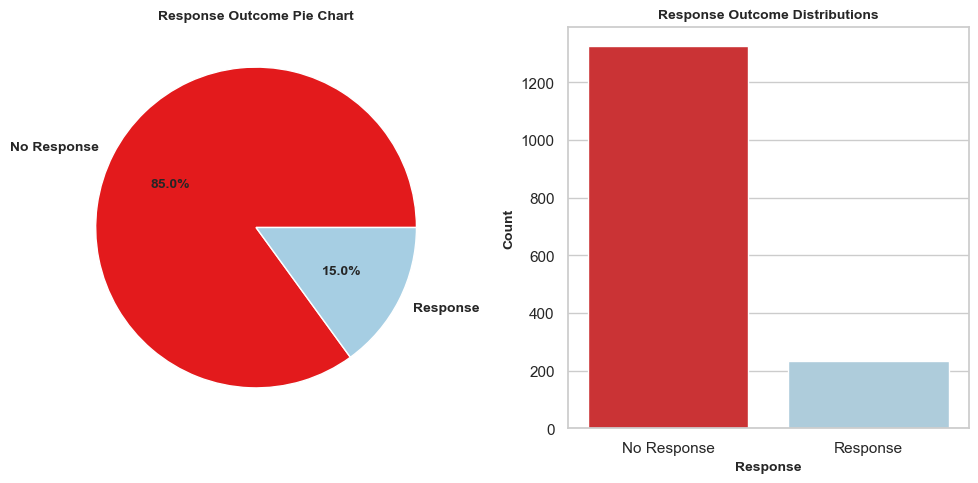

In [117]:
fig = plt.figure(figsize = (10, 5))
colors=["#e31a1c", "#a6cee3"]

plt.subplot(121)
plt.pie(y_train.value_counts(),
        labels = ['No Response', 'Response'], 
        autopct = '%.1f%%', 
        radius = 1, 
        colors=colors,
        textprops={'fontsize': 10, 'fontweight': 'bold'})
plt.title('Response Outcome Pie Chart', fontsize = 10, fontweight = 'bold')

plt.subplot(122)
resp = y_train.apply(lambda x: "No Response" if x == 0 else "Response")
t = sns.countplot(x=resp, palette=colors)
t.set_xlabel('Response', fontweight = 'bold', fontsize = 10)
t.set_ylabel('Count', fontweight = 'bold', fontsize = 10)

plt.title('Response Outcome Distributions', fontsize = 10, fontweight = 'bold')
plt.tight_layout()

## **Handling Imbalanced Data**

The risk status is highly imbalanced, with 15% Response and 85% No Response. That's why it requires resampling.

**Note**: When apply machine learning algorithms with imbalanced data, the model obtained will be more biased towards the majority classes. It means the model will predict the majority classes instead of the minority classes.

In [118]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y == 1))) # Response
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0))) # No Response

# Undersampling
# us = RandomUnderSampler(sampling_strategy = 0.9)
# X_balanced_res, y_balanced_res = us.fit_resample(X_train,y_train)

# Oversampling
# os = RandomOverSampler(sampling_strategy = 0.9)
# X_balanced_res, y_balanced_res = os.fit_resample(X_train,y_train)

# Oversampling SMOTE
sm = SMOTE(sampling_strategy=0.5, random_state = 2)
X_balanced_res, y_balanced_res = sm.fit_resample(X_train,y_train)

print('After OverSampling, the shape of X_train: {}'.format(X_balanced_res.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_balanced_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_balanced_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_balanced_res == 0)))

X_train = X_balanced_res
y_train = y_balanced_res

Before OverSampling, counts of label '1': 334
Before OverSampling, counts of label '0': 1895 

After OverSampling, the shape of X_train: (1989, 15)
After OverSampling, the shape of y_train: (1989,) 

After OverSampling, counts of label '1': 663
After OverSampling, counts of label '0': 1326


## **Machine Learning Techniques**

Here are some algorithms that will be tested to determine the best model to predict credit risk:
1. Decision Tree
2. Random Forest
3. Logistic Regression
4. Gaussian Naive Bayes
5. K-Nearest Neighbor
6. MLP Classifier (Neural Network)
7. XGBoost Classifier
8. Gradient Boosting Classifier
9. Support Vector Machine

### **Target Explanation**

* `Positive` = Customer yang Response
* `Negative` = Customer yang tidak Response

* `False Negative` = Customer yang Response tetapi dikira netral/tidak Response

* `False Positive` = Customer yang merasa netral/tidak Response tetapi dikira Response

`Target` = `Meminimalisir false negatif`, Fokus kasus yaitu meminimalisir false negatif karena orang yang aslinya Response tapi dikiranya tidak Response sehingga yang aslinya Response tadi tidak benar di deteksi padahal goals nya ingin meningkatkan prediksi Response.

Ada empat nilai yang dihasilkan di dalam tabel confusion
matrix, di antaranya

* `True Positive (TP)`, when a case was positive and predicted positive
* `False Positive (FP)`, when a case was negative but predicted positive
* `False Negative (FN)`, when a case was positive but predicted negative
* `True Negative (TN)`, when a case was negative and predicted negative

#### `Target Metrics` =  `Recall` & `F1 Score`

`Recall` adalah rasio kasus dengan prediksi benar positif dibandingkan dengan
keseluruhan data yang benar positif

Pilih algoritma yang memiliki `Recall` tinggi, jika skenario yang dipilih adalah `False Positive lebih baik terjadi daripada False Negative`.

`F1-Score` atau dikenal juga dengan nama F-Measure didapatkan dari perbandingan
rata-rata presisi dengan recall yang
dibobotkan

Kita bisa pilih algoritma yang memiliki hasil `accuracy` yang tinggi jika False Positive dan False Negative `nilainya dekat`. 

Namun, jika nilai di FP dan FN `berbeda jauh`, maka gunakan hasil performance `F1-score`.

#### **Confution Matrix**

* The `precision` will be "how many are correctly classified among that class" ( Percentage of correct positive predictions relative to total positive predictions.)
* The `recall` means "how many of this class you find over the whole number of element of this class". (Percentage of correct positive predictions relative to total actual positives.)
* The `f1-score` is the harmonic mean between precision & recall. The closer to 1, the better the model.
* The `support` is the number of occurence of the given class in dataset. These values simply tell us how many players belonged to each class in the test dataset. (to check balanced dataset/Proportion)

**Interpretation**

Precision – What percent of your predictions were correct? :

dari test data yang diprediksi positif (Response), berarti x% yg sesungguhnya positif (Response)

Recall – What percent of the positive cases did you catch? :

dari semua yang sebenarnya positif (Response), yang berhasil diprediksi positif (Response) x%

https://www.statology.org/sklearn-classification-report/

https://muthu.co/understanding-the-classification-report-in-sklearn/#:~:text=A%20Classification%20report%20is%20used,classification%20report%20as%20shown%20below.





In [119]:
!pip install xgboost

In [120]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.naive_bayes import GaussianNB #gaussian naive bayes
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #decision tree
from sklearn.ensemble import RandomForestClassifier #random forest
from sklearn.neighbors import KNeighborsClassifier #k-nearest neighbor
from sklearn.svm import SVC # Support Vector Machine/Classifier
from sklearn.neural_network import MLPClassifier #neural network
from sklearn.ensemble import GradientBoostingClassifier #gradient boosting
from xgboost import XGBClassifier #xgboost

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve #roc score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance

## **Function for Model Evaluation**

In [121]:
train_classifier_list = []
train_modelname_list = []
train_accuracy_list = []
train_recall_list = []
train_precision_list = []
train_f1_score_list= [] 
train_roc_auc_score_list = []
train_cross_val_score_list = []

In [122]:
def model_eval_train(classifier, model_name, X_train, y_train):
    # predict data train
    y_train_pred = classifier.predict(X_train)

    # print classification report
    print('Classification Report Training Model ('+model_name+'):\n')
    accuracy = round(accuracy_score(y_train , y_train_pred) , 3)
    precision = round(precision_score(y_train, y_train_pred, average="micro")  ,3)
    recall = round(recall_score(y_train , y_train_pred) ,3)
    f1_s = round(f1_score(y_train , y_train_pred) , 3)
    rocauc_score = round(roc_auc_score(y_train , y_train_pred) , 3)
    c_val_score = round(cross_val_score(classifier , X , y , cv=10 , scoring='accuracy').mean()  , 3)
    print(f'Accuracy Score is :{accuracy}')
    print(f'Precision Score is :{precision}')
    print(f'Recall Score is :{recall}')
    print(f'F1  Score is :{f1_s}')
    print(f'ROC AUC Score is :{rocauc_score}')
    print(f'Cross Val Score (k=10) is :{c_val_score}\n')

    print(classification_report(y_train, y_train_pred))

    # save report detail
    train_classifier_list.append(classifier)
    train_modelname_list.append(model_name)
    train_accuracy_list.append(accuracy)
    train_recall_list.append(recall)
    train_precision_list.append(precision)
    train_f1_score_list.append(f1_s)
    train_roc_auc_score_list.append(rocauc_score)
    train_cross_val_score_list.append(c_val_score)

    # form confusion matrix as a dataFrame
    conf_matrix = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No Response', 'Response'), ('No Response', 'Response'))
    tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()

    print("==== Actual Data (Train) =====")
    print("Total =", len(y_train))
    print("No Response =", len(y_train[y_train == 0]))
    print("Response =", len(y_train[y_train == 1]))
    print("==== Predicted Data (Test) =====")
    print("TN = {}, FP = {}, FN = {}, TP = {}".format(tn, fp, fn, tp))
    print("Predictly Correct =", tn+tp)
    print("Predictly Wrong =", fn+fp, "\n")

    # plot confusion matrix
    plt.figure(figsize=[8,5])
    heatmap = sns.heatmap(conf_matrix, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBu')
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

    plt.title('Confusion Matrix for Training Model ('+model_name+')\n', fontsize=13, color='black')
    plt.ylabel('True label', fontsize=13)
    plt.xlabel('\nPredicted label', fontsize=13)
    plt.show()
    print("\n")

    # ROC AUC Curve
    plt.figure(figsize=[8,5])
    fpr, tpr, threshold = roc_curve(y_train, y_train_pred)
    plt.plot(fpr, tpr, label = model_name+' (Area (Score) = %0.2f)'%rocauc_score)
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Customer Purchase Deposit')
    plt.legend(loc="lower right")
    plt.show()

In [123]:
test_classifier_list = []
test_modelname_list = []
test_accuracy_list = []
test_recall_list = []
test_precision_list = []
test_f1_score_list= [] 
test_roc_auc_score_list = []
test_cross_val_score_list = []

In [124]:
def model_eval_test(classifier, model_name, X_test, y_test):

     # predict data test
    y_test_pred = classifier.predict(X_test)

    # print classification report
    print('Classification Report Testing Model ('+model_name+'):\n')
    accuracy = round(accuracy_score(y_test , y_test_pred) , 3)
    precision = round(precision_score(y_test, y_test_pred, average="micro")  ,3)
    recall = round(recall_score(y_test , y_test_pred) ,3)
    f1_s = round(f1_score(y_test , y_test_pred) , 3)
    rocauc_score = round(roc_auc_score(y_test , y_test_pred) , 3)
    c_val_score = round(cross_val_score(classifier , X , y , cv=10 , scoring='accuracy').mean()  , 3)
    print(f'Accuracy Score is :{accuracy}')
    print(f'Precision Score is :{precision}')
    print(f'Recall Score is :{recall}')
    print(f'F1  Score is :{f1_s}')
    print(f'ROC AUC Score is :{rocauc_score}')
    print(f'Cross Val Score (k=10) is :{c_val_score}\n')
    
    print(classification_report(y_test, y_test_pred))

    # save report detail
    test_classifier_list.append(classifier)
    test_modelname_list.append(model_name)
    test_accuracy_list.append(accuracy)
    test_recall_list.append(recall)
    test_precision_list.append(precision)
    test_f1_score_list.append(f1_s)
    test_roc_auc_score_list.append(rocauc_score)
    test_cross_val_score_list.append(c_val_score)

    # form confusion matrix as a dataFrame
    conf_matrix = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No Response', 'Response'), ('No Response', 'Response'))
    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

    print("==== Actual Data (Test) =====")
    print("Total =", len(y_test))
    print("No Response =", len(y_test[y_test == 0]))
    print("Response =", len(y_test[y_test == 1]))
    print("==== Predicted Data (Test) =====")
    print("TN = {}, FP = {}, FN = {}, TP = {}".format(tn, fp, fn, tp))
    print("Predictly Correct =", tn+tp)
    print("Predictly Wrong =", fn+fp, "\n")

    # plot confusion matrix
    plt.figure(figsize=[8,5])
    heatmap = sns.heatmap(conf_matrix, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBuGn')
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

    plt.title('Confusion Matrix for Testing Model ('+model_name+')\n', fontsize=13, color='black')
    plt.ylabel('True label', fontsize=13)
    plt.xlabel('\nPredicted label', fontsize=13)
    plt.show()
    print("\n")

    # ROC AUC Curve
    plt.figure(figsize=[8,5])
    fpr, tpr, threshold = roc_curve(y_test, y_test_pred)
    plt.plot(fpr, tpr, label = model_name+' (Area (Score) = %0.2f)'%rocauc_score)
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Customer Purchase Deposit')
    plt.legend(loc="lower right")
    plt.show()

In [125]:
def feature_importance_plot(classifier, model_name, X_train=None):
    # important features
    # K-Nearest Neighbors/MLP Classifier = No Function/Method to Check Feature Importance
    if model_name == "Logistic Regression":
        # Logistic Regression
        imp = pd.DataFrame(data={
            'Attribute': X_train.columns,
            'Importance': log_model.coef_[0]
        })
        imp = imp.sort_values(by='Importance', ascending=False).set_index("Attribute")
        ft_imp = imp["Importance"]
    elif model_name in ["Naive Bayes", "K-Nearest Neighbors", "MLP Classifier", "Support Vector Machine"]:
        imp = pd.DataFrame(data={
            'Attribute': X_train.columns,
            'Importance': permutation_importance(gnb_model, X_test, y_test).importances_mean
        })
        imp = imp.sort_values(by='Importance', ascending=False).set_index("Attribute")
        ft_imp = imp["Importance"]
    else: 
        # Decision Tree
        # Random Forest
        # XGBoost Classifier
        # Gradient Boosting Classifier
        ft_imp = classifier.feature_importances_

    importances = pd.Series(ft_imp, index=X.columns).sort_values(ascending=False)

    plt.figure(figsize=(10,7))
    fig = importances.plot(kind ='barh', color='#7faadb', width=0.8)
    plt.title('Features Importance Plot '+model_name+'\n', fontsize=14)

    # Annotate every single Bar with its value, based on it's width   
    N = len(importances)
    thickness = range(1, N+1)
    thick_sum = sum(thickness) 
    barmax = max(importances) 
    for i, p in enumerate(fig.patches):
            fig.annotate("%.2f" % (p.get_width()),
                        (p.get_x() + p.get_width(), p.get_y() + 1),
                        xytext=(5, 15), textcoords='offset points')
            fig.set_ylim(N, -1)
            fig.set_xlim(0,barmax*1.4)

    fig.figure.tight_layout()
    plt.show()

## **Modelling**

### **1. Decision Tree**

In [126]:
# train the model
dt_model = DecisionTreeClassifier().fit(X_train,y_train)
print(dt_model)

DecisionTreeClassifier()


#### **Performance of Training Model**

Classification Report Training Model (Decision Tree):

Accuracy Score is :0.997
Precision Score is :0.997
Recall Score is :0.991
F1  Score is :0.995
ROC AUC Score is :0.995
Cross Val Score (k=10) is :0.839

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1326
           1       1.00      0.99      1.00       663

    accuracy                           1.00      1989
   macro avg       1.00      1.00      1.00      1989
weighted avg       1.00      1.00      1.00      1989

==== Actual Data (Train) =====
Total = 1989
No Response = 1326
Response = 663
==== Predicted Data (Test) =====
TN = 1326, FP = 0, FN = 6, TP = 657
Predictly Correct = 1983
Predictly Wrong = 6 



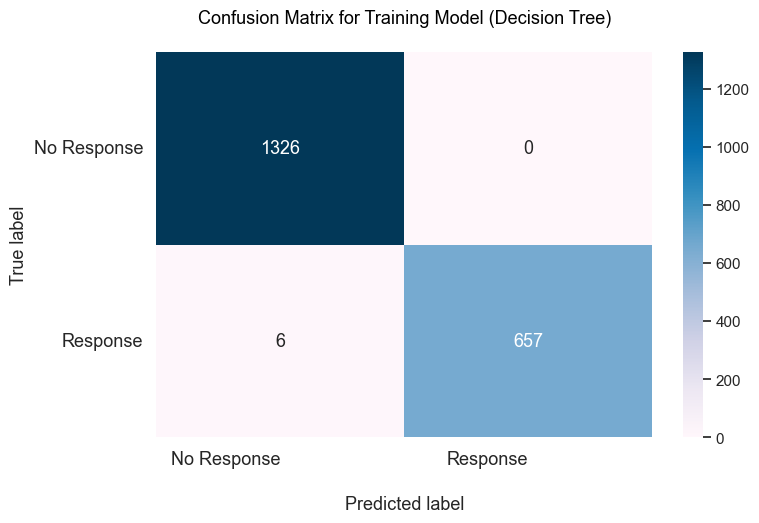

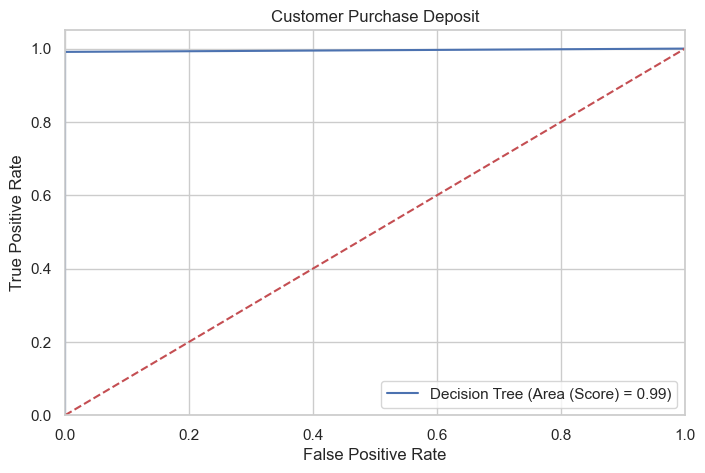

In [127]:
model_eval_train(dt_model, "Decision Tree", X_train, y_train)

Based on the **classification report** results, the training model of `Decision Tree` algorithms has a `very high accuracy, recall and f1 score` value.

Based on **confusion matrix**, it observed that:

- The classifier made a total of 3187 predictions. All of them 3187 were predicted correctly.
- The classifier predicted 
     - `Response (TP) 448 times`
     - `No Response (TN) 2739 times`

     In reality, Response status in the sample has the same value.
- Response and No Response are both the best-classified classes. The decision tree model classified 100% of them correctly.
- Both recall and f1-score are also very good

#### **Performance of Testing Model**

Classification Report Testing Model (Decision Tree):

Accuracy Score is :0.83
Precision Score is :0.83
Recall Score is :0.49
F1  Score is :0.462
ROC AUC Score is :0.69
Cross Val Score (k=10) is :0.837

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       569
           1       0.44      0.49      0.46       100

    accuracy                           0.83       669
   macro avg       0.67      0.69      0.68       669
weighted avg       0.84      0.83      0.83       669

==== Actual Data (Test) =====
Total = 669
No Response = 569
Response = 100
==== Predicted Data (Test) =====
TN = 506, FP = 63, FN = 51, TP = 49
Predictly Correct = 555
Predictly Wrong = 114 



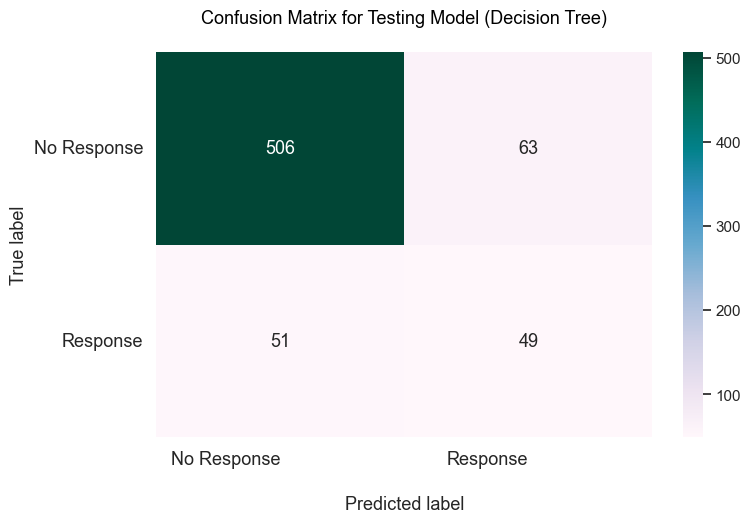

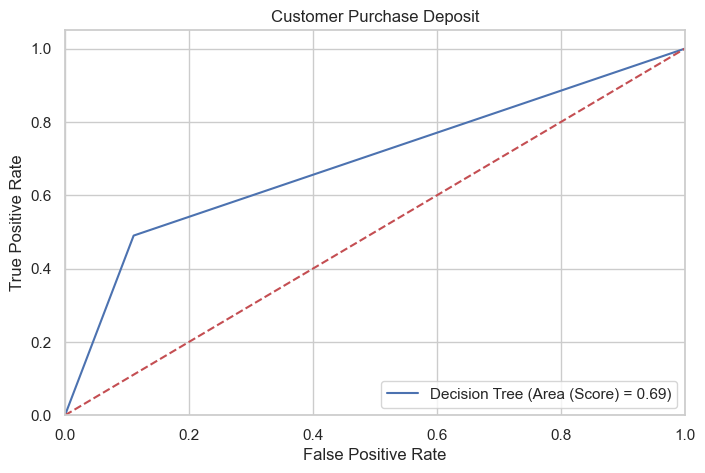

In [128]:
model_eval_test(dt_model, "Decision Tree", X_test, y_test)

Based on the **classification report** results, the testing model of `Decision Tree` algorithms has a `high accuracy, recall and f1 score` above 80%.

Based on **confusion matrix**, it is observed that:

- The classifier made a total of 1063 predictions. The classifier predicted
     - `Response (TP) 126 times`
     - `No Response (TN) 890 times`
- Response and No Response are both well classified. The decision tree model classified approaches 100% of them correctly.
- Both recall and f1-score are also pretty good
- However, there is an indication of `Overfitting`, but not high

In [129]:
acc_dt_train=round(dt_model.score(X_train,y_train)*100,2)
acc_dt_test=round(dt_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_dt_train))
print("Testing Accuracy: {} %".format(acc_dt_test))

Training Accuracy: 99.7 %
Testing Accuracy: 82.96 %


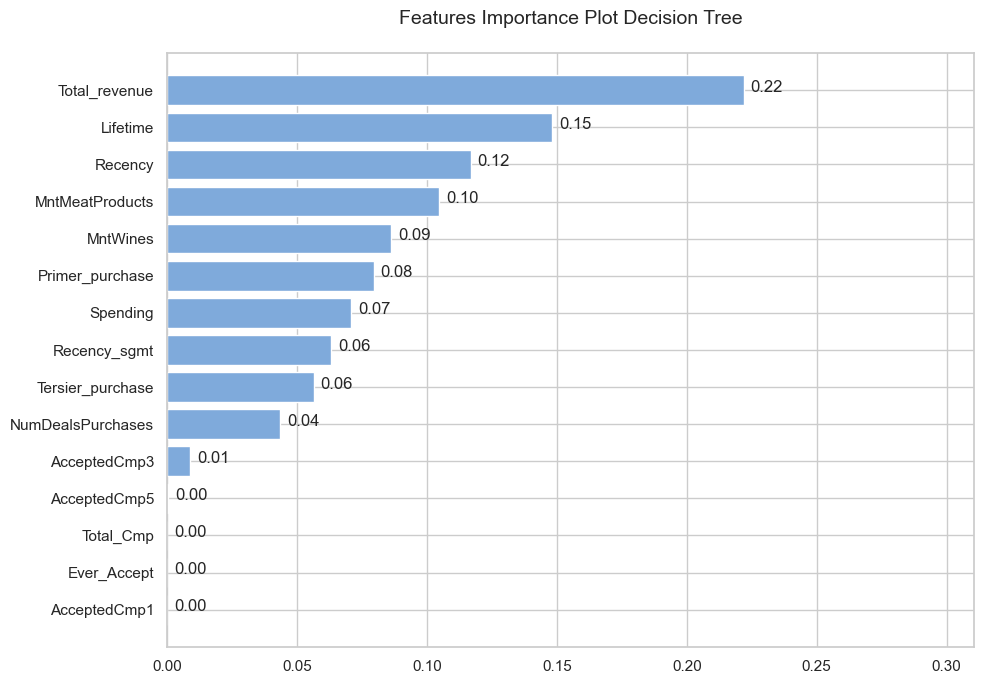

In [130]:
feature_importance_plot(dt_model, "Decision Tree")

### **2. Random Forest**

In [131]:
# train the model
rf_model = RandomForestClassifier().fit(X_train, y_train)
print(rf_model)

RandomForestClassifier()


#### **Performance of Training Model**

Classification Report Training Model (Random Forest):

Accuracy Score is :0.997
Precision Score is :0.997
Recall Score is :0.997
F1  Score is :0.995
ROC AUC Score is :0.997
Cross Val Score (k=10) is :0.877

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1326
           1       0.99      1.00      1.00       663

    accuracy                           1.00      1989
   macro avg       1.00      1.00      1.00      1989
weighted avg       1.00      1.00      1.00      1989

==== Actual Data (Train) =====
Total = 1989
No Response = 1326
Response = 663
==== Predicted Data (Test) =====
TN = 1322, FP = 4, FN = 2, TP = 661
Predictly Correct = 1983
Predictly Wrong = 6 



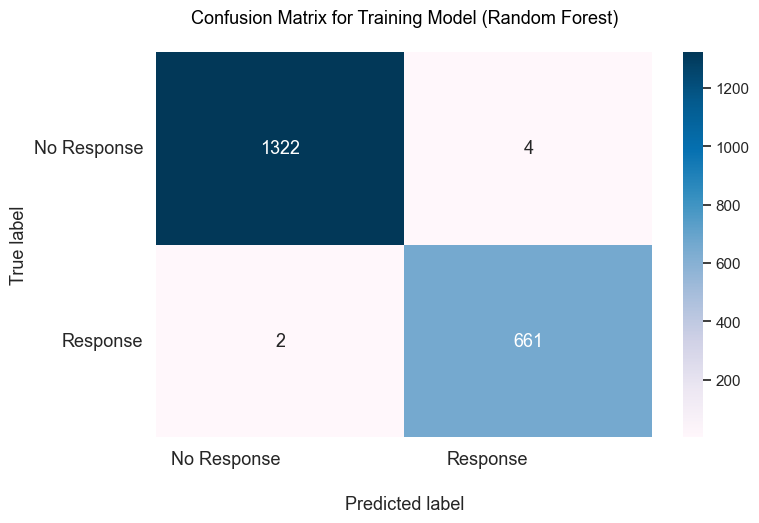

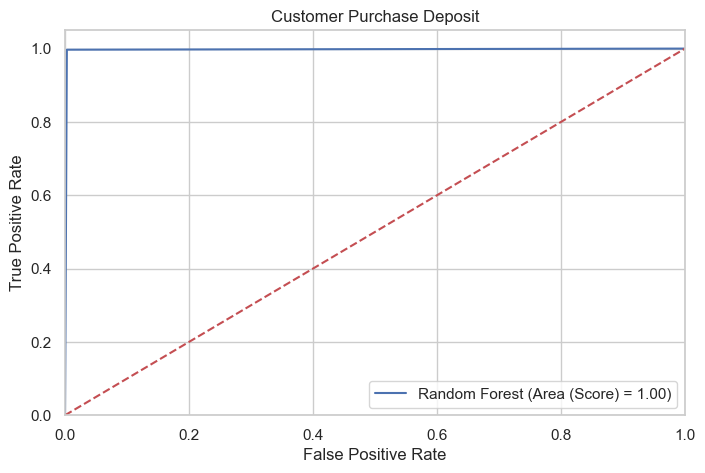

In [132]:
model_eval_train(rf_model, "Random Forest", X_train, y_train)

Based on the **classification report** results, the training model of `Random Forest` algorithms also has a `very high accuracy, recall and f1 score` value.

Based on **confusion matrix**, it observed that:

- The classifier made a total of 3187 predictions. All of them 3187 were predicted correctly.
- The classifier predicted 
     - `Response (TP) 448 times`
     - `No Response (TN) 2739 times`
     
     In reality, Response status in the sample has the same value.
- Response and No Response are both the best-classified classes. The model classified 100% of them correctly.
- Both recall and f1-score are also very good

#### **Performance of Testing Model**

Classification Report Testing Model (Random Forest):

Accuracy Score is :0.873
Precision Score is :0.873
Recall Score is :0.52
F1  Score is :0.55
ROC AUC Score is :0.727
Cross Val Score (k=10) is :0.877

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       569
           1       0.58      0.52      0.55       100

    accuracy                           0.87       669
   macro avg       0.75      0.73      0.74       669
weighted avg       0.87      0.87      0.87       669

==== Actual Data (Test) =====
Total = 669
No Response = 569
Response = 100
==== Predicted Data (Test) =====
TN = 532, FP = 37, FN = 48, TP = 52
Predictly Correct = 584
Predictly Wrong = 85 



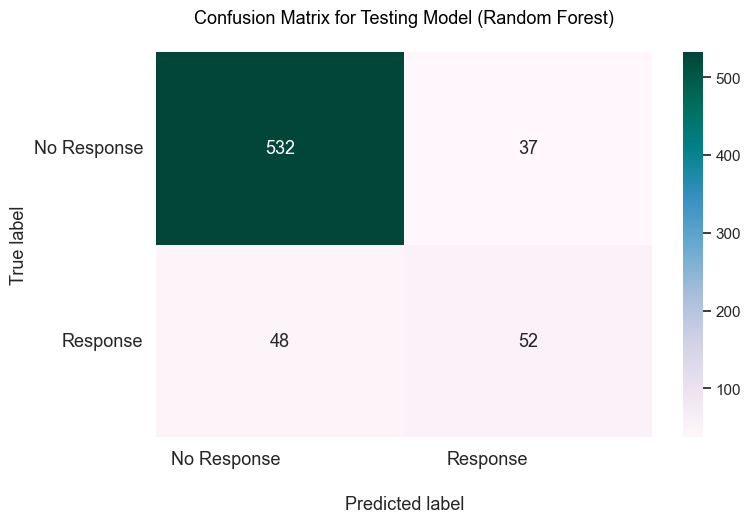

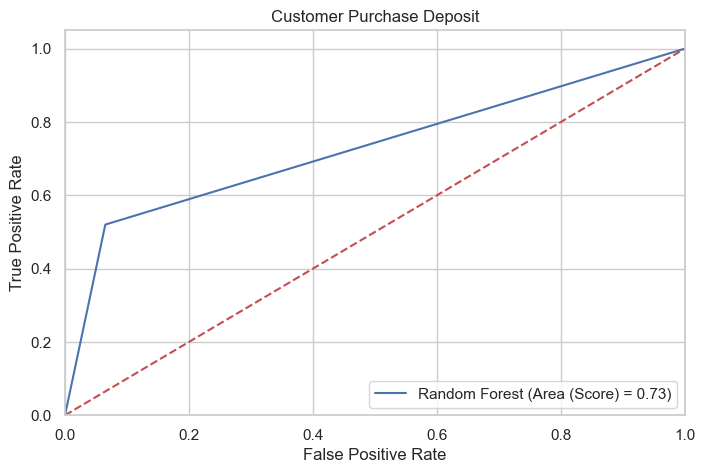

In [133]:
model_eval_test(rf_model, "Random Forest", X_test, y_test)

Based on the **classification report** results, the testing model of `Random Forest` algorithms has a `very high accuracy, recall and f1 score` above 97%.

Based on **confusion matrix**, it is observed that:

- The classifier made a total of 1063 predictions. The classifier predicted
     - `Response (TP) 127 times`
     - `No Response (TN) 912 times`
- Response and No Response are both well classified. The model classified approaches 100% of them correctly.
- Both recall and f1-score are also pretty good

In [134]:
acc_rf_train=round(rf_model.score(X_train,y_train)*100,2)
acc_rf_test=round(rf_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_rf_train))
print("Test Accuracy: {} %".format(acc_rf_test))

Training Accuracy: 99.7 %
Test Accuracy: 87.29 %


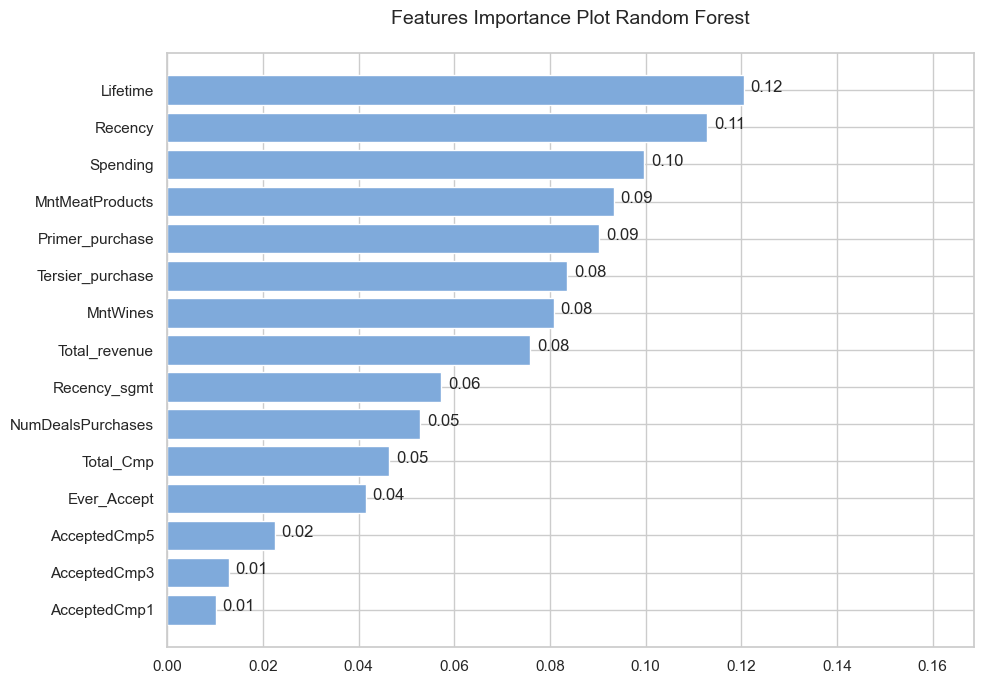

In [135]:
feature_importance_plot(rf_model, "Random Forest")

### **3. Logistic Regression**

In [136]:
# train the model
log_model = LogisticRegression(solver='lbfgs', max_iter=len(X_train)).fit(X_train, y_train)
print(log_model)

LogisticRegression(max_iter=1989)


#### **Performance of Training Model**

Classification Report Training Model (Logistic Regression):

Accuracy Score is :0.799
Precision Score is :0.799
Recall Score is :0.621
F1  Score is :0.673
ROC AUC Score is :0.755
Cross Val Score (k=10) is :0.876

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1326
           1       0.73      0.62      0.67       663

    accuracy                           0.80      1989
   macro avg       0.78      0.75      0.76      1989
weighted avg       0.79      0.80      0.79      1989

==== Actual Data (Train) =====
Total = 1989
No Response = 1326
Response = 663
==== Predicted Data (Test) =====
TN = 1177, FP = 149, FN = 251, TP = 412
Predictly Correct = 1589
Predictly Wrong = 400 



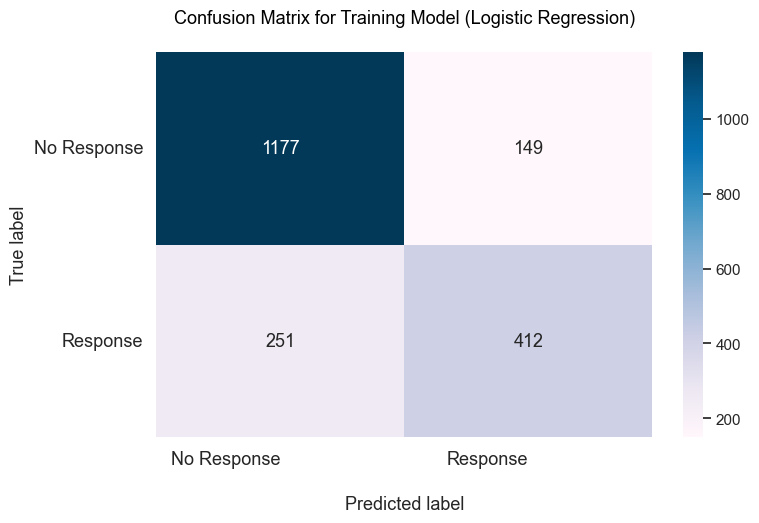

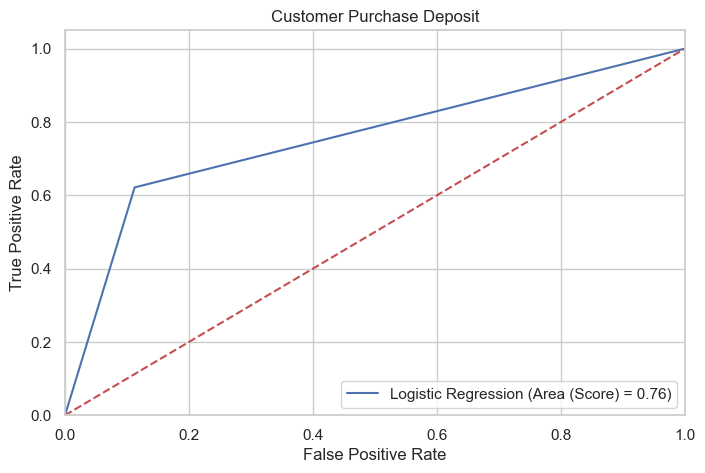

In [137]:
model_eval_train(log_model, "Logistic Regression", X_train, y_train)

Based on the **classification report** results, the training model of `Logistic Regression` algorithms have a `fairly good accuracy`, but `very poor recall and f1 score` value.

Based on **confusion matrix**, it is observed that:

- The classifier made a total of 3187 predictions.
- The classifier predicted
    - `Response (TP) 47 times`
    - `No Response (TN) 2697 times`
     
      In reality, this value is a high indication of incorrect predictions FP = 42, FN = 401.
- Response and No Response are both not very good at classified classes
- Both recall and f1-score are also very bad

#### **Performance of Testing Model**

Classification Report Testing Model (Logistic Regression):

Accuracy Score is :0.845
Precision Score is :0.845
Recall Score is :0.6
F1  Score is :0.536
ROC AUC Score is :0.744
Cross Val Score (k=10) is :0.876

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       569
           1       0.48      0.60      0.54       100

    accuracy                           0.84       669
   macro avg       0.71      0.74      0.72       669
weighted avg       0.86      0.84      0.85       669

==== Actual Data (Test) =====
Total = 669
No Response = 569
Response = 100
==== Predicted Data (Test) =====
TN = 505, FP = 64, FN = 40, TP = 60
Predictly Correct = 565
Predictly Wrong = 104 



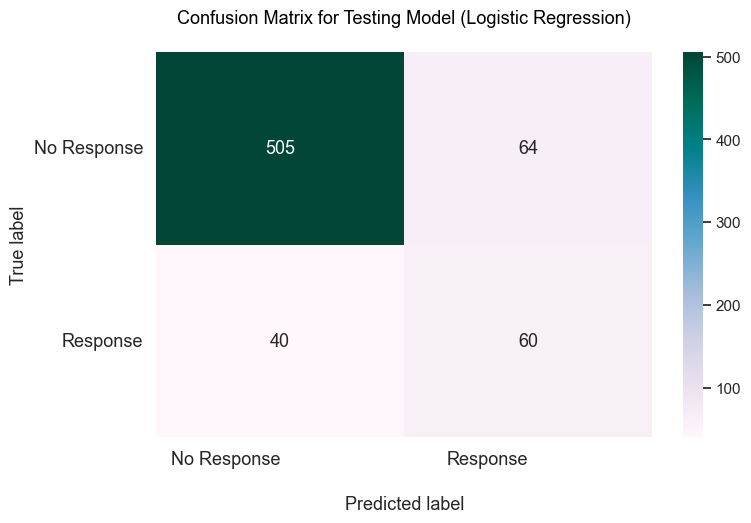

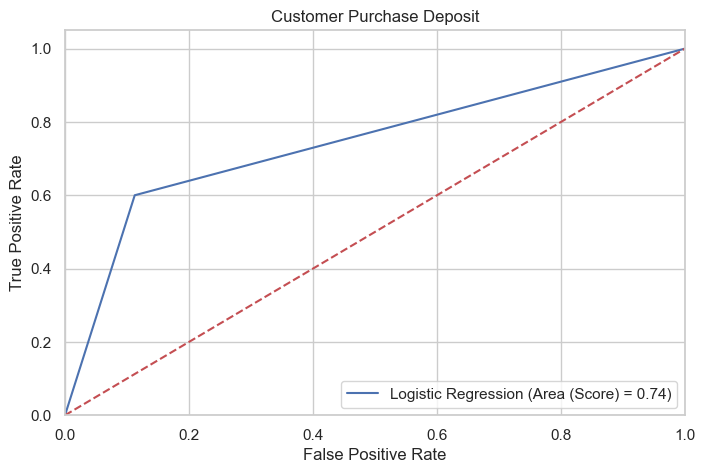

In [138]:
model_eval_test(log_model, "Logistic Regression", X_test, y_test)

Based on the **classification report** results, the training model of `Logistic Regression` algorithms have a `fairly good accuracy and f1 score`, but `quite low on recall` value.

Based on **confusion matrix**, it is observed that:

- The classifier made a total of 1063 predictions.
- The classifier predicted
     - `Response (TP) 7 times`
     - `No Response (TN) 898 times`
     
       In reality, this value is a high indication of incorrect predictions on False Negative, FN = 143
- No Response are not very good at classified classes
- Recalls are also quite low

In [139]:
acc_log_train=round(log_model.score(X_train,y_train)*100,2)
acc_log_test=round(log_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_log_train))
print("Test Accuracy: {} %".format(acc_log_test))

Training Accuracy: 79.89 %
Test Accuracy: 84.45 %


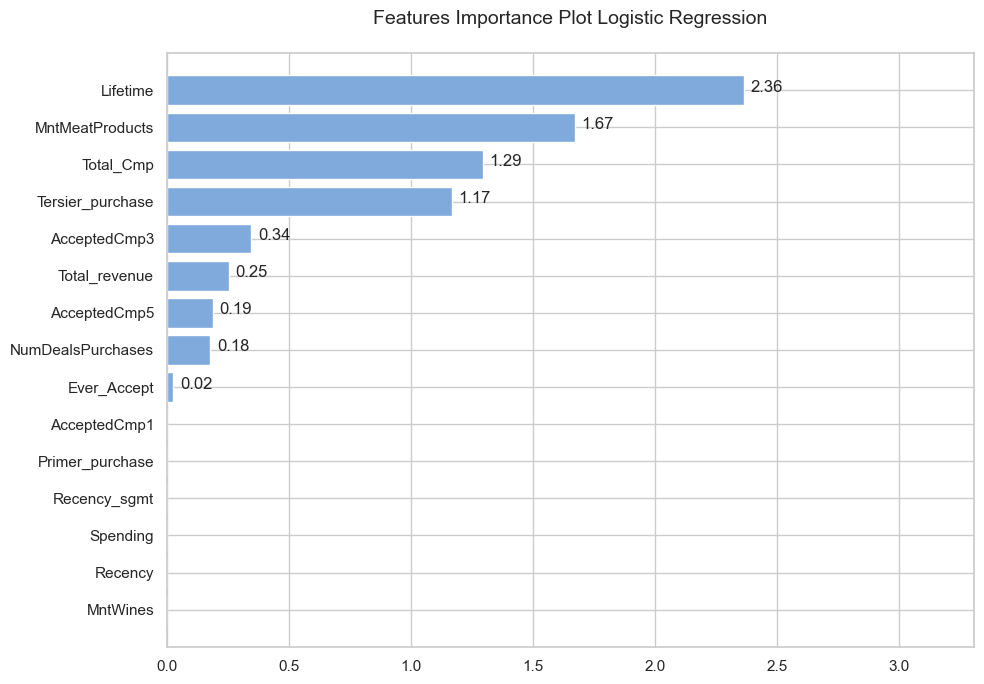

In [140]:
feature_importance_plot(log_model, "Logistic Regression", X_train)

### **4. Naive Bayes**

In [141]:
# train the model
gnb_model = GaussianNB().fit(X_train, y_train)
print(gnb_model)

GaussianNB()


#### **Performance of Training Model**

Classification Report Training Model (Naive Bayes):

Accuracy Score is :0.764
Precision Score is :0.764
Recall Score is :0.57
F1  Score is :0.617
ROC AUC Score is :0.715
Cross Val Score (k=10) is :0.823

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1326
           1       0.67      0.57      0.62       663

    accuracy                           0.76      1989
   macro avg       0.74      0.72      0.72      1989
weighted avg       0.76      0.76      0.76      1989

==== Actual Data (Train) =====
Total = 1989
No Response = 1326
Response = 663
==== Predicted Data (Test) =====
TN = 1141, FP = 185, FN = 285, TP = 378
Predictly Correct = 1519
Predictly Wrong = 470 



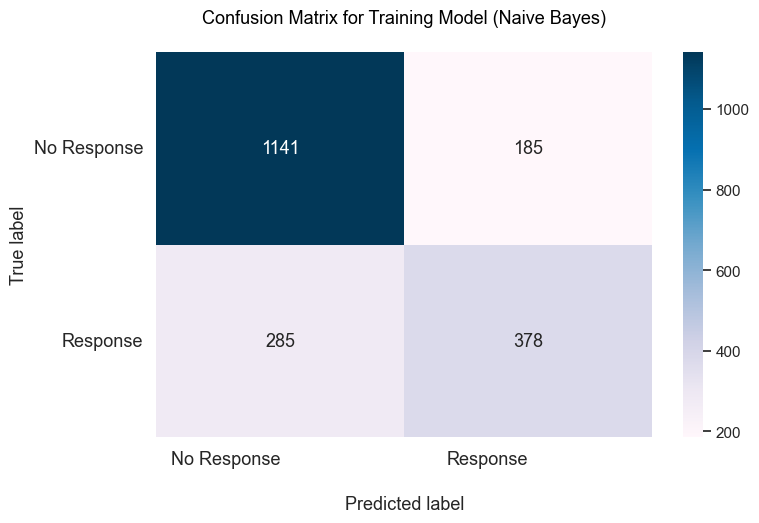

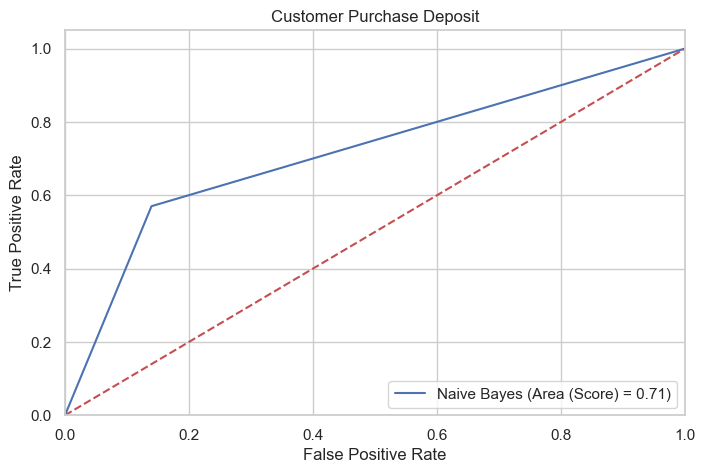

In [142]:
model_eval_train(gnb_model, "Naive Bayes", X_train, y_train)

Based on the **classification report** results, the training model of `Naive Bayes` algorithms have a `fairly good accuracy`, but `quite low recall and f1 score` value.

Based on **confusion matrix**, it is observed that:

- The classifier made a total of 3187 predictions.
- The classifier predicted
     - `Response (TP) 251 times`
     - `No Response (TN) 2530 times`
     
       In reality, this value is a high indication of incorrect predictions FP = 209, FN = 197
- Response and No Response are both not very good at classified classes
- Both recall and f1-score are also quite low

#### **Performance of Testing Model**

Classification Report Testing Model (Naive Bayes):

Accuracy Score is :0.828
Precision Score is :0.828
Recall Score is :0.54
F1  Score is :0.484
ROC AUC Score is :0.709
Cross Val Score (k=10) is :0.823

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       569
           1       0.44      0.54      0.48       100

    accuracy                           0.83       669
   macro avg       0.68      0.71      0.69       669
weighted avg       0.84      0.83      0.84       669

==== Actual Data (Test) =====
Total = 669
No Response = 569
Response = 100
==== Predicted Data (Test) =====
TN = 500, FP = 69, FN = 46, TP = 54
Predictly Correct = 554
Predictly Wrong = 115 



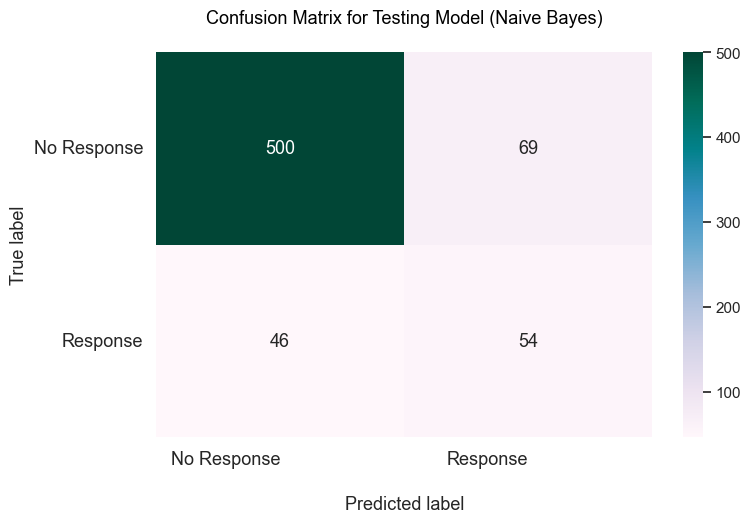

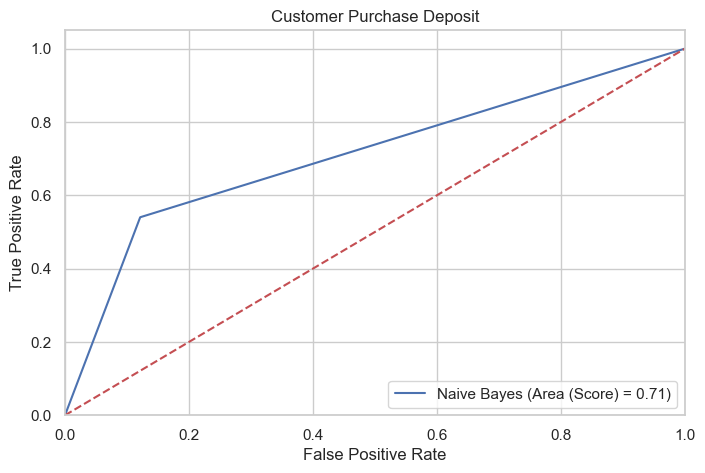

In [143]:
model_eval_test(gnb_model, "Naive Bayes", X_test, y_test)

Based on the **classification report** results, the training model of `Naive Bayes` algorithms have a `fairly good accuracy`, but `quite low on recall and f1 score` value.

Based on **confusion matrix**, it is observed that:

- The classifier made a total of 1063 predictions.
- The classifier predicted
    - `Response (TP) 79 times`
    - `No Response (TN) 840 times`
     
    In reality, this value is a high indication of incorrect predictions on both, FP = 73, FN = 71
- Response and No Response are not very good at classified classes
- Both Recalls and f1-score are also quite low

In [144]:
acc_gnb_train=round(gnb_model.score(X_train,y_train)*100,2)
acc_gnb_test=round(gnb_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_gnb_train))
print("Test Accuracy: {} %".format(acc_gnb_test))

Training Accuracy: 76.37 %
Test Accuracy: 82.81 %


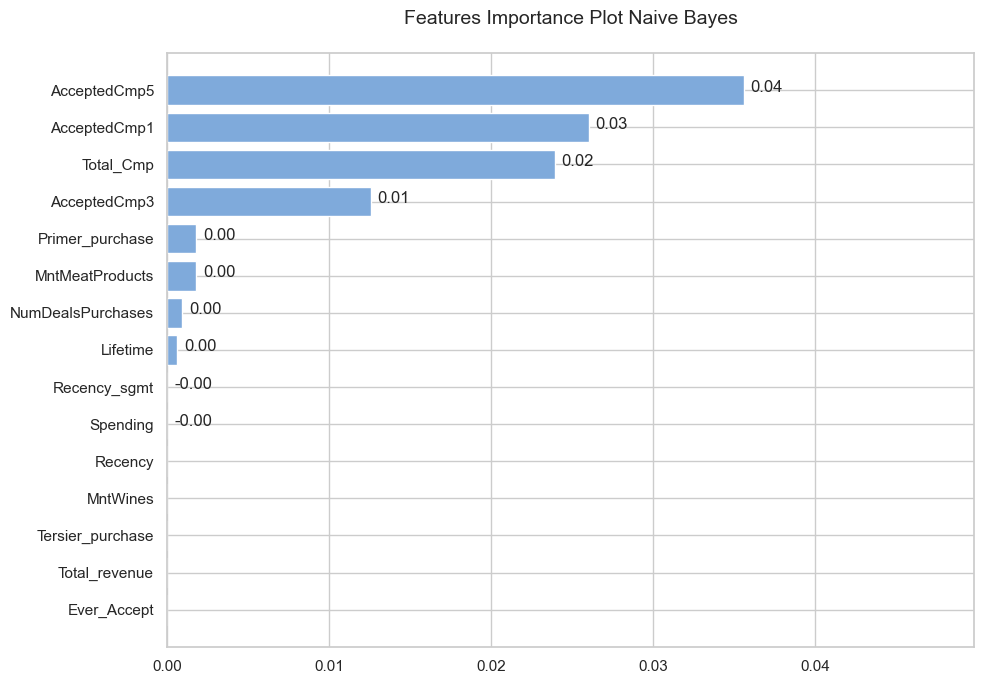

In [145]:
feature_importance_plot(gnb_model, "Naive Bayes", X_train)

### **5. K-Nearest Neighbors**

In [146]:
# train the model
knn_model = KNeighborsClassifier().fit(X_train,y_train)
print(knn_model)

KNeighborsClassifier()


#### **Performance of Training Model**

Classification Report Training Model (K-Nearest Neighbors):

Accuracy Score is :0.899
Precision Score is :0.899
Recall Score is :0.911
F1  Score is :0.858
ROC AUC Score is :0.902
Cross Val Score (k=10) is :0.859

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1326
           1       0.81      0.91      0.86       663

    accuracy                           0.90      1989
   macro avg       0.88      0.90      0.89      1989
weighted avg       0.91      0.90      0.90      1989

==== Actual Data (Train) =====
Total = 1989
No Response = 1326
Response = 663
==== Predicted Data (Test) =====
TN = 1185, FP = 141, FN = 59, TP = 604
Predictly Correct = 1789
Predictly Wrong = 200 



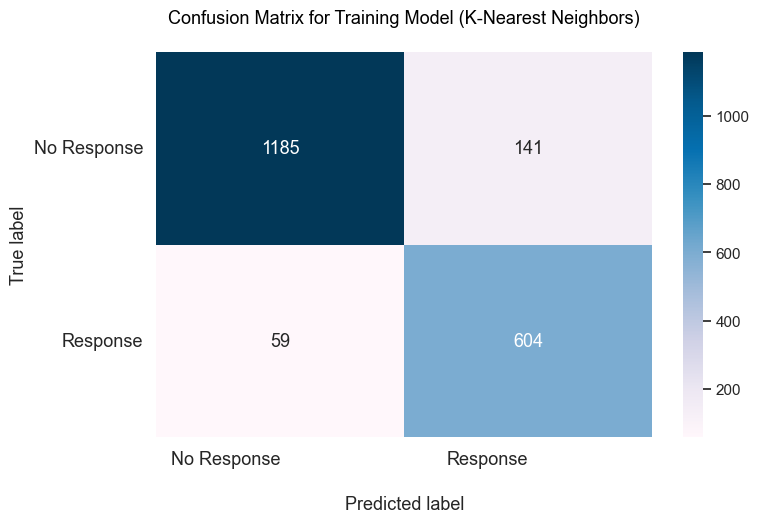

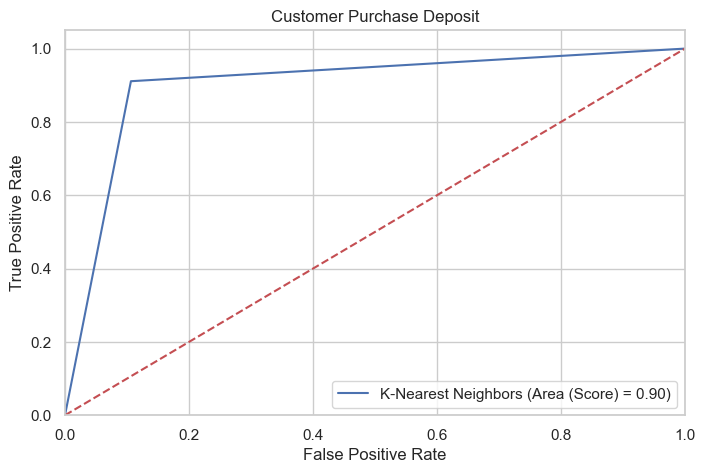

In [147]:
model_eval_train(knn_model, "K-Nearest Neighbors", X_train, y_train)

Based on the **classification report** results, the training model of `K-Nearest Neighbors` algorithms have a `fairly good accuracy`, but `quite low recall and f1 score` value.

Based on **confusion matrix**, it is observed that:

- The classifier made a total of 3187 predictions.
- The classifier predicted
     - `Response (TP) 153 times`
     - `No Response (TN) 2699 times`
     
       In reality, this value is a high indication of incorrect predictions FP = 40, FN = 295
- Response and No Response are both not very good at classified classes
- Both recall and f1-score are also quite low

#### **Performance of Testing Model**

Classification Report Testing Model (K-Nearest Neighbors):

Accuracy Score is :0.824
Precision Score is :0.824
Recall Score is :0.63
F1  Score is :0.516
ROC AUC Score is :0.744
Cross Val Score (k=10) is :0.859

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       569
           1       0.44      0.63      0.52       100

    accuracy                           0.82       669
   macro avg       0.68      0.74      0.70       669
weighted avg       0.86      0.82      0.84       669

==== Actual Data (Test) =====
Total = 669
No Response = 569
Response = 100
==== Predicted Data (Test) =====
TN = 488, FP = 81, FN = 37, TP = 63
Predictly Correct = 551
Predictly Wrong = 118 



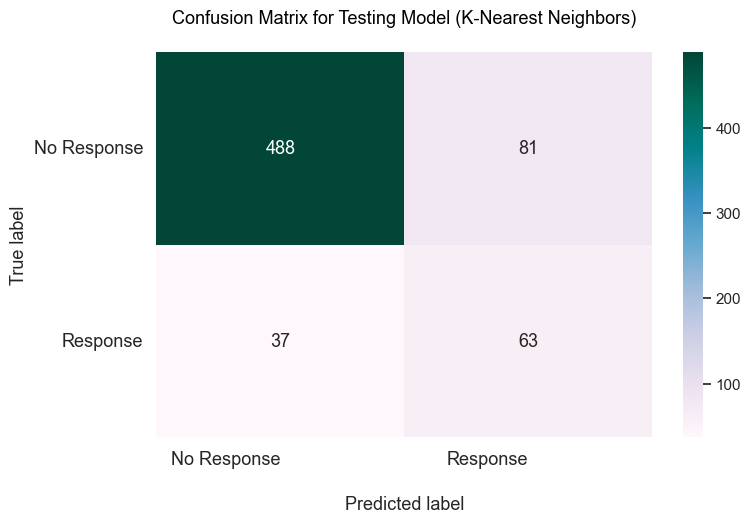

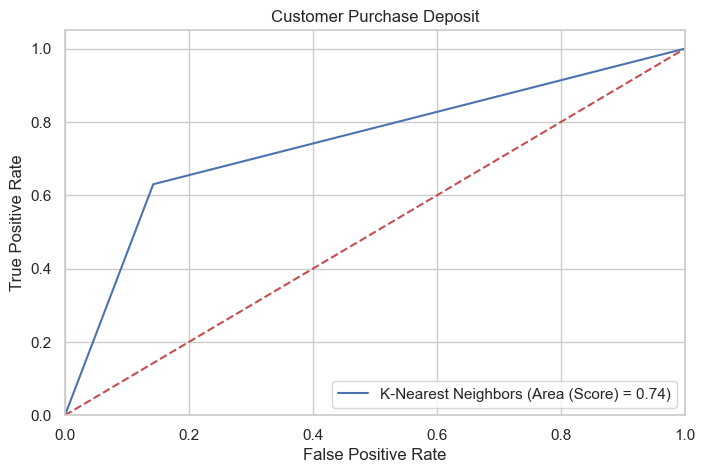

In [148]:
model_eval_test(knn_model, "K-Nearest Neighbors", X_test, y_test)

Based on the **classification report** results, the training model of `K-Nearest Neighbors` algorithms have a `fairly good accuracy`, but `very low on recall and f1 score` value.

Based on **confusion matrix**, it is observed that:

- The classifier made a total of 1063 predictions.
- The classifier predicted
     - `Response (TP) 41 times`
     - `No Response (TN) 890 times`
     
     In reality, this value is a high indication of incorrect predictions on both, FP = 23, FN = 109
- Response and No Response are not very good at classified classes
- Both Recalls and f1-scores are also very low

In [149]:
acc_knn_train=round(knn_model.score(X_train,y_train)*100,2)
acc_knn_test=round(knn_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_knn_train))
print("Test Accuracy: {} %".format(acc_knn_test))

Training Accuracy: 89.94 %
Test Accuracy: 82.36 %


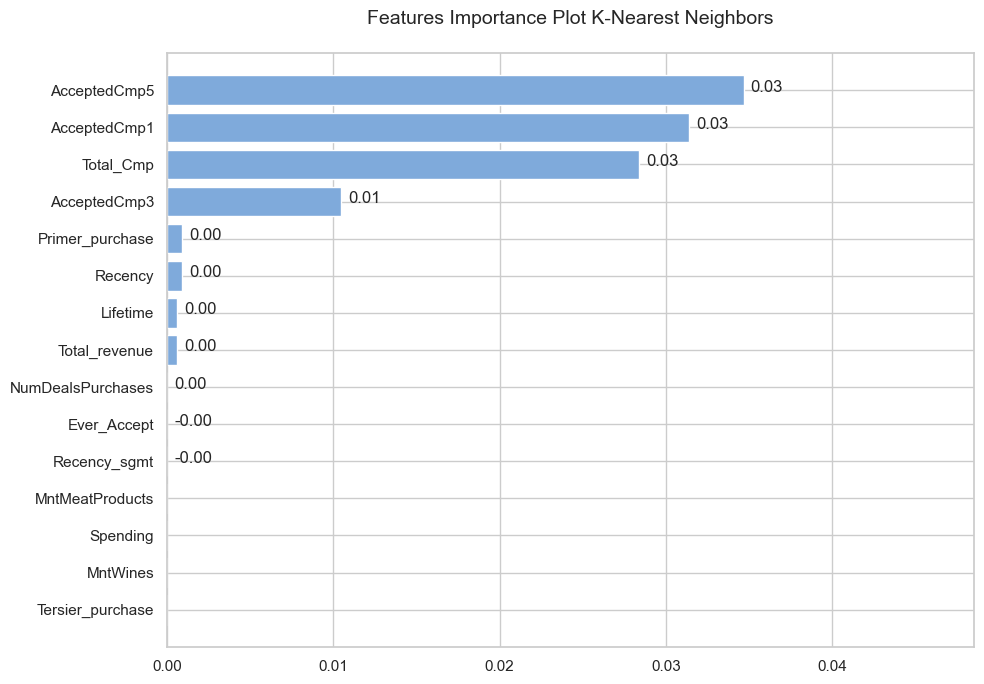

In [150]:
feature_importance_plot(knn_model, "K-Nearest Neighbors", X_train)

### **6. MLP Classifier (Neural Network)**

In [151]:
# train the model
mlp_model = MLPClassifier(random_state=1, max_iter=len(X_train)).fit(X_train, y_train)

#### **Performance of Training Model**

Classification Report Training Model (MLP Classifier):

Accuracy Score is :0.902
Precision Score is :0.902
Recall Score is :0.872
F1  Score is :0.856
ROC AUC Score is :0.895
Cross Val Score (k=10) is :0.876

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1326
           1       0.84      0.87      0.86       663

    accuracy                           0.90      1989
   macro avg       0.89      0.89      0.89      1989
weighted avg       0.90      0.90      0.90      1989

==== Actual Data (Train) =====
Total = 1989
No Response = 1326
Response = 663
==== Predicted Data (Test) =====
TN = 1217, FP = 109, FN = 85, TP = 578
Predictly Correct = 1795
Predictly Wrong = 194 



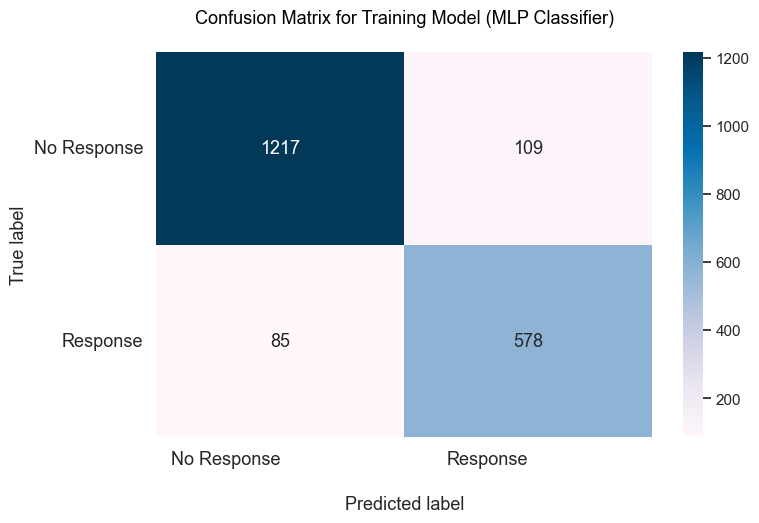

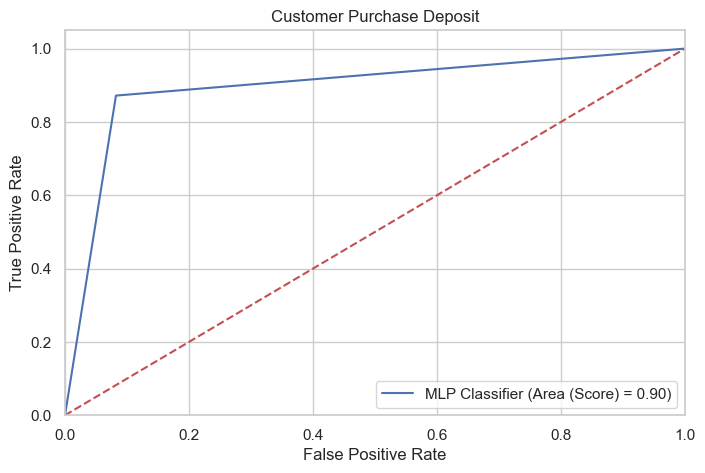

In [152]:
model_eval_train(mlp_model, "MLP Classifier", X_train, y_train)

Based on the **classification report** results, the training model of `MLP Classifier` algorithms have a `fairly good accuracy`, but `very low recall and f1 score` value.

Based on **confusion matrix**, it is observed that:

- The classifier made a total of 3187 predictions.
- The classifier predicted
    - `Response (TP) 65 times`
    - `No Response (TN) 2710 times`
     
        In reality, this value is a high indication of incorrect predictions FP = 29, FN = 383
- Response and No Response are both not very good at classified classes
- Both recall and f1-score are also very low

#### **Performance of Testing Model**

Classification Report Testing Model (MLP Classifier):

Accuracy Score is :0.827
Precision Score is :0.827
Recall Score is :0.54
F1  Score is :0.482
ROC AUC Score is :0.708
Cross Val Score (k=10) is :0.876

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       569
           1       0.44      0.54      0.48       100

    accuracy                           0.83       669
   macro avg       0.68      0.71      0.69       669
weighted avg       0.84      0.83      0.83       669

==== Actual Data (Test) =====
Total = 669
No Response = 569
Response = 100
==== Predicted Data (Test) =====
TN = 499, FP = 70, FN = 46, TP = 54
Predictly Correct = 553
Predictly Wrong = 116 



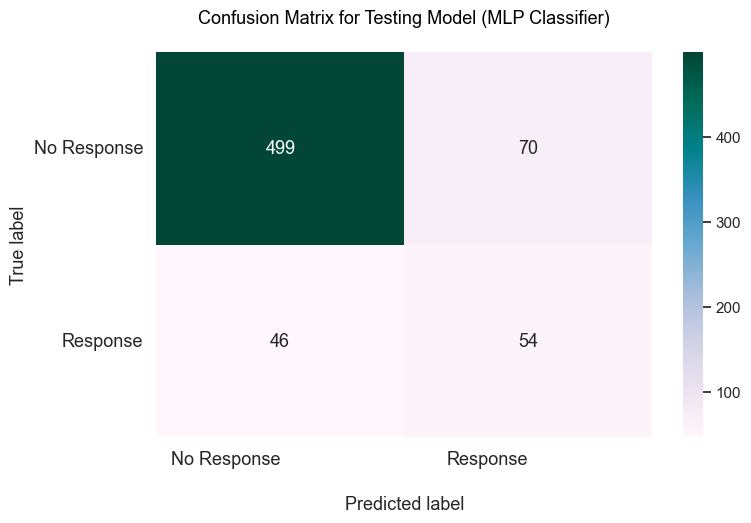

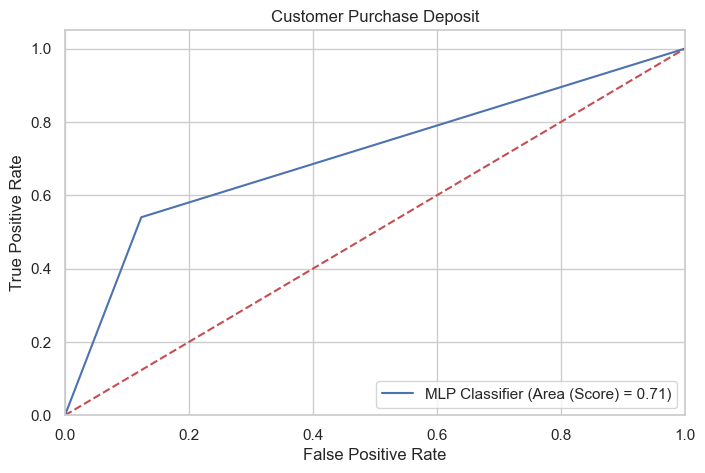

In [153]:
model_eval_test(mlp_model, "MLP Classifier", X_test, y_test)

Based on the **classification report** results, the training model of `MLP Classifier` algorithms have a `fairly good accuracy`, but `very low on recall and f1 score` value.

Based on **confusion matrix**, it is observed that:

- The classifier made a total of 1063 predictions.
- The classifier predicted
     - `Response (TP) 10 times`
     - `No Response (TN) 907 times`
     
     In reality, this value is a high indication of incorrect predictions on both, FP = 6, FN = 140
- Response and No Response are not very good at classified classes
- Both Recalls and f1-scores are also very low

In [154]:
acc_mlp_train=round(mlp_model.score(X_train,y_train)*100,2)
acc_mlp_test=round(mlp_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_mlp_train))
print("Test Accuracy: {} %".format(acc_mlp_test))

Training Accuracy: 90.25 %
Test Accuracy: 82.66 %


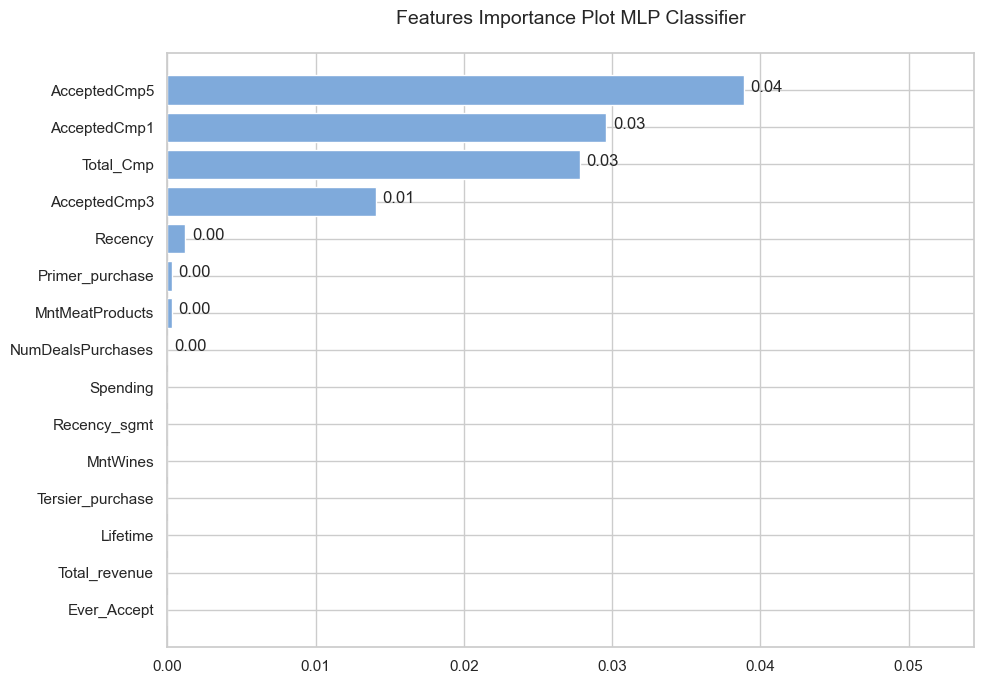

In [155]:
feature_importance_plot(mlp_model, "MLP Classifier", X_train)

### **7. XGBoost Classifier**

In [156]:
# train the model
xgb_model = XGBClassifier().fit(X_train, y_train)

#### **Performance of Training Model**

Classification Report Training Model (XGBoost Classifier):

Accuracy Score is :0.997
Precision Score is :0.997
Recall Score is :0.995
F1  Score is :0.995
ROC AUC Score is :0.997
Cross Val Score (k=10) is :0.872

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1326
           1       1.00      1.00      1.00       663

    accuracy                           1.00      1989
   macro avg       1.00      1.00      1.00      1989
weighted avg       1.00      1.00      1.00      1989

==== Actual Data (Train) =====
Total = 1989
No Response = 1326
Response = 663
==== Predicted Data (Test) =====
TN = 1323, FP = 3, FN = 3, TP = 660
Predictly Correct = 1983
Predictly Wrong = 6 



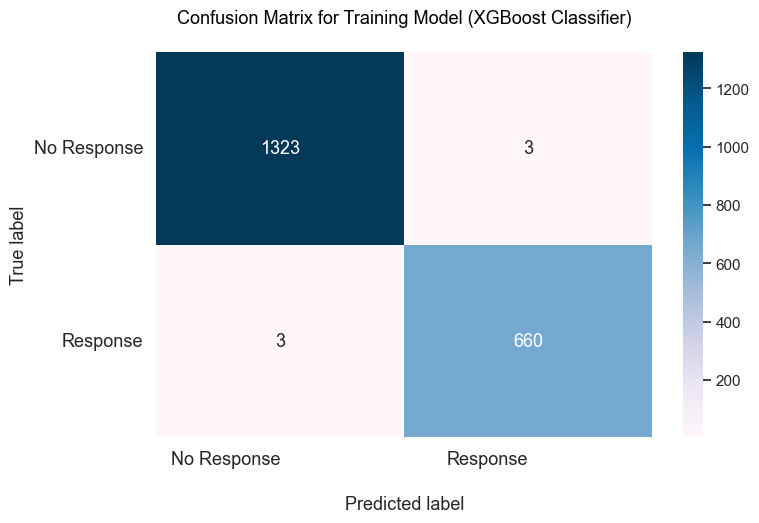

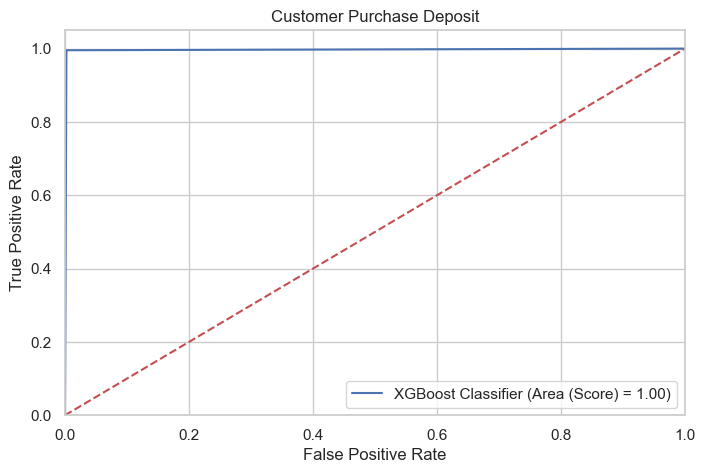

In [157]:
model_eval_train(xgb_model, "XGBoost Classifier", X_train, y_train)

Based on the **classification report** results, the training model of `XGBoost Classifier` algorithms also has a `very high accuracy, recall and f1 score` value.

Based on **confusion matrix**, it is observed that:

- The classifier made a total of 3187 predictions. Everything is close to right.
- The classifier predicted
  - `Response (TP) 376 times`
  - `No Response (TN) 2737 times`
     
      In reality, Response status in the sample is compared that all are almost true.
- Response and No Response are both the best-classified classes approaching 100% of them correctly.
- Both recall and f1-score are also very good

#### **Performance of Testing Model**

Classification Report Testing Model (XGBoost Classifier):

Accuracy Score is :0.867
Precision Score is :0.867
Recall Score is :0.53
F1  Score is :0.544
ROC AUC Score is :0.728
Cross Val Score (k=10) is :0.872

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       569
           1       0.56      0.53      0.54       100

    accuracy                           0.87       669
   macro avg       0.74      0.73      0.73       669
weighted avg       0.86      0.87      0.87       669

==== Actual Data (Test) =====
Total = 669
No Response = 569
Response = 100
==== Predicted Data (Test) =====
TN = 527, FP = 42, FN = 47, TP = 53
Predictly Correct = 580
Predictly Wrong = 89 



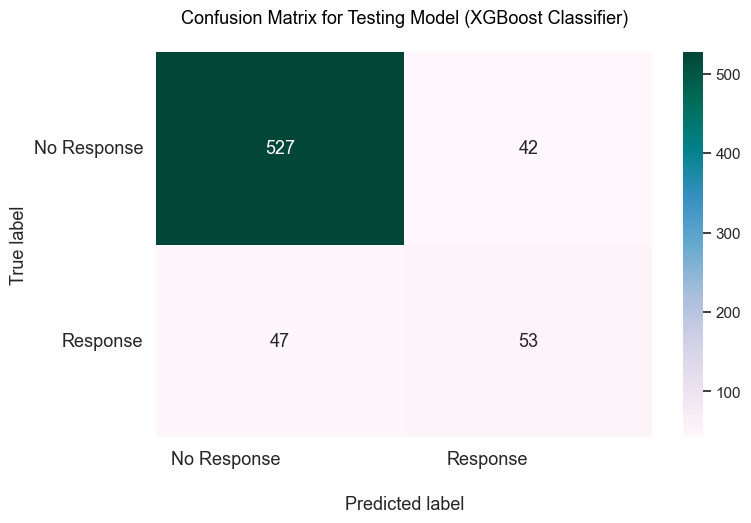

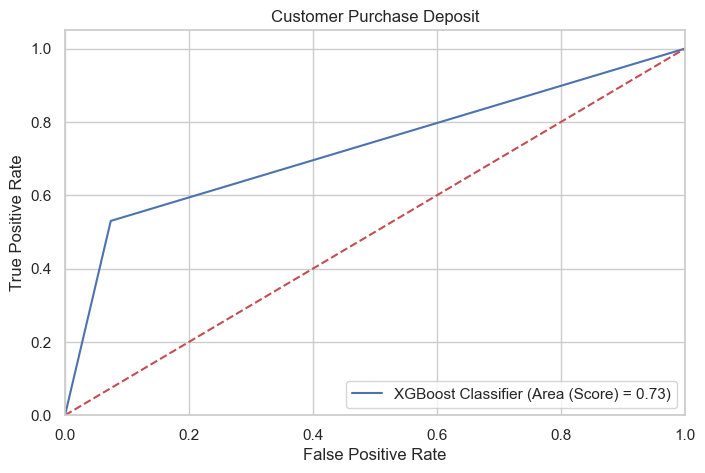

In [158]:
model_eval_test(xgb_model, "XGBoost Classifier", X_test, y_test)

Based on the **classification report** results, the testing model of `XGBoost Classifier` algorithms has a `very high accuracy, recall and f1 score` above 91%.

Based on **confusion matrix**, it is observed that:

- The classifier made a total of 1063 predictions. The classifier predicted
     - `Response (TP) 127 times`
     - `No Response (TN) 912 times`
- Response and No Response are both well classified. The model classified approaches 100% of them correctly.
- Both recall and f1-score are also pretty good

In [159]:
acc_xgb_train=round(xgb_model.score(X_train,y_train)*100,2)
acc_xgb_test=round(xgb_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_xgb_train))
print("Test Accuracy: {} %".format(acc_xgb_test))

Training Accuracy: 99.7 %
Test Accuracy: 86.7 %


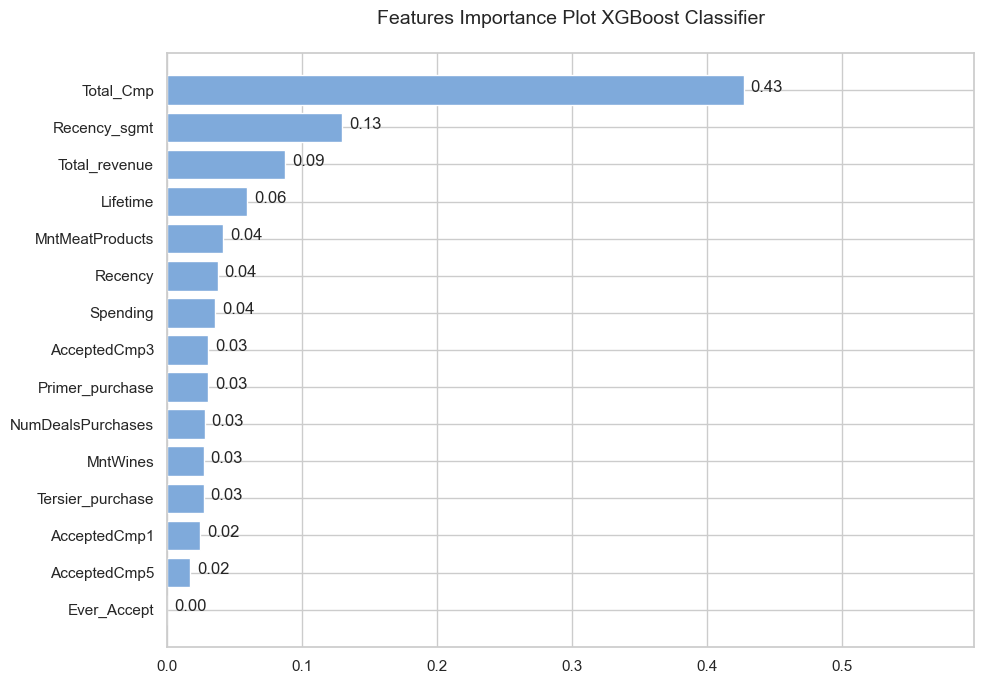

In [160]:
feature_importance_plot(xgb_model, "XGBoost Classifier")

### **8. Gradient Boosting Classifier**

In [161]:
# train the model
# gb_model = GradientBoostingClassifier().fit(X_train, y_train)
gb_model = GradientBoostingClassifier(learning_rate=0.01, n_estimators=400,max_depth=13).fit(X_train, y_train)

#### **Performance of Training Model**

Classification Report Training Model (Gradient Boosting Classifier):

Accuracy Score is :0.997
Precision Score is :0.997
Recall Score is :0.991
F1  Score is :0.995
ROC AUC Score is :0.995
Cross Val Score (k=10) is :0.846

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1326
           1       1.00      0.99      1.00       663

    accuracy                           1.00      1989
   macro avg       1.00      1.00      1.00      1989
weighted avg       1.00      1.00      1.00      1989

==== Actual Data (Train) =====
Total = 1989
No Response = 1326
Response = 663
==== Predicted Data (Test) =====
TN = 1326, FP = 0, FN = 6, TP = 657
Predictly Correct = 1983
Predictly Wrong = 6 



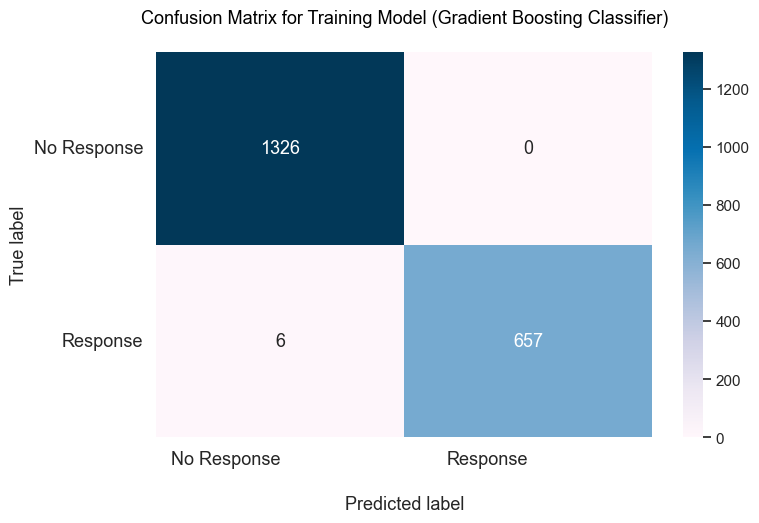

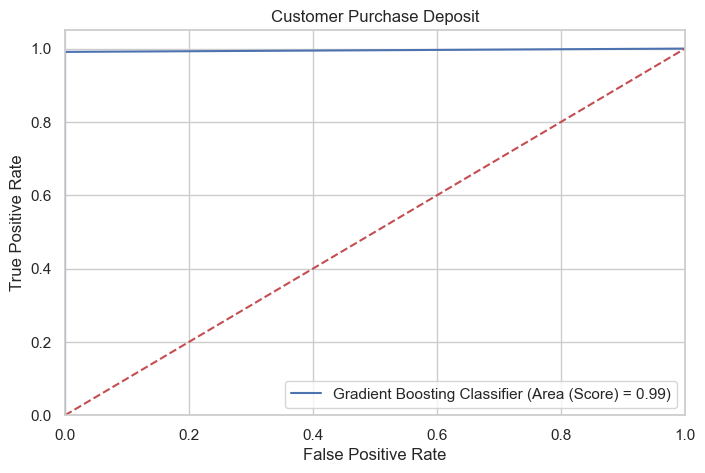

In [162]:
model_eval_train(gb_model, "Gradient Boosting Classifier", X_train, y_train)

Based on the **classification report** results, the training model of `Gradient Boosting Classifier` algorithms also has a `very high accuracy, recall and f1 score` value.

Based on **confusion matrix**, it is observed that:

- The classifier made a total of 3187 predictions. Everything is close to right.
- The classifier predicted
  - `Response (TP) 447 times`
  - `No Response (TN) 2739 times`
     
      In reality, Response status in the sample is compared that all are true.
- Response and No Response are both the best-classified classes 100% of them correctly.
- Both recall and f1-score are also very good

#### **Performance of Testing Model**

Classification Report Testing Model (Gradient Boosting Classifier):

Accuracy Score is :0.839
Precision Score is :0.839
Recall Score is :0.48
F1  Score is :0.471
ROC AUC Score is :0.691
Cross Val Score (k=10) is :0.846

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       569
           1       0.46      0.48      0.47       100

    accuracy                           0.84       669
   macro avg       0.68      0.69      0.69       669
weighted avg       0.84      0.84      0.84       669

==== Actual Data (Test) =====
Total = 669
No Response = 569
Response = 100
==== Predicted Data (Test) =====
TN = 513, FP = 56, FN = 52, TP = 48
Predictly Correct = 561
Predictly Wrong = 108 



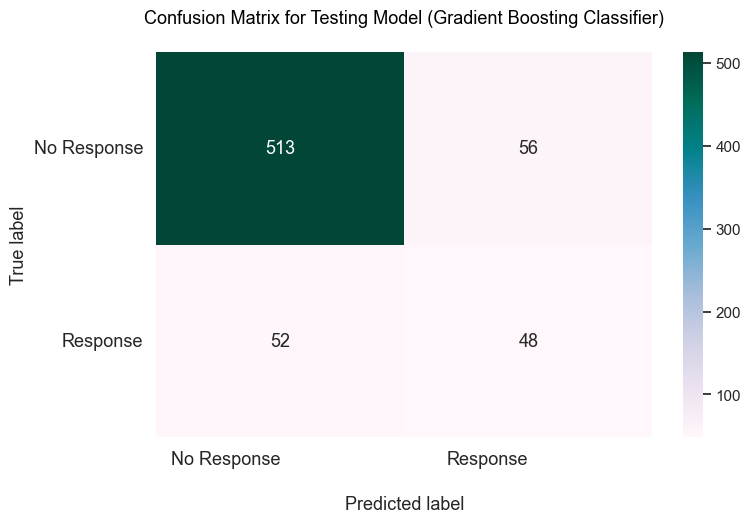

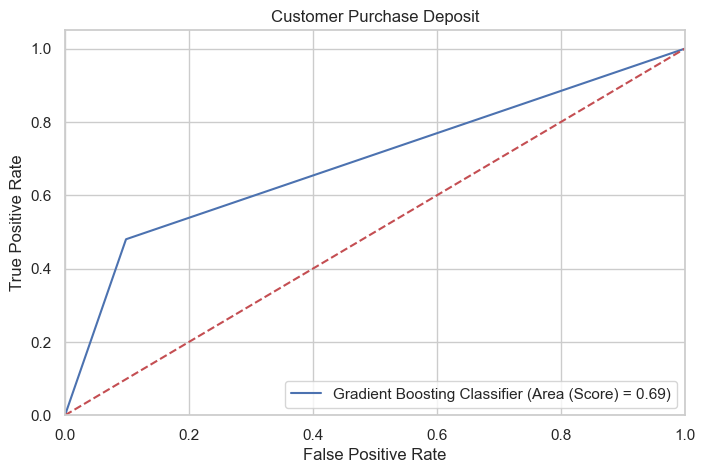

In [163]:
model_eval_test(gb_model, "Gradient Boosting Classifier", X_test, y_test)

Based on the **classification report** results, the testing model of `Gradient Boosting Classifier` algorithms has a `very high accuracy, recall and f1 score` above 91%.

Based on **confusion matrix**, it is observed that:

- The classifier made a total of 1063 predictions. The classifier predicted
     - `Response (TP) 127 times`
     - `No Response (TN) 913 times`
- Response and No Response are both well classified. The model classified approaches 100% of them correctly.
- Both recall and f1-score are also very good

In [164]:
acc_gb_train=round(gb_model.score(X_train,y_train)*100,2)
acc_gb_test=round(gb_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_gb_train))
print("Test Accuracy: {} %".format(acc_gb_test))

Training Accuracy: 99.7 %
Test Accuracy: 83.86 %


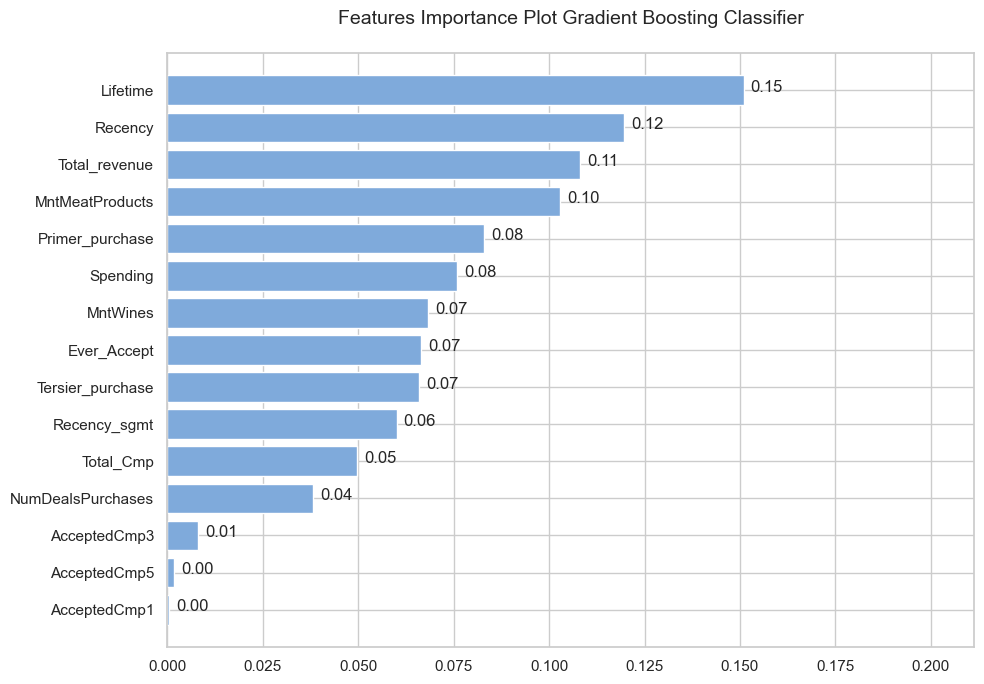

In [165]:
feature_importance_plot(gb_model, "Gradient Boosting Classifier")

### **9. Support Vector Machine**

In [166]:
# train the model
svm_model = SVC(kernel='rbf', probability=True).fit(X_train, y_train)
print(rf_model)

RandomForestClassifier()


#### **Performance of Training Model**

Classification Report Training Model (Support Vector Machine):

Accuracy Score is :0.83
Precision Score is :0.83
Recall Score is :0.679
F1  Score is :0.726
ROC AUC Score is :0.792
Cross Val Score (k=10) is :0.879

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1326
           1       0.78      0.68      0.73       663

    accuracy                           0.83      1989
   macro avg       0.82      0.79      0.80      1989
weighted avg       0.83      0.83      0.83      1989

==== Actual Data (Train) =====
Total = 1989
No Response = 1326
Response = 663
==== Predicted Data (Test) =====
TN = 1200, FP = 126, FN = 213, TP = 450
Predictly Correct = 1650
Predictly Wrong = 339 



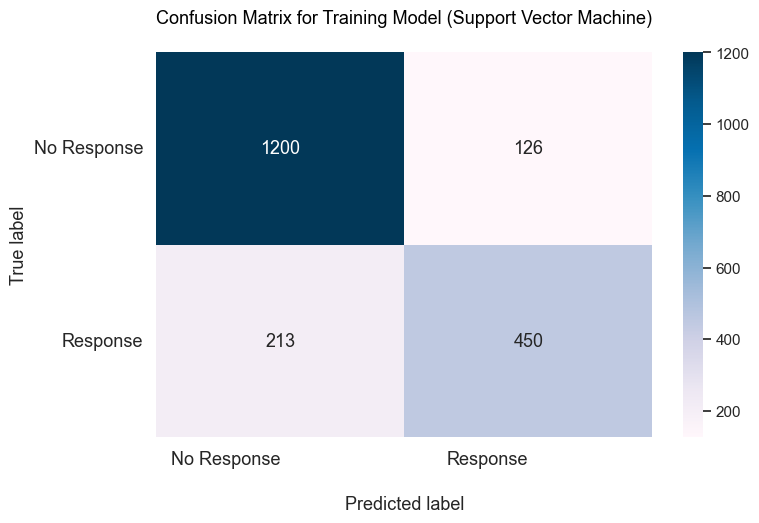

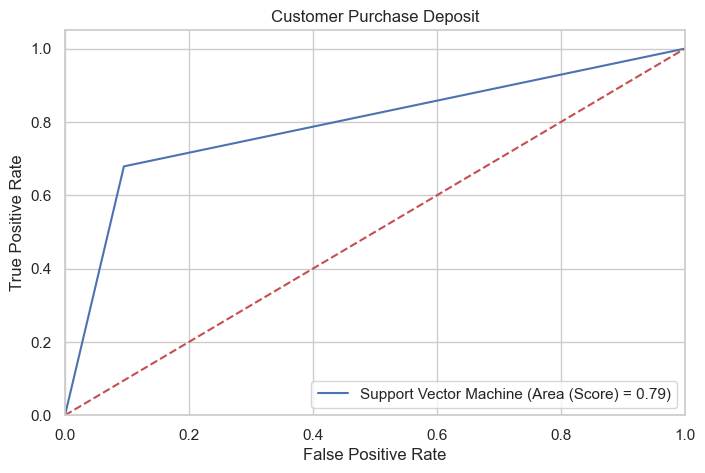

In [167]:
model_eval_train(svm_model, "Support Vector Machine", X_train, y_train)

Based on the **classification report** results, the training model of `Support Vector Machine` algorithms have a `fairly good accuracy`, but `very low recall and f1 score` value even up to 0% (FAIL).

Based on **confusion matrix**, it is observed that:

- The classifier made a total of 3187 predictions.
- The classifier predicted
     - `Response (TP) 0, model failed prediction`
     - `No Response (TN) 2710 times`
     
         In reality, this value is a high indication of incorrect predictions on False Negative FN = 448
- No Response are not very good at classified classes
- Both recall and f1-score are also very low even up to 0% (FAIL).

#### **Performance of Testing Model**

Classification Report Testing Model (Support Vector Machine):

Accuracy Score is :0.843
Precision Score is :0.843
Recall Score is :0.55
F1  Score is :0.512
ROC AUC Score is :0.722
Cross Val Score (k=10) is :0.879

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       569
           1       0.48      0.55      0.51       100

    accuracy                           0.84       669
   macro avg       0.70      0.72      0.71       669
weighted avg       0.85      0.84      0.85       669

==== Actual Data (Test) =====
Total = 669
No Response = 569
Response = 100
==== Predicted Data (Test) =====
TN = 509, FP = 60, FN = 45, TP = 55
Predictly Correct = 564
Predictly Wrong = 105 



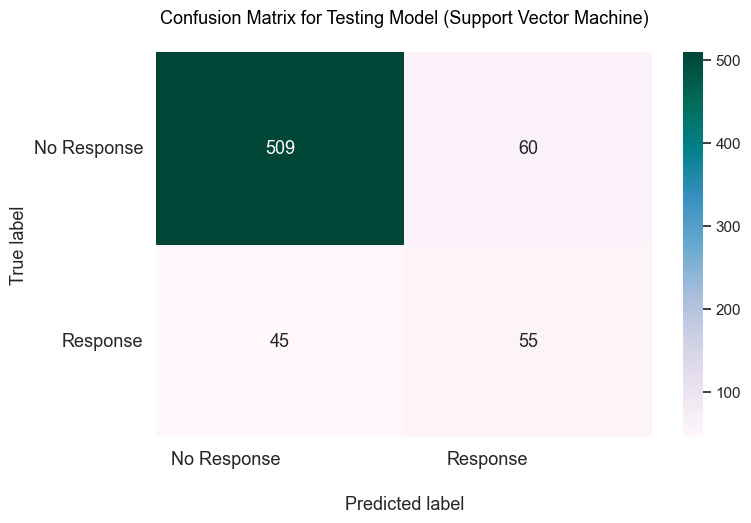

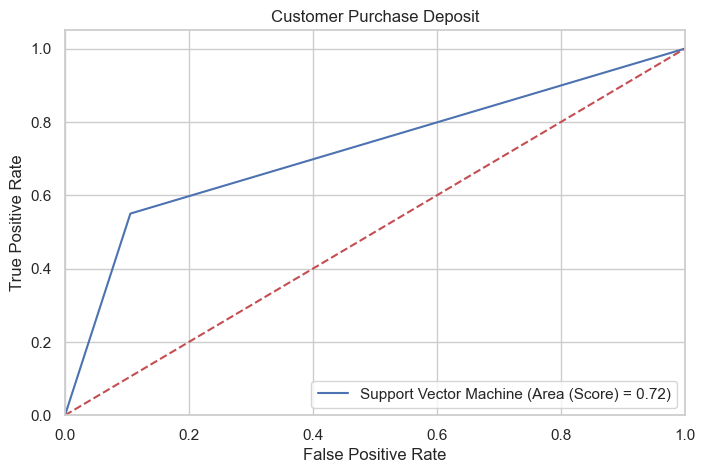

In [168]:
model_eval_test(svm_model, "Support Vector Machine", X_test, y_test)

Based on the **classification report** results, the testing model of `Support Vector Machine` algorithms have a `fairly good accuracy`, but `very low recall and f1 score` value even up to 0% (FAIL).

Based on **confusion matrix**, it is observed that:

- The classifier made a total of 1063 predictions.
- The classifier predicted
     - `Response (TP) 0, model failed prediction`
     - `No Response (TN) 913 times`
     
         In reality, this value is a high indication of incorrect predictions on False Negative FN = 150
- No Response are not very good at classified classes
- Both recall and f1-score are also very low even up to 0% (FAIL).

In [169]:
acc_svm_train=round(svm_model.score(X_train,y_train)*100,2)
acc_svm_test=round(svm_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_svm_train))
print("Test Accuracy: {} %".format(acc_svm_test))

Training Accuracy: 82.96 %
Test Accuracy: 84.3 %


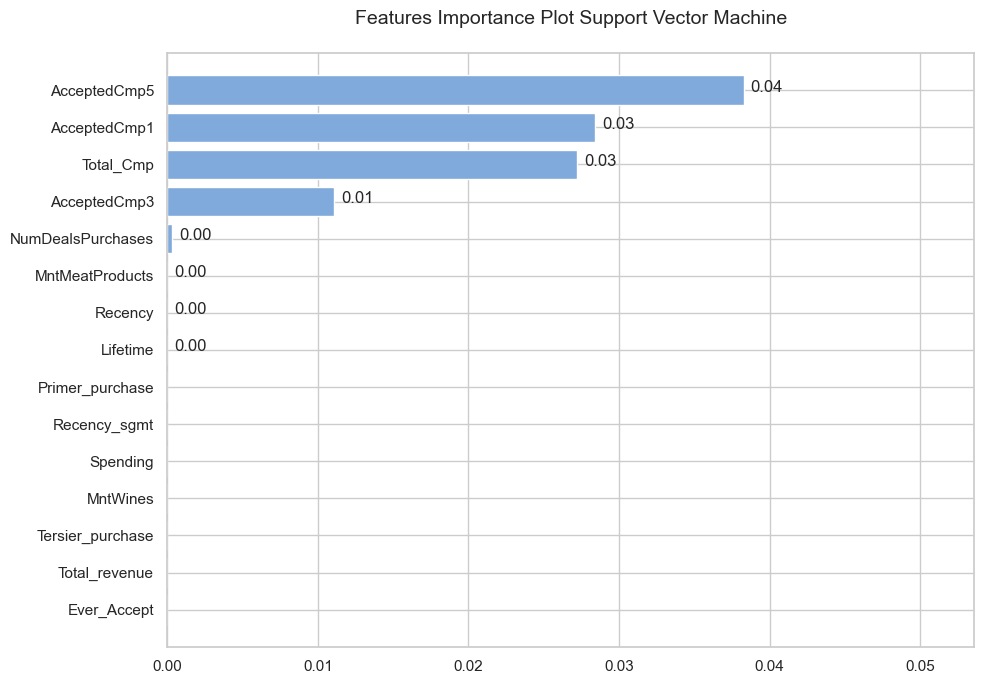

In [170]:
feature_importance_plot(svm_model, "Support Vector Machine", X_train)

## **Model Comparison**

The results will be evaluated and compared by looking at the accuracy value of each model. The accuracy value is the ratio of the number of correct predictions to the total number of input samples. I want the accuracy or correct prediction as high as possible. The following is the accuracy value of each model.

In [171]:
results_acc = pd.DataFrame({
    "Models" : train_modelname_list,
    "Training Accuracy Score" : train_accuracy_list,
    "Testing Accuracy Score" : test_accuracy_list
})

results_acc.sort_values(by=['Training Accuracy Score', 'Testing Accuracy Score'], ascending=[False,False]).reset_index(drop = True).style.background_gradient(cmap='Blues')

In [172]:
results_train = pd.DataFrame({
    'Model (Train)': train_modelname_list, 
    'Accuracy': train_accuracy_list,
    'Precision': train_precision_list, 
    'F1 Score': train_f1_score_list, 
    'Recall': train_recall_list,
    'ROC AUC Score': train_roc_auc_score_list,
    'Cross Val Score': train_cross_val_score_list
})

results_train.sort_values(by=['F1 Score', 'Recall', 'Cross Val Score'], ascending=False).reset_index(drop = True).style.background_gradient(cmap='Blues')

In [173]:
results_test = pd.DataFrame({
    'Model (Test)': test_modelname_list, 
    'Accuracy': test_accuracy_list, 
    'Precision': test_precision_list, 
    'F1 Score': test_f1_score_list, 
    'Recall': test_recall_list,
    'ROC AUC Score': train_roc_auc_score_list,
    'Cross Val Score': test_cross_val_score_list
})

results_test.sort_values(by=['F1 Score', 'Recall', 'Cross Val Score'], ascending=False).reset_index(drop = True).style.background_gradient(cmap='Blues')

## **Conclution & Recomendation**

### **Conclusion**

Of the several models tested, the chosen model is the `Random Forest`, because it has an `f-1 score (92%) and relatively high recall (87%) compared to the others`. The model also has the `highest Accuracy` which is `~97%`, this means the model is good enough to `minimize the occurrence of False Negatives (FN)`. In addition, the model has the ability to distinguish 0 (No Response) and 1 (Response) at the highest.

* Based on my observation I can see that most people who leave the service are the ones who use the service in the day/morning.
* It can also be observed that most people who use the service in the morning speak for shorter amounts of time but make more calls.
* International plan users are more consistent with their Response w.r.t the ones who do not have the service.Ini adalah faktor penting yang mempengaruhi customer Response

### **Recomendation**

* Introducing plans which minimize costs for more number of calls can be used.
* Decreasing the prices as the talk-time increases can be an effective way to reduce the Response.
* Improvement in the customer service can be done to reduce the number of calls which cause the Response.



# **Predict the Test Data**

After we use the model to predict the data we save the values in csv file to use in the submission 

## **Import Test Data**

In [174]:
# df_test = pd.read_csv('./test.csv')
df_test = pd.read_csv('https://drive.google.com/uc?id=119B0A1rJU-z1sY-ZCDreq3eiNx1M2gzM')
test = df_test.copy()
df_test.head()

id state  account_length      area_code international_plan voice_mail_plan  \
0   1    KS             128  area_code_415                 no             yes   
1   2    AL             118  area_code_510                yes              no   
2   3    IA              62  area_code_415                 no              no   
3   4    VT              93  area_code_510                 no              no   
4   5    NE             174  area_code_415                 no              no   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                      0              223.4               98   
2                      0              120.7               70   
3                      0              190.7              114   
4                      0              124.3               76   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             45.07              197.4               99             16.78   
1             37.98              220.6              101             18.75   
2             20.52              307.2               76             26.11   
3             32.42              218.2              111             18.55   
4             21.13              277.1              112             23.55   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                203.9                118                9.18   
2                203.0                 99                9.14   
3                129.6                121                5.83   
4                250.7                115               11.28   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                 6.3                 6               1.70   
2                13.1                 6               3.54   
3                 8.1                 3               2.19   
4                15.5                 5               4.19   

   number_customer_service_calls  
0                              1  
1                              0  
2                              4  
3                              3  
4                              3

In [175]:
print("Shape of data :", df_test.shape)
print("Number of rows :", df_test.shape[0])
print("Number of columns :", df_test.shape[1])

Shape of data : (750, 20)
Number of rows : 750
Number of columns : 20


## **Preprocessing**
We will also do the same treatment with the test data (according to the train data):
* Engineering Features
* Drop Unnecessary Columns
* Encoding
* Normalization

**Feature Engineering**

In [176]:
df_test['total_net_minutes'] = df_test['total_day_minutes'] + df_test['total_eve_minutes'] + df_test['total_night_minutes']
df_test['total_net_calls'] = df_test['total_day_calls'] + df_test['total_eve_calls'] + df_test['total_night_calls']
df_test['total_net_charge'] = df_test['total_day_charge'] + df_test['total_eve_charge'] + df_test['total_night_charge']

In [177]:
df_test.head()

id state  account_length      area_code international_plan voice_mail_plan  \
0   1    KS             128  area_code_415                 no             yes   
1   2    AL             118  area_code_510                yes              no   
2   3    IA              62  area_code_415                 no              no   
3   4    VT              93  area_code_510                 no              no   
4   5    NE             174  area_code_415                 no              no   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                      0              223.4               98   
2                      0              120.7               70   
3                      0              190.7              114   
4                      0              124.3               76   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             45.07              197.4               99             16.78   
1             37.98              220.6              101             18.75   
2             20.52              307.2               76             26.11   
3             32.42              218.2              111             18.55   
4             21.13              277.1              112             23.55   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                203.9                118                9.18   
2                203.0                 99                9.14   
3                129.6                121                5.83   
4                250.7                115               11.28   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                 6.3                 6               1.70   
2                13.1                 6               3.54   
3                 8.1                 3               2.19   
4                15.5                 5               4.19   

   number_customer_service_calls  total_net_minutes  total_net_calls  \
0                              1              707.2              300   
1                              0              647.9              317   
2                              4              630.9              245   
3                              3              538.5              346   
4                              3              652.1              303   

   total_net_charge  
0             72.86  
1             65.91  
2             55.77  
3             56.80  
4             55.96

**Drop Unnecessary Columns**

In [178]:
df_test.drop(columns=['id', 'state', 'area_code'], inplace=True)

df_test.drop(columns=['total_day_charge', 'total_eve_charge','total_night_charge',
                 'total_day_calls','total_eve_calls', 'total_night_calls', 
                 'total_day_minutes', 'total_eve_minutes', 'total_night_minutes'], inplace=True)

In [179]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in cat_cols:
  df_test[i] = le.fit_transform(df_test[i])
  print(i)
  print(list(le.classes_))
  print(le.transform(list(le.classes_)))
  print()

KeyError: 'Education'

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# normalize the data for numerical stability
scaler = MinMaxScaler()
X_test = scaler.fit_transform(df_test)

## **Prediction & Save**

In [ ]:
pre = rf_model.predict(df_test)
print(pre[:5])
ans_rf_model = test[["id"]].copy()
ans_rf_model["Response"] = pre
ans_rf_model["Response"]= ans_rf_model["Response"].map({ 1: 'yes', 0 : 'no'}) 
ans_rf_model.to_csv('sampleSubmission.csv', index=False)
ans_rf_model.head()

In [ ]:
# table
Response_test_grp = ans_rf_model.groupby('Response').size().reset_index()
Response_test_grp.columns = ['Response','total']
Response_test_grp['%'] = round(Response_test_grp['total']*100/sum(Response_test_grp['total']),2)
Response_test_grp.sort_values(by='total', ascending=False).style.background_gradient(cmap='Blues')

In [ ]:
fig = plt.figure(figsize = (10, 5))
colors = ["#43CDCC", "tab:orange"]
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))

plt.subplot(121)
plt.pie(ans_rf_model.Response.value_counts(),labels = ['No Response', 'Response'], autopct = '%.1f%%', radius = 1, textprops={'fontsize': 10, 'fontweight': 'bold'})
plt.title('Response Outcome Pie Chart', fontsize = 10, fontweight = 'bold')
plt.subplot(122)
t = sns.countplot(ans_rf_model.Response)
t.set_xlabel('Response', fontweight = 'bold', fontsize = 10)
t.set_ylabel('Count', fontweight = 'bold', fontsize = 10)
plt.title('Response Outcome Distributions', fontsize = 10, fontweight = 'bold')
plt.tight_layout()

# **====== STAGE 4 ======**
`Stage 4 (Final Preparation & Simulation)`